Group Members: Sowmya Renukuntla, Parneet Kaur, Cheyenne Edwards

OMIS 116: Applied Machine Learning

Professor Wilson Lin

# Table of Contents
1. [Data Preprocessing and Cleaning](#data-preprocessing-and-cleaning)
    1. [Previewing the Data](#preview-data)
        1. [Yield Data](#yield-data)
        2. [Temperature Data](#temperature-data)
        3. [Rainfall Data](#rainfall-data)
        4. [Pesticides Data](#pesticides-data)
    2. [Merging Data](#merge-data)
        1. [Investigating Merged DataFrame](#investigate-merged-data)
    3. [Handling Missing Values](#missing)
        1. [Investigation and Fix #1](#investigation-1)
        2. [Investigation and Fix #2](#investigation-2)
        3. [Investigation and Fix #3](#investigation-3)
            1. [Handling avg_temp NaN:](avg-temp-NaN)
            2. [Handling 'Other' Category](avg-temp-NaN)
            3. [Handling 'SIDS and SIDS-LDC' Categories](sids-handle)
    4. [Encoding](#encoding)
        1. [Latitude-Longitude Encoding](#lat-one-hot-encoding)
        2. [One-Hot Encoding](#cat-one-hot-encoding)
    3. [Outlier Detection](#outlier-detection)
        1. [Yield Outliers](#outlier-detection1)
        2. [Rainfall Outliers](#outlier-detection2)
        3. [Pesticides Outliers](#outlier-detection3)
        4. [Temperature Outliers](#outlier-detection4)
2. [Data Visualization](#data-visuals)
    1. [Central Question](#central-question)
        1. [How does adding environmental factors like rainfall and temperature affect the model's accuracy in predicting crop yield?](#sub-question1)
        2. [How does adding pesticide usage as a feature affect the model's accuracy in predicitng crop yield?](#sub-question2)
3. [Modeling](#modeling)
    1. [Central Question](#central-question-models)
        1. [Sub-Question #1: How does adding environmental factors like rainfall and temperature affect the model's accuracy in predicting crop yield?](#sub-question1-test)
            1. [Baseline Linear Regression  (M1)](#baseline-model)
            2. [Baseline Model 2 ((M2)](#baseline-model2)
            3. [Baseline Model 3 (M3)](#baseline-model3)
            4. [Interaction Term Model (M4)](#interaction-term-model)
        2. [Sub-Question #2: How does adding pesticide usage as a feature affect the model's accuracy in predicitng crop yield?](#sub-question2-test)
            1. [Linear Regression Models](#pesticides-linear)
            2. [Advanced Models for Sub-Question #2](#advanced-models)
        2. [Decision Trees for Feature Importance and Performance](#feature-importance-check)
            1. [Conclusion on Sub-Questions](#dtree-conclusions)
        3. [Random Forest for Feature Importance and Performance](#random-forest)
            1. [Random Forest: Log Tranformation on Yield](#rf-log-transform)
        4. [XGBoost](#xgboost)
        5. [Best Model Selection](#best-model)
        5. [Sub-Question #3](#sub-question3)
            1. [K-Means Clustering](#kmeans)
            1. [Supervised Learning Models](#supervised-learning)
                1. [Linear Regression Model](#linear-regression)
                2. [Random Forest Model](#random-forest2)
                    1. [Global Model](#global-model)
                    2. [Local Cluster Models](#local-cluster-model)
                3. [Conclusion on Sub-Question #3](#sub-question3-conclusion)
4. [Recommendation System](#recommendation-system)
5. [Final Thoughts](#final-thoughts)

# Data Preprocessing and Cleaning
<a id="data-preprocessing-and-cleaning"></a>

In [ ]:
pip show numpy pandas matplotlib seaborn

Name: numpy
Version: 1.23.5
Summary: NumPy is the fundamental package for array computing with Python.
Home-page: https://www.numpy.org
Author: Travis E. Oliphant et al.
Author-email: 
License: BSD
Location: /Users/parneetkaur/Desktop/Personal/anaconda3/lib/python3.10/site-packages
Requires: 
Required-by: astropy, bokeh, Bottleneck, contourpy, datashader, datashape, folium, gensim, h5py, holoviews, hvplot, imagecodecs, imageio, imbalanced-learn, matplotlib, numba, numexpr, pandas, patsy, pyerfa, PyWavelets, scikit-image, scikit-learn, scipy, seaborn, shap, statsmodels, tables, tifffile, transformers, xarray, xgboost, yfinance
---
Name: pandas
Version: 1.5.3
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: https://pandas.pydata.org
Author: The Pandas Development Team
Author-email: pandas-dev@python.org
License: BSD-3-Clause
Location: /Users/parneetkaur/Desktop/Personal/anaconda3/lib/python3.10/site-packages
Requires: numpy, python-dateutil, pyt

In [ ]:
# Important Libraries for Data Analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [ ]:
# Loading all the datasets
yield_df = pd.read_csv('yield.csv')
rain_df = pd.read_csv('rainfall.csv')
temp_df = pd.read_csv('temp.csv')
pest_df = pd.read_csv('pesticides.csv')


## Previewing the Data
<a id="preview-data"></a>

Here are some reasons why we are previewing the data first even though there are four datasets at this moment:
- Understand the structure (e.g. row and column count, data types, name formatting)
- Identifying Missing Values
- Identifying Duplicate Rows/Columns
- Are there any outliers in the data?
- Do we need to tranform the data in any way?

In [ ]:
print("Yield Data:")
print(yield_df.head())

print("\nTemperature Data:")
print(temp_df.head())

print("\nRainfall Data:")
print(rain_df.head())

print("\nPesticides Data:")
print(pest_df.head())

Yield Data:
  Domain Code Domain  Area Code         Area  Element Code Element  Item Code  \
0          QC  Crops          2  Afghanistan          5419   Yield         56   
1          QC  Crops          2  Afghanistan          5419   Yield         56   
2          QC  Crops          2  Afghanistan          5419   Yield         56   
3          QC  Crops          2  Afghanistan          5419   Yield         56   
4          QC  Crops          2  Afghanistan          5419   Yield         56   

    Item  Year Code  Year   Unit  Value  
0  Maize       1961  1961  hg/ha  14000  
1  Maize       1962  1962  hg/ha  14000  
2  Maize       1963  1963  hg/ha  14260  
3  Maize       1964  1964  hg/ha  14257  
4  Maize       1965  1965  hg/ha  14400  

Temperature Data:
   year        country  avg_temp
0  1849  Côte D'Ivoire     25.58
1  1850  Côte D'Ivoire     25.52
2  1851  Côte D'Ivoire     25.67
3  1852  Côte D'Ivoire       NaN
4  1853  Côte D'Ivoire       NaN

Rainfall Data:
          Area  

### 1. Yield Data
<a id="yield-data"></a>

In [ ]:
yield_df.describe()

,Area Code,Element Code,Item Code,Year Code,Year,Value
count,56717.000000,56717.0,56717.000000,56717.000000,56717.000000,56717.000000
mean,125.650422,5419.0,111.611651,1989.669570,1989.669570,62094.660084
std,75.120195,0.0,101.278435,16.133198,16.133198,67835.932856
min,1.000000,5419.0,15.000000,1961.000000,1961.000000,0.000000
25%,58.000000,5419.0,56.000000,1976.000000,1976.000000,15680.000000
50%,122.000000,5419.0,116.000000,1991.000000,1991.000000,36744.000000
75%,184.000000,5419.0,125.000000,2004.000000,2004.000000,86213.000000
max,351.000000,5419.0,489.000000,2016.000000,2016.000000,1000000.000000


In [ ]:
yield_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56717 entries, 0 to 56716
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Domain Code   56717 non-null  object
 1   Domain        56717 non-null  object
 2   Area Code     56717 non-null  int64 
 3   Area          56717 non-null  object
 4   Element Code  56717 non-null  int64 
 5   Element       56717 non-null  object
 6   Item Code     56717 non-null  int64 
 7   Item          56717 non-null  object
 8   Year Code     56717 non-null  int64 
 9   Year          56717 non-null  int64 
 10  Unit          56717 non-null  object
 11  Value         56717 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 5.2+ MB


Checking to see how many unique areas (countries) are in the dataset.

In [ ]:
len(yield_df['Area'].unique())

212

Checking to see how many unique years are in the dataset.

In [ ]:
len(yield_df['Year'].unique())

56

We want to identify columns with unique values only because these kinds of columns generally provide no new/useful information.

In [ ]:
checkForConstant = [col for col in yield_df.columns if yield_df[col].nunique() == 1]

print("Columns with a single unique value:", checkForConstant)

Columns with a single unique value: ['Domain Code', 'Domain', 'Element Code', 'Element', 'Unit']


<b> Filter-Based Feature Selection </b>
- Goal: Remove redundant features (e.g., columns with constant values).

In [ ]:
yield_df.head()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value
0,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1961,1961,hg/ha,14000
1,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1962,1962,hg/ha,14000
2,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1963,1963,hg/ha,14260
3,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1964,1964,hg/ha,14257
4,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1965,1965,hg/ha,14400


We can notice that 'Domain', 'Element', 'Year Code', 'Area Code', 'Item Code', 'Domain Code' are irrelevant columns and have costant value in each instance.

Checking Unique Value Count for each Column to see what columns have constant values and can be removed.

In [ ]:
for c in yield_df.columns:
    print(c, yield_df[c].nunique())

Domain Code 1
Domain 1
Area Code 212
Area 212
Element Code 1
Element 1
Item Code 10
Item 10
Year Code 56
Year 56
Unit 1
Value 36815


- Year Code is same as Year so it is dropped
- Item Code is just giving a code for each Item which is not necesssary
- The Unit column provides context. If we remove it, someone analyzing the data later might not know what the numbers represent.

In [ ]:
yield_df = yield_df.drop(['Domain', 'Element', 'Year Code', 'Area Code', 'Item Code', 'Domain Code', 'Element Code'],
                            axis=1)

In [ ]:
yield_df.columns

Index(['Area', 'Item', 'Year', 'Unit', 'Value'], dtype='object')

No missing values in the dataset, as seen below:

In [ ]:
yield_df.isnull().sum()

Area     0
Item     0
Year     0
Unit     0
Value    0
dtype: int64

Checking for Duplicate Rows in the Dataset.


In [ ]:
yield_duplicate_rows = yield_df.duplicated()
yield_duplicate_rows.sum()

0

### 2. Temeprature Data
<a id=temperature-data></a>

In [ ]:
temp_df.describe()

,year,avg_temp
count,71311.000000,68764.000000
mean,1905.799007,16.183876
std,67.102099,7.592960
min,1743.000000,-14.350000
25%,1858.000000,9.750000
50%,1910.000000,16.140000
75%,1962.000000,23.762500
max,2013.000000,30.730000


In [ ]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71311 entries, 0 to 71310
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      71311 non-null  int64  
 1   country   71311 non-null  object 
 2   avg_temp  68764 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.6+ MB


Checking to see how many unique areas (countries) are in the dataset.


In [ ]:
print(len(temp_df['country'].unique()))

137


Checking to see how many unique years are in the dataset.


In [ ]:
print(len(temp_df['year'].unique()))

271


In [ ]:
print(temp_df.columns)

Index(['year', 'country', 'avg_temp'], dtype='object')


We will rename the columns to make them more readable and understandable. We will keep the names constant across all datasets so that when we merge them into one dataset, it is easier to understand.

In [ ]:
temp_df.rename(columns = {'year': 'Year', 'country': 'Area'}, inplace = True)

In [ ]:
temp_df.columns

Index(['Year', 'Area', 'avg_temp'], dtype='object')

As we can see, there are 2547 missing values in the dataset.

In [ ]:
temp_df.isnull().sum()

Year           0
Area           0
avg_temp    2547
dtype: int64

<b> Extracting Insights: Why is the data missing? Are missing values random or systematic? </b>

- Is it MCAR? (Missing Completely at Random) - This is what we hope for because it means that the missing data is not related to any other data in the dataset.
- Is it MAR? (Missing at Random) - This means that the missing average temperature values only occur in specific regions. We would have to impute for region instead of global average.
- Is it MNAR? (Missing Not at Random) - This means that the missing data could bias the model toward high-yield regions. This would require external data, but we do not have the ability to do so.

NOTE: We learned about these concepts from the class lectures on Preprocessing and Feature Selection.

1. Analyzing the distribution of missing values in the 'avg_temp' column and identifying which countries (or areas) have the most missing data.

In [ ]:
temp_df[temp_df['avg_temp'].isna()]['Area'].value_counts()

United States    381
India            236
Pakistan         168
Indonesia        167
Brazil           115
                ... 
Afghanistan        2
Lebanon            2
Iran               1
Iraq               1
Jamaica            1
Name: Area, Length: 113, dtype: int64

2. Identifying the unique areas with missing temperature data (list format for easier reading).

In [ ]:
countries_temp_missing = temp_df[temp_df['avg_temp'].isna()]['Area'].unique()
countries_temp_missing

array(["Côte D'Ivoire", 'United Arab Emirates', 'Nigeria', 'Ghana',
       'India', 'United States', 'Kazakhstan', 'Netherlands', 'Turkey',
       'China', 'Madagascar', 'Eritrea', 'Mali', 'Indonesia', 'Thailand',
       'Central African Republic', 'Spain', 'Venezuela', 'Colombia',
       'Lebanon', 'United Kingdom', 'Serbia', 'Brazil', 'Germany',
       'Switzerland', 'Guinea Bissau', 'Slovakia', 'Congo', 'Belgium',
       'Romania', 'Hungary', 'Burundi', 'Morocco', 'Russia', 'Moldova',
       'Sri Lanka', 'Guinea', 'Denmark', 'Senegal', 'Tanzania',
       'Bangladesh', 'Qatar', 'Cameroon', 'Ireland', 'Pakistan',
       'Sierra Leone', 'Guyana', 'Mexico', 'Guatemala', 'Ecuador',
       'Zimbabwe', 'Finland', 'Vietnam', 'Iraq', 'Sudan', 'Afghanistan',
       'Uganda', 'Nepal', 'Ukraine', 'Rwanda', 'Canada', 'Jamaica',
       'Congo (Democratic Republic Of The)', 'Malaysia', 'Gabon',
       'Malawi', 'Peru', 'Slovenia', 'Angola', 'Zambia',
       'Equatorial Guinea', 'Nicaragua', 'Bahra

3. Caculating the number of missing values in the avg_temp column for specfic areas (i.e. countries). We save the results to a file because it was too large to display and analyze in the notebook.

In [ ]:
missing_counts_after_check = temp_df[temp_df['Area'].isin(countries_temp_missing)].groupby('Area')['avg_temp'].apply(lambda x: x.isna().sum())
missing_counts_after_check.to_csv("missing_temperature_values_per_country.csv", index=True)

4. Handling Missing Values Approach:

- If a country has less than or equal to 30% missing values, we will use interpolation because there are enough existing data points to estimate the missing values reasonably.
- If a country has more than 70% missing values, we will drop those records since there isn’t enough information to generate reliable interpolations.
- If a country has between 30% and 70% missing values, we will use the KNN method to impute the missing values.

We got this idea from the following article: https://medium.com/@hhuseyincosgun/dealing-with-missing-data-from-zero-to-advanced-4fb734ee5998

In [ ]:
from sklearn.impute import KNNImputer

In [ ]:
missing_values_proportion = temp_df.groupby('Area')['avg_temp'].apply(lambda x: x.isnull().mean() * 100)

countries_for_interpolation = missing_values_proportion[missing_values_proportion <= 30].index

drop_countries = missing_values_proportion[missing_values_proportion > 70].index

knn_countries = missing_values_proportion[(missing_values_proportion > 30) & (missing_values_proportion <= 70)].index

for country in countries_for_interpolation:
    temp_df.loc[temp_df['Area'] == country, 'avg_temp'] = temp_df.loc[temp_df['Area'] == country, 'avg_temp'].interpolate()

for country in knn_countries:
    imputer = KNNImputer(n_neighbors = 4)
    temp_df.loc[temp_df['Area'] == country, 'avg_temp'] = imputer.fit_transform(temp_df[temp_df['Area'] == country][['avg_temp']])

for country in drop_countries:
    temp_df = temp_df[temp_df['Area'] != country]

5. Checking to see if the approach worked and if there are any missing values left in the dataset.

In [ ]:
temp_df.isnull().sum()

Year        0
Area        0
avg_temp    0
dtype: int64

Identifying and Extracting rows that have duplicate values in the 'Year' column because we only need one value for each year.

In [ ]:
duplicate_years = temp_df[temp_df.duplicated(subset=['Year'], keep=False)]
duplicate_years

,Year,Area,avg_temp
0,1849,Côte D'Ivoire,25.580
1,1850,Côte D'Ivoire,25.520
2,1851,Côte D'Ivoire,25.670
3,1852,Côte D'Ivoire,25.792
4,1853,Côte D'Ivoire,25.914
...,...,...,...
71306,2009,Mexico,21.760
71307,2010,Mexico,20.900
71308,2011,Mexico,21.550
71309,2012,Mexico,21.520


Zooming into Côte D'Ivoire to confirm the indication of duplicate years in the above code. As we can see, we have two rows in the same area with the saem year, but different average termperature data.

In [ ]:
temp_df[(temp_df['Year'] == 1849) & (temp_df['Area'] == "Côte D'Ivoire")]

,Year,Area,avg_temp
0,1849,Côte D'Ivoire,25.58
70465,1849,Côte D'Ivoire,25.00


We can notice that duplicate rows have different temperature values, so we should aggregate because this could mean that there are multiple temperature readings per year. Dropping duplicates will remove valid information possibly.

In [ ]:
temp_df = temp_df.groupby(['Area', 'Year'])['avg_temp'].mean().reset_index()

The below code serves as an example to confirm that we have averaged the two existing temperature values for the same year in Côte D'Ivoire.

In [ ]:
temp_df[(temp_df['Year'] == 1849) & (temp_df['Area'] == "Côte D'Ivoire")]

,Area,Year,avg_temp
6476,Côte D'Ivoire,1849,25.29


### 3. Rainfall Data
<a id=rainfall-data></a>


In [ ]:
rain_df.describe()

,Year
count,6727.000000
mean,2001.354839
std,9.530114
min,1985.000000
25%,1993.000000
50%,2001.000000
75%,2010.000000
max,2017.000000


In [ ]:
rain_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6727 entries, 0 to 6726
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0    Area                          6727 non-null   object
 1   Year                           6727 non-null   int64 
 2   average_rain_fall_mm_per_year  5953 non-null   object
dtypes: int64(1), object(2)
memory usage: 157.8+ KB


In [ ]:
rain_df.columns

Index([' Area', 'Year', 'average_rain_fall_mm_per_year'], dtype='object')

We can notice that the Area column has a whitespace at the beginning of the column name. We will remove that whitespace.

In [ ]:
rain_df.columns = rain_df.columns.str.strip()

Checking to see how many unique areas (countries) are in the dataset.


In [ ]:
print(len(rain_df['Area'].unique()))

217


Checking to see how many unique years are in the dataset.

In [ ]:
print(len(rain_df['Year'].unique()))

31


We will rename the column 'average_rain_fall_per_year' to make it more readable and understandable.

In [ ]:
rain_df.rename(columns = {'average_rain_fall_mm_per_year': 'Average_Rainfall_Per_Year'}, inplace = True)

In [ ]:
rain_df.columns

Index(['Area', 'Year', 'Average_Rainfall_Per_Year'], dtype='object')

As seen below, there are 774 missing values in the 'Average_Rainfall_Per_Year' column.

In [ ]:
rain_df.isnull().sum()

Area                           0
Year                           0
Average_Rainfall_Per_Year    774
dtype: int64

<b> Extracting Insights: Why is the data missing? Are missing values random or systematic? </b>

- Is it MCAR? (Missing Completely at Random) - This is what we hope for because it means that the missing data is not related to any other data in the dataset.
- Is it MAR? (Missing at Random) - This means that the missing rainfall values only occur in specific regions. We would have to impute for region instead of global average.
- Is it MNAR? (Missing Not at Random) - This means that the missing data could bias the model toward high-yield regions. This would require external data, but we do not have the ability to do so.

1. Analyzing the distribution of missing values in the 'Average_Rainfall_Per_Year' column and identifying which countries (or areas) have the most missing data.

In [ ]:
rain_df[rain_df['Average_Rainfall_Per_Year'].isna()]['Area'].value_counts()

American Samoa               31
Aruba                        31
Turks and Caicos Islands     31
Tonga                        31
St. Martin (French part)     31
Sint Maarten (Dutch part)    31
San Marino                   31
Northern Mariana Islands     31
New Caledonia                31
Macao SAR, China             31
Kosovo                       31
Isle of Man                  31
Hong Kong SAR, China         31
Guam                         31
Greenland                    31
Gibraltar                    31
French Polynesia             31
Faroe Islands                31
Curacao                      31
Channel Islands              31
Cayman Islands               31
British Virgin Islands       31
Bermuda                      31
Virgin Islands (U.S.)        31
Monaco                       30
Name: Area, dtype: int64

2. Analyzing if any of the countries above that have missing values also have at least some non-null values. This is important because if a country has no rainfall data at all, we cannot impute the missing values.

In [ ]:
missing_countries = rain_df[rain_df['Average_Rainfall_Per_Year'].isna()]['Area'].unique()

In [ ]:
check_for_non_null = rain_df[(rain_df['Area'].isin(missing_countries)) & (rain_df['Average_Rainfall_Per_Year'].notnull())]
print(check_for_non_null[['Area', 'Average_Rainfall_Per_Year']].drop_duplicates())

        Area Average_Rainfall_Per_Year
4061  Monaco                        ..


Only Monaco has a non-null value which is actually a blank space. We will consider this as a missing value and drop the row safely alongside the countries that have missing values.

In [ ]:
rain_df = rain_df.dropna(subset=['Average_Rainfall_Per_Year'])

3. Checking to see if the approach worked and if there are any missing values left in the dataset.

In [ ]:
rain_df.isna().sum()

Area                         0
Year                         0
Average_Rainfall_Per_Year    0
dtype: int64

Checking for Duplicate Rows in the Dataset.

In [ ]:
rain_duplicate_rows = rain_df.duplicated(keep=False)
rain_duplicate_rows.sum()

0

### 4. Pesticide Data
<a id=pesticides-data></a>

In [ ]:
pest_df.describe()

,Year,Value
count,4349.000000,4.349000e+03
mean,2003.138883,2.030334e+04
std,7.728044,1.177362e+05
min,1990.000000,0.000000e+00
25%,1996.000000,9.300000e+01
50%,2003.000000,1.137560e+03
75%,2010.000000,7.869000e+03
max,2016.000000,1.807000e+06


In [ ]:
pest_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4349 entries, 0 to 4348
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Domain   4349 non-null   object 
 1   Area     4349 non-null   object 
 2   Element  4349 non-null   object 
 3   Item     4349 non-null   object 
 4   Year     4349 non-null   int64  
 5   Unit     4349 non-null   object 
 6   Value    4349 non-null   float64
dtypes: float64(1), int64(1), object(5)
memory usage: 238.0+ KB


Checking to see how many years are in the dataset.

In [ ]:
print(len(pest_df['Year'].unique()))

27


Checking to see how many unique areas (countries) are in the dataset.

In [ ]:
print(len(pest_df['Area'].unique()))

168


No missing values in the dataset, as seen below:

In [ ]:
pest_df.isnull().sum()

Domain     0
Area       0
Element    0
Item       0
Year       0
Unit       0
Value      0
dtype: int64

Checking for Duplicate Rows in the Dataset.

In [ ]:
pest_duplicate_rows = pest_df.duplicated()
pest_duplicate_rows.sum()

0

Confirming that the pest_df dataset is at the correct Year-Country level because we will need to aggregate it to the correct level before merging it with the other datasets if it is not.

In [ ]:
pest_df.groupby(['Area', 'Year']).size().sort_values(ascending=False)

Area      Year
Albania   1990    1
Norway    2005    1
          1991    1
          1992    1
          1993    1
                 ..
France    2006    1
          2007    1
          2008    1
          2009    1
Zimbabwe  2016    1
Length: 4349, dtype: int64

As we can see above, the data is at the correct year-country level. Every (Area, Year) are has exactly one row (i.e. no values are > 1).

Further Confirmation: Manual Look of Data
- The Item column in pest_df contains the value "Pesticides (total)", which indicates that the dataset does not have separate rows for different types of pesticides.
- If the dataset contained individual pesticide types (e.g. "Insecticides," etc.), then multiple rows would exist for the same country-year, and we would need to sum them to get total pesticide usage.

## Merging Data
<a id="merge-data"></a>

Merging all the data provides a single dataset that can be used for training and testing the models. This helps because many of the datasets had complementary information.

In [ ]:
merged_df = pd.merge(yield_df, rain_df, on=['Year', 'Area'], how='left')

merged_df = pd.merge(merged_df, pest_df, on=['Year', 'Area'], how='left')

merged_df = pd.merge(merged_df, temp_df, on=['Year', 'Area'], how='left')

### Investigating Merged DataFrame
<a id="investigate-merged-data"></a>

In [ ]:
merged_df.head()

,Area,Item_x,Year,Unit_x,Value_x,Average_Rainfall_Per_Year,Domain,Element,Item_y,Unit_y,Value_y,avg_temp
0,Afghanistan,Maize,1961,hg/ha,14000,NaN,NaN,NaN,NaN,NaN,NaN,14.23
1,Afghanistan,Maize,1962,hg/ha,14000,NaN,NaN,NaN,NaN,NaN,NaN,14.10
2,Afghanistan,Maize,1963,hg/ha,14260,NaN,NaN,NaN,NaN,NaN,NaN,15.01
3,Afghanistan,Maize,1964,hg/ha,14257,NaN,NaN,NaN,NaN,NaN,NaN,13.73
4,Afghanistan,Maize,1965,hg/ha,14400,NaN,NaN,NaN,NaN,NaN,NaN,13.90


The columns "Domain", "Element", "Item_y", and "Unit_y" are mostly filled with NaN values because they were created when merging the datasets. We will drop these columns because they do not provide any useful information.

In [ ]:
merged_df.drop(columns=["Domain", "Element", "Item_y", "Unit_y"], inplace=True)

The columns 'Value_x' and 'Value_y' were automatically created due to overlapping column names from the merged datasets. We will rename these columns to make them more readable and understandable.

In [ ]:
merged_df.rename(columns = {
    'Value_x': 'Value_Yield',
    'Value_y': 'Value_Pesticide'
}, inplace = True)

In [ ]:
merged_df.columns

Index(['Area', 'Item_x', 'Year', 'Unit_x', 'Value_Yield',
       'Average_Rainfall_Per_Year', 'Value_Pesticide', 'avg_temp'],
      dtype='object')

As we can see from the below output on missing values in the merged_df, the columns that have missing values are:

Average_Rainfall_Per_Year has 31,317 missing values
- rain_df does not have entries for certain Year and Area combinations.

avg_temp 24,507 has  missing values
- temp_df does not have complete records for all areas and years.

Value_Pesticide has 32,564 missing values
- pest_df data is incomplete or missing for many regions/years.

In [ ]:
merged_df.isnull().sum()

Area                             0
Item_x                           0
Year                             0
Unit_x                           0
Value_Yield                      0
Average_Rainfall_Per_Year    31317
Value_Pesticide              32564
avg_temp                     24507
dtype: int64

### Handing Missing Data
<a id="missing"></a>

#### Investigation and Fix #1:
<a id="invesigation-1"></a>

Which years have the most missing values? Are there more earlier years (e.g. 1960-1990) that have the most missing values?

Reason for Investigation:
-  If earlier years have most of the missing values, it could be due to data collection limitations in the past.
- If missing values are evenly spread across all years, it might indicate that the entries are randomly missing due to incomplete reporting.
- Next Steps: Having the above knowledge ultimately helps decide whether to remove earlier years or fill in missing values.

1. Analyzing the number of missing values per year in the dataset merged_df and identifying the years with the highest number of missing values.

In [ ]:
missing_count_per_year = merged_df.groupby("Year").apply(lambda x: x.isna().sum()).sum(axis=1)
missing_count_per_year.sort_values(ascending=False).head(25)

Year
1988    2345
1984    2302
1983    2299
1982    2295
1981    2293
1980    2292
1979    2291
1978    2288
1977    2286
1976    2281
1975    2264
1974    2259
1973    2256
1972    2250
1971    2245
1970    2230
1969    2221
1968    2219
1967    2209
1966    2207
1965    2193
1964    2193
1961    2192
1963    2192
1962    2192
dtype: int64

We can already notice from the above check on missing count per year that the years before 1990 are in the top 20-25 (i.e. in terms of the most missing values).

2. Visualizing the missing values over years in a line plot to see the trend.

In [ ]:
import seaborn as sns

<b> Graph Anlaysis: </b>
- Before 1990, missing values remain consistently high (~2,200 per year).
- Around 1990, there is a sharp drop in missing values, so data collection may have improved.  
    - Reasons for limited, reliable data before 1990: Climate data was not consistently recorded worldwide.
- Keeping this information in mind, our analysis will be on modern climate trends, where we will remove data before 1990.

<b> Considering Small Spikes in Data: </b>
- After 1990, missing values drop significantly but do not disappear completely.
- There are small spikes, notably around early 2000s and 2010s.
    - Implications:
        - We will investigate which columns are causing these missing values post-1990.
        - We will decide whether to fill in missing values (e.g., interpolation, mean imputation) or remove affected years.

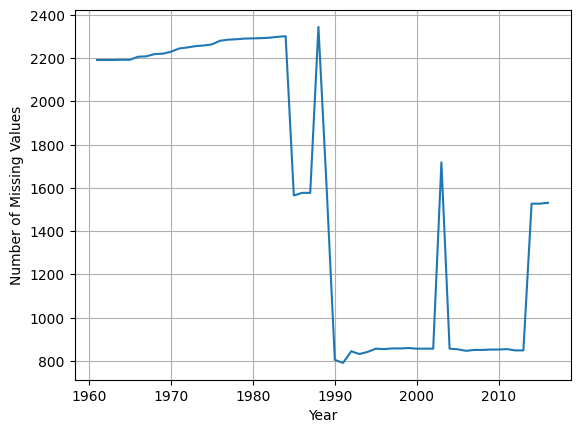

In [ ]:
missing_count_per_year = missing_count_per_year.sort_index()

sns.lineplot(x = missing_count_per_year.index, y = missing_count_per_year.values)
plt.xlabel('Year')
plt.ylabel('Number of Missing Values')
plt.grid(True)
plt.show()

3. Before Removing Data that is categorized as "before 1990", we should assess:
    - Total number of rows being deleted - This will help us understand how much data we are losing.
    - Number of non-null values in these rows
        - Are we deleting too much useful data. If there are many valid (non-null) values, we might reconsider removing everything.

In [ ]:
total_rows_before_1990 = merged_df[merged_df['Year'] < 1990].shape[0]
print("Total rows being removed that are strictly before 1990:", total_rows_before_1990)

Total rows being removed that are strictly before 1990: 27350


In [ ]:
non_null_count = merged_df[merged_df["Year"] < 1990].notnull().sum()

percentage_of_non_null = (non_null_count / total_rows_before_1990) * 100
print("Percentage of non-null values before 1990:\n", percentage_of_non_null)

Percentage of non-null values before 1990:
 Area                         100.000000
Item_x                       100.000000
Year                         100.000000
Unit_x                       100.000000
Value_Yield                  100.000000
Average_Rainfall_Per_Year     11.049360
Value_Pesticide                0.000000
avg_temp                      60.010969
dtype: float64


As we can see from the outputs above, Area, Item_x, Year, Unit_x, Value_Yield have 100% because they do not have any missing values in the first place.

<b> Considering the rows that actually have missing values: </b>
- Average_Rainfall_Per_Year → 11.05% available
- avg_temp → 60.01% available
- Value_Pesticide → 0% available
    - Any model relying on pesticide data would be inaccurate for pre-1990 data.

4. Conclusion: Remove data before 1990 because it is missing significantly.

In [ ]:
merged_df = merged_df[merged_df["Year"] >= 1990]

5. Re-Assessing the Null Count

In [ ]:
merged_df.isnull().sum()

Area                             0
Item_x                           0
Year                             0
Unit_x                           0
Value_Yield                      0
Average_Rainfall_Per_Year     6989
Value_Pesticide               5214
avg_temp                     13570
dtype: int64

#### Investigation and Fix #2:
<a id="invesigation-2"></a>

Now that we’ve filtered out years before 1990, the next logical step is to check whether specific countries have a lot of missing values. This can help us decide:
- Are there countries with very little usable data?
    - If so, we might consider removing these countries from the dataset entirely.
- Are missing values concentrated in certain regions?
- Can we fill in missing values for some countries?

In [ ]:
missing_by_country = merged_df.groupby('Area').apply(lambda x: x.isna().sum()).sum(axis=1)
missing_by_country

Area
Afghanistan                  124
Albania                       16
Algeria                       20
American Samoa               162
Angola                        32
                            ... 
Wallis and Futuna Islands    162
Yemen                        140
Yugoslav SFR                  24
Zambia                        32
Zimbabwe                      32
Length: 212, dtype: int64

Other than just understanding the missing value count per country, our goal is to understand the distribution (percentage) of missing values per country.

We will create a structured dataframe to sort, analyze, and visualize the data more easily.

In [ ]:
from IPython.display import display

In [ ]:
rows_per_country = merged_df.groupby("Area").size()

total_data_points_per_country = rows_per_country * merged_df.shape[1]

missing_by_country = merged_df.groupby("Area").apply(lambda x: x.isna().sum()).sum(axis=1)

missing_by_country = missing_by_country.reindex(rows_per_country.index)

In [ ]:
missing_by_country_df = pd.DataFrame({
    "Missing Value Count": missing_by_country,
    "Percentage of Missing Values": (missing_by_country / total_data_points_per_country) * 100
})

In [ ]:
display(missing_by_country_df.sort_values(by="Percentage of Missing Values", ascending=False).head(20))

,Missing Value Count,Percentage of Missing Values
Area,,
Micronesia (Federated States of),408,37.500000
Pacific Islands Trust Territory,18,37.500000
Faroe Islands,81,37.500000
French Guiana,321,37.500000
Democratic Republic of the Congo,810,37.500000
Democratic People's Republic of Korea,567,37.500000
Czechoslovakia,45,37.500000
Guadeloupe,324,37.500000
Guam,162,37.500000


The dataframe above shows the top 20 most incomplete (i.e the ones that hold the most missing values) countries in the dataset.

Countries like Micronesia, Pacific Islands Trust Territory, Faroe Islands, and French Guiana have 37.5% missing values. However, these are also very small island nations that may not have as much data available anyways.

<b> Best Approach: Because our goal is to predict crop yield and, hence, do a global crop yield analysis, we need all major agricultural nations in our dataset. </b>

United Nations Office of the High Representative for the Least Developed Countries, Landlocked Developing Countries and Small Island Developing States (UN-OHRLLS) has a list of countries that are considered "Least Developed Countries" (LDCs). We will cross-reference this list with our dataset to see if any of the countries with high missing values are LDCs. These are the three categories from the list that we will consider:
- SIDS: Small Island Developing States
- SIDS-LCD: Small Island Developing States - Least Developed Countries
- Associate Members: Associate Members of United Nations Regional Commissions
    - These are not fully independent UN member states but participate in UN regional activities

United Nations Reference Page - https://www.un.org/ohrlls/content/list-sids

<b> Proposed Filtering Rules: </b>
- If SIDS & missing >30% → Mark for removal.
- If SIDS & missing ≤5% → Keep it (even if it's an island).
- If SIDS & missing between 5-30% -> Apply KNN Imputation

Because we are comparing the Area with SIDS list from the UN, we will need fuzzy matching to handle slight variations in names (i.e. if any).

In [ ]:
pip install thefuzz

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from thefuzz import process

Loading the SIDS, SIDS-LDC, and Associate Members lists from the UN-OHRLLS website (manual).

In [ ]:
sids = [
    "Antigua and Barbuda", "Bahamas", "Barbados", "Belize", "Cabo Verde", "Comoros", "Cook Islands",
    "Cuba", "Dominica", "Dominican Republic", "Fiji", "Grenada", "Guinea-Bissau", "Guyana",
    "Haiti", "Jamaica", "Kiribati", "Maldives", "Marshall Islands", "Micronesia (Federated States of)",
    "Mauritius", "Nauru", "Niue", "Palau", "Papua New Guinea", "Samoa", "São Tomé and Príncipe",
    "Singapore", "St. Kitts and Nevis", "St. Lucia", "St. Vincent and the Grenadines", "Seychelles",
    "Solomon Islands", "Suriname", "Timor-Leste", "Tonga", "Trinidad and Tobago", "Tuvalu", "Vanuatu"
]

sids_ldc = [
    "Haiti", "Kiribati", "Comoros", "Guinea-Bissau", "Solomon Islands", "Timor-Leste", "Tuvalu"
]

associate_members = [
    "American Samoa", "Anguilla", "Aruba", "Bermuda", "British Virgin Islands", "Cayman Islands",
    "Commonwealth of Northern Marianas", "Curacao", "French Polynesia", "Guadeloupe", "Guam",
    "Martinique", "Montserrat", "New Caledonia", "Puerto Rico", "Sint Maarten",
    "Turks and Caicos Islands", "U.S. Virgin Islands"
]

Combining all countries into single reference list because we will be checking for all countries in the dataset.

In [ ]:
all_countries = {c: "SIDS" for c in sids}
all_countries.update({c: "SIDS_LDC" for c in sids_ldc})
all_countries.update({c: "Associate Members" for c in associate_members})

In [ ]:
def classify(area):
    match, score = process.extractOne(area, all_countries.keys())
    return all_countries[match] if score > 85 else "Other"

merged_df["Category"] = merged_df["Area"].apply(classify)

In [ ]:
merged_df['Category'].unique()

array(['Other', 'Associate Members', 'SIDS', 'SIDS_LDC'], dtype=object)

We add the 'Percentage of Missing Values' column to the merged_df to make it easier to filter and analyze the data using the rules proposed preiously.

In [ ]:
missing_by_country_df = missing_by_country_df.reset_index()

merged_df = merged_df.merge(missing_by_country_df[['Area', 'Percentage of Missing Values']], on='Area', how='left')

From the below merged_df view, we can see that 'Percentage of Missing Values' has been successfully entered into the merged_df through another left merge.

In [ ]:
merged_df.head()

,Area,Item_x,Year,Unit_x,Value_Yield,Average_Rainfall_Per_Year,Value_Pesticide,avg_temp,Category,Percentage of Missing Values
0,Afghanistan,Maize,1990,hg/ha,17582,327,NaN,15.45,Other,14.351852
1,Afghanistan,Maize,1991,hg/ha,16800,327,NaN,14.57,Other,14.351852
2,Afghanistan,Maize,1992,hg/ha,15000,327,NaN,14.35,Other,14.351852
3,Afghanistan,Maize,1993,hg/ha,16786,327,NaN,14.96,Other,14.351852
4,Afghanistan,Maize,1994,hg/ha,16667,327,NaN,14.94,Other,14.351852


4. Removing SIDS with more than 30% missing data.

In [ ]:
to_remove = merged_df[(merged_df["Category"] != "SIDS") &
                      (merged_df["Percentage of Missing Values"] > 30)].index

merged_df.drop(to_remove, inplace=True)

Applying KNN Imputation for SIDS with 5-30% missing data.

<b> Layout of Steps: </b>
1. Check if the knn_df DataFrame is empty or not. If sids_knn_df is empty, meaning no SIDS countries have missing values between 5-30%, the code skips KNN Imputation.
2. If it contains data, then the imputation process continues.
- KNN Imputer only works on numerical data, we must select numerical columns before applying it.



In [ ]:
knn_df = merged_df[(merged_df["Category"].str.contains("SIDS", na=False)) &
                         (merged_df["Percentage of Missing Values"].between(5, 30))]

In [ ]:
if not knn_df.empty:
    knn_df = knn_df.copy()

    numerical_cols = merged_df.select_dtypes(include=["float64", "int64"]).columns.tolist()
    n_neighbors = max(2, int(len(knn_df) ** 0.5))
    imputer = KNNImputer(n_neighbors=n_neighbors)

    knn_df[numerical_cols] = imputer.fit_transform(knn_df[numerical_cols])

    for col in numerical_cols:
        merged_df.loc[knn_df.index, col] = knn_df[col]

There is reduciton in missing value count, which is good. However, this only makes a change in SIDS that have missing data between 5-30% or removed if more than 30%.

In [ ]:
merged_df.isnull().sum()

Area                               0
Item_x                             0
Year                               0
Unit_x                             0
Value_Yield                        0
Average_Rainfall_Per_Year       6201
Value_Pesticide                 3681
avg_temp                        9101
Category                           0
Percentage of Missing Values       0
dtype: int64

#### Investigation and Fix #3:
<a id="invesigation-3"></a>

If we look at each category separetely, we can easily visualize the distrubition of missing values in each. For example, if the Category is "Other" then we can see that there are a significant number of missing values for Average_Rainfall_Per_Year, Value_Pesticide, avg_temp in comparison to the 'SIDS-LDC' category.  

In [ ]:
merged_df[merged_df['Category'] == 'Other'].isnull().sum()

Area                               0
Item_x                             0
Year                               0
Unit_x                             0
Value_Yield                        0
Average_Rainfall_Per_Year       3484
Value_Pesticide                 2658
avg_temp                        7593
Category                           0
Percentage of Missing Values       0
dtype: int64

In [ ]:
merged_df[merged_df['Category'] == 'SIDS'].isnull().sum()

Area                               0
Item_x                             0
Year                               0
Unit_x                             0
Value_Yield                        0
Average_Rainfall_Per_Year       2366
Value_Pesticide                  872
avg_temp                        1001
Category                           0
Percentage of Missing Values       0
dtype: int64

In [ ]:
merged_df[merged_df['Category'] == 'SIDS_LDC'].isnull().sum()

Area                             0
Item_x                           0
Year                             0
Unit_x                           0
Value_Yield                      0
Average_Rainfall_Per_Year       37
Value_Pesticide                  0
avg_temp                        48
Category                         0
Percentage of Missing Values     0
dtype: int64

In [ ]:
merged_df[merged_df['Category'] == 'Associate Members'].isnull().sum()

Area                              0
Item_x                            0
Year                              0
Unit_x                            0
Value_Yield                       0
Average_Rainfall_Per_Year       314
Value_Pesticide                 151
avg_temp                        459
Category                          0
Percentage of Missing Values      0
dtype: int64

KNN Imputer works best when data points are similar (i.e., countries in the same category share common patterns). If the groups are too diverse, KNN might not work well.

We will check variability (Standard Deviation). If there is very high standard deviation, it means values are widely spread, so KNN will struggle.

This is just a method of checking what we should actually do with the missing data at this point.

As we can see from the below result table:

1. SIDS & SIDS_LDC: KNN is valid here because their standard deviation is low, meaning values are relatively similar.

2. Other: Extremely high standard deviation (155,983.4) in Value_Pesticide suggests values are all over the place, making KNN unreliable. We may consider median imputation here instead.

3. Associate Members: Very low standard deviation for Value_Pesticide suggests that values are quite stable, so KNN is unnecessary. We may consider median imputation here instead.

4. avg_temp for Associate Members is NaN:
    - There are two things that are possible:
        - No avg_temp values exist for this category, or
        - All values were missing and couldn't compute a standard deviation.


In [ ]:
check_cols = ["Average_Rainfall_Per_Year", "Value_Pesticide", "avg_temp"]
for c in check_cols:
	if c not in merged_df.columns:
		merged_df[c] = None

# numeric_only = True handles the case where the column contains non-numeric values (e.g., NAN)
standard_dev = merged_df.groupby("Category")[check_cols].std(numeric_only=True)
standard_dev

,Value_Pesticide,avg_temp
Category,,
Associate Members,49.121222,NaN
Other,155983.433809,6.811164
SIDS,4938.800640,0.645626
SIDS_LDC,731.574000,0.154618


##### Handling avg_temp NaN:
<a id="avg-temp-NaN"></a>

Let's check what the unique countries are where the category is associative members and avg_temp is NaN. We just want to understand if can remove these rows without losing important countries (i.e. in terms of crop yield).

After further research on major agricultural regions, we find that alongside being associate members, these countries are also not major agricultural regions. Hence, we can safely remove these rows.

Research References -
1. [Puerto Rico](https://publish.illinois.edu/lfr/2017/01/15/agriculture-in-puerto-rico-a-brief-analysis/#:~:text=Agriculture%20in%20Puerto%20Rico%2C%20although,are%20smaller%2C%20family%20owned%20operations.)
2. [Bermuda](https://www.privacyshield.gov/ps/article?id=Bermuda-Agricultural-Fishing-and-Quarrying-Sector#:~:text=Agriculture%3A%20Food%20supplies%20derive%20primarily,most%20of%20Bermuda's%20dairy%20products.)
3. [French Polynesia](https://www.frontiersin.org/journals/sustainable-food-systems/articles/10.3389/fsufs.2021.708647/full)
4. New Caledonia - Small islands with limited agricultural production.


In [ ]:
merged_df[(merged_df['Category'] == 'Associate Members') & (merged_df['avg_temp'].isnull())]['Area'].unique()

array(['Bermuda', 'French Polynesia', 'New Caledonia', 'Puerto Rico'],
      dtype=object)

We would be removing 459 NaN rows from the dataset. This should completely delete all Associate Members data.

In [ ]:
merged_df[(merged_df['Category'] == 'Associate Members') & (merged_df['avg_temp'].isnull())].shape[0]

459

In [ ]:
merged_df.drop(merged_df[(merged_df['Category'] == 'Associate Members') & (merged_df['avg_temp'].isnull())].index, inplace=True)

We can see that we now have 459 less rows in the dataset and, therefore, fewer missing values.

In [ ]:
merged_df.isnull().sum()

Area                               0
Item_x                             0
Year                               0
Unit_x                             0
Value_Yield                        0
Average_Rainfall_Per_Year       5887
Value_Pesticide                 3530
avg_temp                        8642
Category                           0
Percentage of Missing Values       0
dtype: int64

##### Handling 'Other' Category
<a id="avg-temp-NaN"></a>

A standard deviation of 155,983.4 means that the data points are spread out too much. Because KNN relies on finding similar data points, if the data points are too diverse, the nearest neighbors are not actually "similar".

<b> How Do We Know If Median/Mean Imputation is the Right Choice? </b>
We check the distribution of the data which can help see if the features are skewed or contain extreme outliers. In this case, median imputation is better than mean imputation because it is less sensitive to outliers.

[Here](https://www.datacamp.com/tutorial/techniques-to-handle-missing-data-values) is some information on where we found out about median imputations.


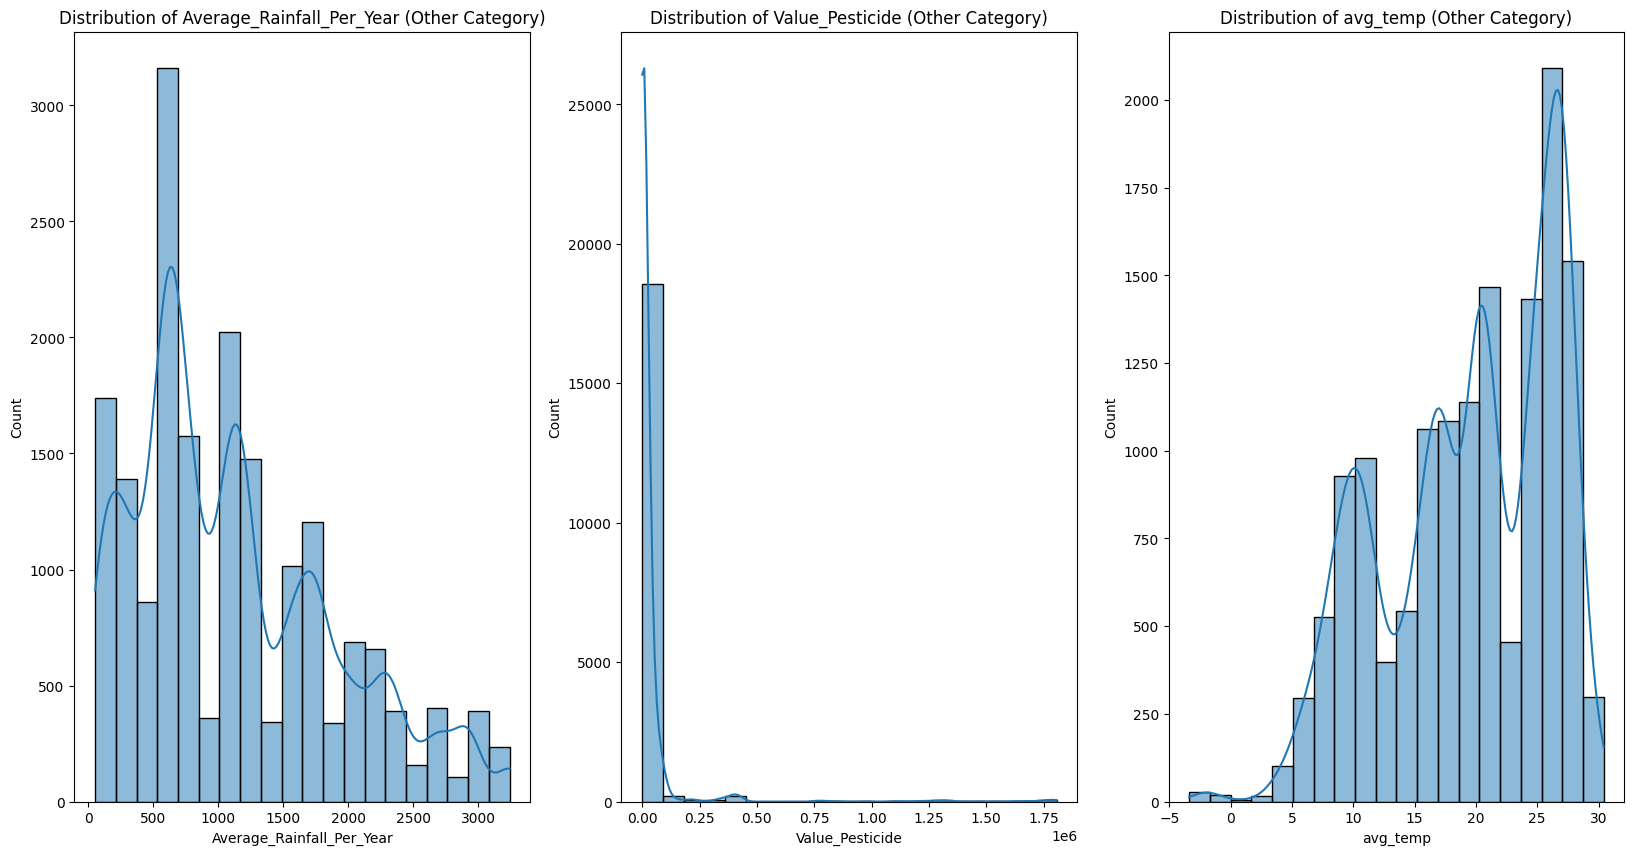

In [ ]:
check_for_dist = ["Average_Rainfall_Per_Year", "Value_Pesticide", "avg_temp"]

plt.figure(figsize=(20, 10))
for j, col in enumerate(check_for_dist, 1):
    plt.subplot(1, 3, j)
    dataset = pd.to_numeric(merged_df[merged_df["Category"] == "Other"][col], errors='coerce').dropna()
    sns.histplot(dataset, bins=20, kde=True)
    plt.title(f"Distribution of {col} (Other Category)")
plt.show()


<b> Distrbution Analysis: </b>

1. Average_Ranfall_Per_Year is highly right-skewed and has a long tail, so mean imputation may not reliable. Median imputation is better in this case.

2. Value_Pesticide is even more right-skewed and has extreme values, so median imputation is better.

3. Avg_temp has a bimodal distribution (i.e. two peaks), so either mean or median could work here. However, median is better because it avoids pulling imputed values toward a single peak.

In [ ]:
for c in ["Average_Rainfall_Per_Year", "Value_Pesticide", "avg_temp"]:
    merged_df[c] = pd.to_numeric(merged_df[c], errors='coerce')
    merged_df.loc[merged_df["Category"] == "Other", c] = merged_df[c].median()

We notice that missing values have decreased significantly after median imputation.

Some missing values remain in Average_Rainfall_Per_Year and avg_temp, so we will handle this through looking at the SIDS & SIDS_LDC categories.


In [ ]:
merged_df.isnull().sum()

Area                               0
Item_x                             0
Year                               0
Unit_x                             0
Value_Yield                        0
Average_Rainfall_Per_Year       2409
Value_Pesticide                  872
avg_temp                        1049
Category                           0
Percentage of Missing Values       0
dtype: int64

In [ ]:
merged_df[merged_df['Category'] == 'Other'].isnull().sum()

Area                            0
Item_x                          0
Year                            0
Unit_x                          0
Value_Yield                     0
Average_Rainfall_Per_Year       0
Value_Pesticide                 0
avg_temp                        0
Category                        0
Percentage of Missing Values    0
dtype: int64

##### Handling 'SIDS and SIDS-LDC' Categories
<a id="sids-handle"></a>

Since SIDS has low standard deviation, KNN imputation is appropriate because their values are relatively similar.

However, before fully committing to KNN imputation, let’s validate whether it is the best choice given that we have fewer missing values at this point. We will check the distribution of the data to see if the features are skewed or contain extreme outliers.

<b> Why we chose a KDE (Kernel Density Estimate) Plot vs. Historgram? </b>

We have a lot of data, here, so a KDE plot is better because it smooths out the data and can show us the overlapping distributions of SIDS and SIDS-LDC.

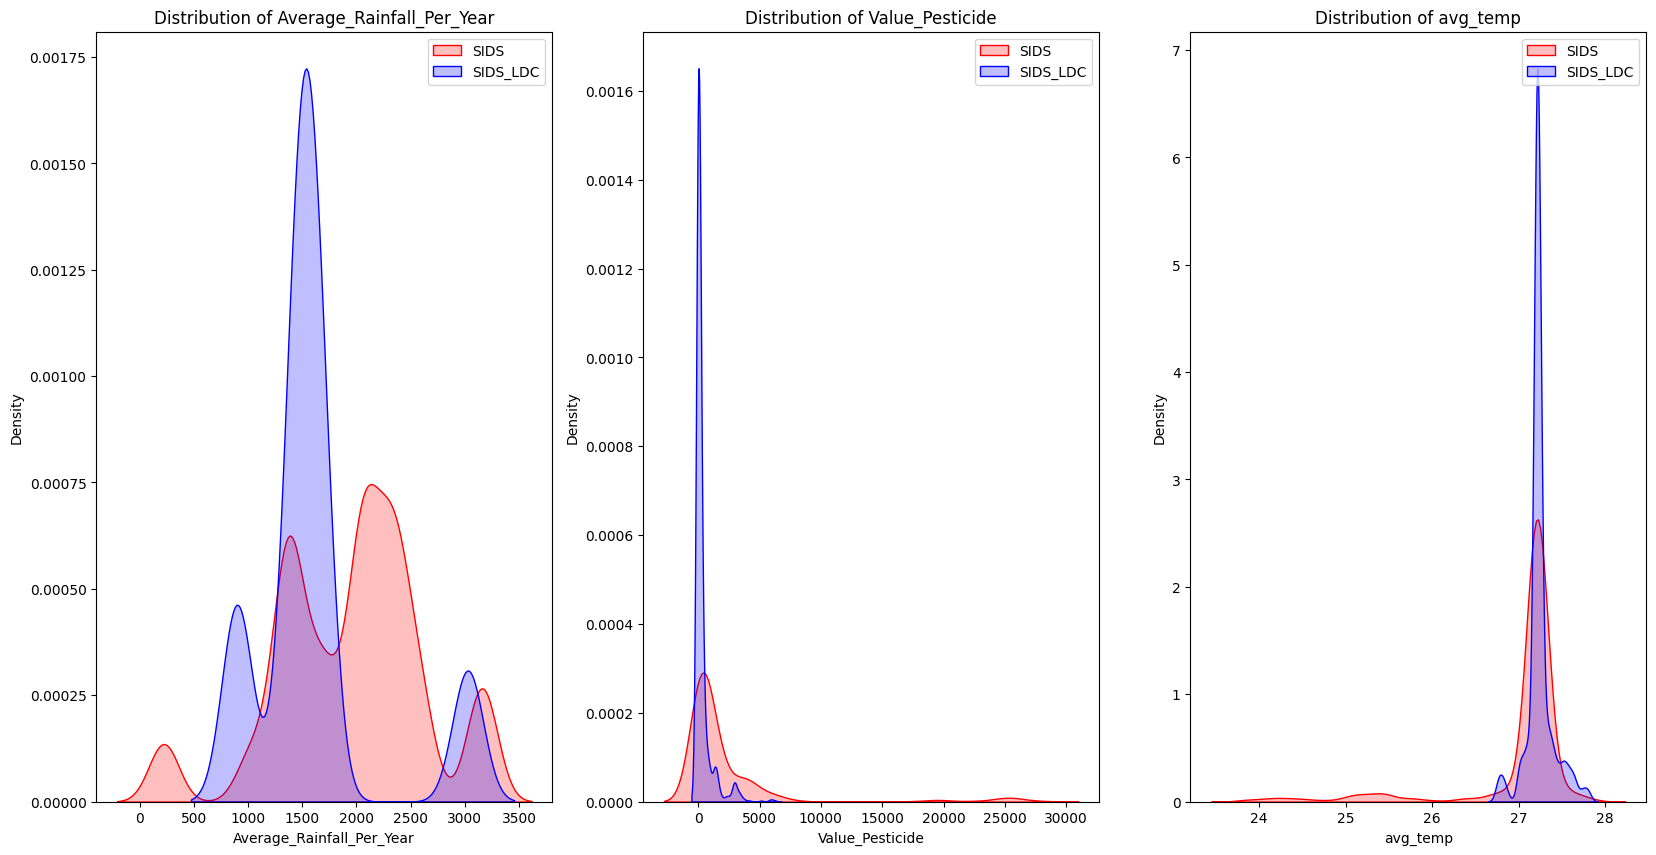

In [ ]:
check_for_dist = ["Average_Rainfall_Per_Year", "Value_Pesticide", "avg_temp"]

plt.figure(figsize=(20, 10))
for j, c in enumerate(check_for_dist, 1):
    plt.subplot(1, 3, j)
    data_sid = pd.to_numeric(merged_df[merged_df["Category"] == 'SIDS'][c], errors='coerce').dropna()
    data_sid_ldc = pd.to_numeric(merged_df[merged_df["Category"] == 'SIDS_LDC'][c], errors='coerce').dropna()

    sns.kdeplot(data_sid, color = "red", label = "SIDS", fill = True)
    sns.kdeplot(data_sid_ldc, color = "blue", label = "SIDS_LDC", fill = True)
    plt.legend()
    plt.title(f"Distribution of {c}")
plt.show()

<b> Distrbution Analysis on KDE: </b>
1) Average Rainfall Per Year
- SIDS_LDC has a stronger peak around ~1500 mm, so most countries in this category may have received similar rainfall.
    - The distribution in SIDS-LDC is very concentrated, so will use median imputation.
- SIDS shows more spread, with multiple peaks, so there is more variation.
- Since there is some overlap, using KNN is interpreted at this point.

2) Value of Pesticide Use
- The distribution is highly skewed. Most values are concentrated very close to zero, with a long tail extending to high values.
-  If we are using pesticide as a feature in a model, then extreme values could distort predictions. This suggests checking for outliers (i.e. the next step in Preprocessing).
    - Something to note about KDE: Can exaggerate or suppress outliers
- Median imputation might be safer because the distributions differ significantly.
3) Average Temperature
- The data is not widely spread out.
- Most of the values are concentrated around the single peak which occurs at point grater than 27 degrees.
- KNN is not needed because there’s almost no meaningful variation.
- Median imputation is the best choice.

We notice that SIDS has a high proportion of the present missing data in the whole dataframe, so we will need to handle this once again through KNN imputation. Now, we will not be considering the percentage of missing data per country as done before in Investigation and Fix #2.

In [ ]:
merged_df[merged_df['Category'] == 'SIDS'].isnull().sum()

Area                               0
Item_x                             0
Year                               0
Unit_x                             0
Value_Yield                        0
Average_Rainfall_Per_Year       2372
Value_Pesticide                  872
avg_temp                        1001
Category                           0
Percentage of Missing Values       0
dtype: int64

In [ ]:
merged_df[merged_df["Category"] != "SIDS"].groupby("Category").apply(lambda x: x.isnull().sum())

,Area,Item_x,Year,Unit_x,Value_Yield,Average_Rainfall_Per_Year,Value_Pesticide,avg_temp,Category,Percentage of Missing Values
Category,,,,,,,,,,
Other,0,0,0,0,0,0,0,0,0,0
SIDS_LDC,0,0,0,0,0,37,0,48,0,0


<b> Applying Median Imputation on Value_Pesticide for SIDS categories. </b>
- The errors='coerce' ensures only numeric values are in the column

In [ ]:
for c in ["Value_Pesticide"]:
    merged_df[c] = pd.to_numeric(merged_df[c], errors='coerce')
    merged_df.loc[merged_df["Category"] == "SIDS", c] = merged_df[merged_df["Category"] == "SIDS"][c].median()

As seen below, we do not have any missing values in Value_Pesticide.

In [ ]:
merged_df.isnull().sum()

Area                               0
Item_x                             0
Year                               0
Unit_x                             0
Value_Yield                        0
Average_Rainfall_Per_Year       2409
Value_Pesticide                    0
avg_temp                        1049
Category                           0
Percentage of Missing Values       0
dtype: int64

<b> Handling Average_Rainfall_Per_Year in SIDS Category </b>

- We used Cross Validation to find the best n_neighbors value for KNN imputation.

As we see later on in this part of the code, cross balidation and KNN did not work well because KNN relies on similar neighbors, but here, there might not be enough similar data points for accurate predictions.

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error as MSE

In [ ]:
non_null_data = merged_df[merged_df['Average_Rainfall_Per_Year'].notnull()].copy()
X = non_null_data[['Average_Rainfall_Per_Year']].values

In [ ]:
test_vals =  [1, 3, 5, 7, 10, 15, 20]
mse_vals = {k: [] for k in test_vals}

In [ ]:
np.random.seed(42)
X = np.random.normal(loc=1500, scale=300, size=(1000, 1))

mask = np.random.rand(*X.shape) < 0.2
X_missing = X.copy()

X_missing[mask] = np.nan

kf = KFold(n_splits=5, shuffle=True, random_state=42)


In [ ]:
for i in test_vals:
    mse_scores = []

    for train_index, test_index in kf.split(X_missing):
        X_train, X_test = X_missing[train_index], X[train_index]

        imputer = KNNImputer(n_neighbors=i)
        X_train_imputed = imputer.fit_transform(X_train)
        X_test_imputed = imputer.transform(X_test)

        missing_indices = np.where(mask[test_index])
        mse = MSE(X[train_index][missing_indices], X_test_imputed[missing_indices])
        mse_scores.append(mse)

    mse_vals[i] = np.mean(mse_scores)

optimal_k = min(mse_vals, key=mse_vals.get)
optimal_k, mse_vals

(1, {1: 0.0, 3: 0.0, 5: 0.0, 7: 0.0, 10: 0.0, 15: 0.0, 20: 0.0})

<b> Median Imputation for Average_Rainfall_Per_Year in SIDS-LDC and SID Categories </b>

In [ ]:
for cat in ['SIDS', 'SIDS_LDC']:
    for c in ["Average_Rainfall_Per_Year"]:
        median = merged_df.loc[merged_df["Category"] == cat, "Average_Rainfall_Per_Year"].median()

        merged_df.loc[
            (merged_df["Category"] == cat) & (merged_df["Average_Rainfall_Per_Year"].isnull()),
        "Average_Rainfall_Per_Year"] = median

After the median imputation, we can see that there are no missing values in the Average_Rainfall_Per_Year column. Next step is to handle avg_temp missing values by SIDS and SIDS-LDC categories.

In [ ]:
merged_df.isnull().sum()

Area                               0
Item_x                             0
Year                               0
Unit_x                             0
Value_Yield                        0
Average_Rainfall_Per_Year          0
Value_Pesticide                    0
avg_temp                        1049
Category                           0
Percentage of Missing Values       0
dtype: int64

<b> KNN Imputation on avg_temp Column for both SIDS and SIDS-LDC </b>

In [ ]:
for cat in ['SIDS', 'SIDS_LDC']:
    for c in ["avg_temp"]:
        median = merged_df.loc[merged_df["Category"] == cat, "avg_temp"].median()

        merged_df.loc[
            (merged_df["Category"] == cat) & (merged_df["avg_temp"].isnull()),
        "avg_temp"] = median

In [ ]:
merged_df.isnull().sum()

Area                            0
Item_x                          0
Year                            0
Unit_x                          0
Value_Yield                     0
Average_Rainfall_Per_Year       0
Value_Pesticide                 0
avg_temp                        0
Category                        0
Percentage of Missing Values    0
dtype: int64

In [ ]:
merged_df.drop(columns=['Percentage of Missing Values'], inplace=True)

In [ ]:
merged_df.shape

(28120, 9)

In [ ]:
merged_df.head()

,Area,Item_x,Year,Unit_x,Value_Yield,Average_Rainfall_Per_Year,Value_Pesticide,avg_temp,Category
0,Afghanistan,Maize,1990,hg/ha,17582,1130.0,1597.0,24.55,Other
1,Afghanistan,Maize,1991,hg/ha,16800,1130.0,1597.0,24.55,Other
2,Afghanistan,Maize,1992,hg/ha,15000,1130.0,1597.0,24.55,Other
3,Afghanistan,Maize,1993,hg/ha,16786,1130.0,1597.0,24.55,Other
4,Afghanistan,Maize,1994,hg/ha,16667,1130.0,1597.0,24.55,Other


## Encoding
<a id="encoding"></a>

Most traditional models cannot handle categorical data. Therefore, we need to encode the data into a numerical format.

### 1. Latitude-Longitude Encoding
<a id="lat-one-hot-encoding"></a>

We have the countries in the dataset, but we can also encode the latitude and longitude of each country. This can help the model understand the geographical location of each country and how it might affect crop yield.

We will use country_coordinates.csv to get the latitude and longitude of each country. This csv file was found on Kaggle, but is originally from [here](https://developers.google.com/public-data/docs/canonical/countries_csv).

Before doing so, we correct some country names that are off or have slight variations.

Country Names in Our Dataset:

In [ ]:
for country in sorted(merged_df['Area'].unique()):
    print(country)

Afghanistan
Albania
Algeria
Angola
Antigua and Barbuda
Argentina
Armenia
Australia
Austria
Azerbaijan
Bahamas
Bahrain
Bangladesh
Barbados
Belarus
Belgium
Belgium-Luxembourg
Belize
Benin
Bhutan
Bolivia (Plurinational State of)
Bosnia and Herzegovina
Botswana
Brazil
Brunei Darussalam
Bulgaria
Burkina Faso
Burundi
Cabo Verde
Cambodia
Cameroon
Canada
Central African Republic
Chad
Chile
China
China, Hong Kong SAR
China, Taiwan Province of
China, mainland
Colombia
Comoros
Congo
Cook Islands
Costa Rica
Croatia
Cuba
Cyprus
Czechia
Côte d'Ivoire
Democratic People's Republic of Korea
Democratic Republic of the Congo
Denmark
Djibouti
Dominica
Dominican Republic
Ecuador
Egypt
El Salvador
Equatorial Guinea
Eritrea
Estonia
Eswatini
Ethiopia
Fiji
Finland
France
Gabon
Gambia
Georgia
Germany
Ghana
Greece
Grenada
Guatemala
Guinea
Guinea-Bissau
Guyana
Haiti
Honduras
Hungary
Iceland
India
Indonesia
Iran (Islamic Republic of)
Iraq
Ireland
Israel
Italy
Jamaica
Japan
Jordan
Kazakhstan
Kenya
Kuwait
Kyrgyzstan

Country Name Corrections After Referencing OpenStreetMap’s Nominatim API:

In [ ]:
name_corrections = {"Côte d'Ivoire": "Ivory Coast",
    "Iran (Islamic Republic of)": "Iran",
    "Lao People's Democratic Republic": "Laos",
    "Micronesia (Federated States of)": "Micronesia",
    "Occupied Palestinian Territory": "Palestine",
    "Republic of Korea": "South Korea",
    "Republic of Moldova": "Moldova",
    "Russian Federation": "Russia",
    "Sudan (former)": "Sudan",
    "USSR": "Russia",
    "United States of America": "United States",
    "Venezuela (Bolivarian Republic of)": "Venezuela",
    "Viet Nam": "Vietnam",
    "The former Yugoslav Republic of Macedonia": "North Macedonia",
    "Yugoslav SFR": "Serbia and Montenegro",
    "China, Taiwan Province of": "Taiwan",
    "China, Hong Kong SAR": "Hong Kong"
}

merged_df['Area'] = merged_df['Area'].replace(name_corrections)

Reading the country_coordinates.csv file and checking the first few rows.

In [ ]:
country_coordinates_df = pd.read_csv('country_coordinates.csv')

In [ ]:
country_coordinates_df.head()

,country_code,latitude,longitude,country,usa_state_code,usa_state_latitude,usa_state_longitude,usa_state
0,AD,42.546245,1.601554,Andorra,AK,63.588753,-154.493062,Alaska
1,AE,23.424076,53.847818,United Arab Emirates,AL,32.318231,-86.902298,Alabama
2,AF,33.939110,67.709953,Afghanistan,AR,35.201050,-91.831833,Arkansas
3,AG,17.060816,-61.796428,Antigua and Barbuda,AZ,34.048928,-111.093731,Arizona
4,AI,18.220554,-63.068615,Anguilla,CA,36.778261,-119.417932,California


In [ ]:
country_coordinates_df.columns

Index(['country_code', 'latitude', 'longitude', 'country', 'usa_state_code',
       'usa_state_latitude', 'usa_state_longitude', 'usa_state'],
      dtype='object')

Some columns (e.g. country_code) are not necessary for our analysis, so we will drop them.

In [ ]:
country_coordinates_df.drop(columns=['country_code', 'usa_state_code', 'usa_state_latitude', 'usa_state_longitude', 'usa_state'], inplace=True)

In [ ]:
country_coordinates_df.rename(columns={'country': 'Area'}, inplace=True)

In [ ]:
country_coordinates_df.columns

Index(['latitude', 'longitude', 'Area'], dtype='object')

Merging the latitude and longitude columns with the merged_df.

In [ ]:
merged_df = merged_df.merge(country_coordinates_df, on="Area", how="left")
merged_df.head()

,Area,Item_x,Year,Unit_x,Value_Yield,Average_Rainfall_Per_Year,Value_Pesticide,avg_temp,Category,latitude,longitude
0,Afghanistan,Maize,1990,hg/ha,17582,1130.0,1597.0,24.55,Other,33.93911,67.709953
1,Afghanistan,Maize,1991,hg/ha,16800,1130.0,1597.0,24.55,Other,33.93911,67.709953
2,Afghanistan,Maize,1992,hg/ha,15000,1130.0,1597.0,24.55,Other,33.93911,67.709953
3,Afghanistan,Maize,1993,hg/ha,16786,1130.0,1597.0,24.55,Other,33.93911,67.709953
4,Afghanistan,Maize,1994,hg/ha,16667,1130.0,1597.0,24.55,Other,33.93911,67.709953


We want to confirm that there aren't any latitude or longitude values missing after the merge. As we can see there are 2911 missing for both, so we will have to fix this.

In [ ]:
merged_df.isnull().sum()

Area                            0
Item_x                          0
Year                            0
Unit_x                          0
Value_Yield                     0
Average_Rainfall_Per_Year       0
Value_Pesticide                 0
avg_temp                        0
Category                        0
latitude                     2911
longitude                    2911
dtype: int64

The countries below have missing latitude/longitude values, and when we manually check on the country_coordinates.csv file, then we can see that the country names do not match due to spelling or combination (e.g. Serbia and Montenegro).

Something to note is that Montenegro declared independence from Serbia in 2006. There is not a very large difference in their latitude and longitude values, so we can use the same values for both countries.

South Sudan and Macedonia are not present in the country_coordinates.csv file, so we will manually add the latitude and longitude values.

In [ ]:
missing_coords = merged_df[merged_df["latitude"].isnull() | merged_df["longitude"].isnull()]["Area"].unique()
print(missing_coords)

['Belgium-Luxembourg' 'Bolivia (Plurinational State of)'
 'Brunei Darussalam' 'Cabo Verde' 'China, mainland' 'Congo' 'Ivory Coast'
 'Czechia' "Democratic People's Republic of Korea"
 'Democratic Republic of the Congo' 'Myanmar' 'Palestine'
 'Pacific Islands Trust Territory' 'Sao Tome and Principe'
 'Serbia and Montenegro' 'South Sudan' 'Eswatini' 'Syrian Arab Republic'
 'North Macedonia' 'United Republic of Tanzania'
 'Wallis and Futuna Islands']


In [ ]:
country_name_corrections = {
    'Belgium-Luxembourg': 'Belgium',
    'Bolivia (Plurinational State of)': 'Bolivia',
    'Brunei Darussalam': 'Brunei',
    'Cabo Verde': 'Cape Verde',
    'China, mainland': 'China',
    'Congo': 'Congo [Republic]',
    'Ivory Coast': "Côte d'Ivoire",
    'Czechia': 'Czech Republic',
    "Democratic People's Republic of Korea": 'North Korea',
    'Democratic Republic of the Congo': 'Congo [DRC]',
    'Myanmar': 'Myanmar [Burma]',
    'Palestine': 'Palestinian Territories',
    'Pacific Islands Trust Territory': 'Micronesia',
    'Sao Tome and Principe': 'São Tomé and Príncipe',
    'South Sudan': 'South Sudan',
    'Eswatini': 'Swaziland',
    'Syrian Arab Republic': 'Syria',
    'North Macedonia': 'Macedonia',
    'United Republic of Tanzania': 'Tanzania',
    'Wallis and Futuna Islands': 'Wallis and Futuna',
    'Serbia and Montenegro': 'Serbia'
}

merged_df["Area"] = merged_df["Area"].replace(country_name_corrections)

In [ ]:
merged_df = merged_df.merge(country_coordinates_df, on="Area", how="left")
merged_df.head()

,Area,Item_x,Year,Unit_x,Value_Yield,Average_Rainfall_Per_Year,Value_Pesticide,avg_temp,Category,latitude_x,longitude_x,latitude_y,longitude_y
0,Afghanistan,Maize,1990,hg/ha,17582,1130.0,1597.0,24.55,Other,33.93911,67.709953,33.93911,67.709953
1,Afghanistan,Maize,1991,hg/ha,16800,1130.0,1597.0,24.55,Other,33.93911,67.709953,33.93911,67.709953
2,Afghanistan,Maize,1992,hg/ha,15000,1130.0,1597.0,24.55,Other,33.93911,67.709953,33.93911,67.709953
3,Afghanistan,Maize,1993,hg/ha,16786,1130.0,1597.0,24.55,Other,33.93911,67.709953,33.93911,67.709953
4,Afghanistan,Maize,1994,hg/ha,16667,1130.0,1597.0,24.55,Other,33.93911,67.709953,33.93911,67.709953


In [ ]:
merged_df.drop(columns=['latitude_x', 'longitude_x'], inplace=True)
merged_df.rename(columns={'latitude_y': 'latitude', 'longitude_y': 'longitude'}, inplace=True)

In [ ]:
manual_fill = {
    "Macedonia": {"latitude": 41.6086, "longitude": 21.7453},
    "South Sudan": {"latitude": 7.9631, "longitude": 30.1583}
}

for country, coords in manual_fill.items():
    merged_df.loc[merged_df["Area"] == country, ["latitude", "longitude"]] = coords["latitude"], coords["longitude"]

In [ ]:
merged_df.isnull().sum()

Area                         0
Item_x                       0
Year                         0
Unit_x                       0
Value_Yield                  0
Average_Rainfall_Per_Year    0
Value_Pesticide              0
avg_temp                     0
Category                     0
latitude                     0
longitude                    0
dtype: int64

In [ ]:
merged_df.rename(columns={'Item_x': 'Crop Name'}, inplace=True)
merged_df.drop(columns=['Unit_x'], inplace=True)

In [ ]:
merged_df.head()

,Area,Crop Name,Year,Value_Yield,Average_Rainfall_Per_Year,Value_Pesticide,avg_temp,Category,latitude,longitude
0,Afghanistan,Maize,1990,17582,1130.0,1597.0,24.55,Other,33.93911,67.709953
1,Afghanistan,Maize,1991,16800,1130.0,1597.0,24.55,Other,33.93911,67.709953
2,Afghanistan,Maize,1992,15000,1130.0,1597.0,24.55,Other,33.93911,67.709953
3,Afghanistan,Maize,1993,16786,1130.0,1597.0,24.55,Other,33.93911,67.709953
4,Afghanistan,Maize,1994,16667,1130.0,1597.0,24.55,Other,33.93911,67.709953


### 2. One-Hot Encoding
<a id="#cat-one-hot-encoding"></a>

1. Category column is a categorical column that needs to be encoded. We will use one-hot encoding to convert the category column into numerical format because label encoding would create an artificial ordinal relationship (i.e. Other < SIDS < SIDS-LDC < Associate Members).

2. Crop column is a categorical column that needs to be encoded. We will use one-hot encoding to convert the crop column into numerical format because label encoding would create an artificial ordinal relationship (i.e. Maize < Rice < Wheat).

In [ ]:
merged_df['Category'].unique()

array(['Other', 'SIDS', 'SIDS_LDC'], dtype=object)

In [ ]:
merged_df['Crop Name'].unique()

array(['Maize', 'Potatoes', 'Rice, paddy', 'Wheat', 'Sorghum', 'Soybeans',
       'Cassava', 'Sweet potatoes', 'Yams', 'Plantains and others'],
      dtype=object)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

To avoid multicollinearity, we will drop the first column of each one-hot encoded column.
For example, if we one-hot encode on the Category column and get columns A, B, C, and D, we will drop column A. If B, C, D are all 0, then A must be 1. This avoids redundancy in the data.


In [ ]:
features_to_encode = ['Category', 'Crop Name']

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(sparse=False, drop='first'), features_to_encode)
    ], remainder='passthrough'
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

X = pipeline.fit_transform(merged_df)

/Users/parneetkaur/Desktop/Personal/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
new_columns = pipeline.named_steps['preprocessor'].get_feature_names_out()
merged_df = pd.DataFrame(X, columns=new_columns)

In [ ]:
merged_df.columns

Index(['encoder__Category_SIDS', 'encoder__Category_SIDS_LDC',
       'encoder__Crop Name_Maize', 'encoder__Crop Name_Plantains and others',
       'encoder__Crop Name_Potatoes', 'encoder__Crop Name_Rice, paddy',
       'encoder__Crop Name_Sorghum', 'encoder__Crop Name_Soybeans',
       'encoder__Crop Name_Sweet potatoes', 'encoder__Crop Name_Wheat',
       'encoder__Crop Name_Yams', 'remainder__Area', 'remainder__Year',
       'remainder__Value_Yield', 'remainder__Average_Rainfall_Per_Year',
       'remainder__Value_Pesticide', 'remainder__avg_temp',
       'remainder__latitude', 'remainder__longitude'],
      dtype='object')

The merged_df now has about 10 new columns from the one-hot encoding. However, the column names are not very descriptive. We will rename them to make them more understandable.

In [ ]:
column_rename_map = {
    'encoder__Category_SIDS': 'Category_SIDS',
    'encoder__Category_SIDS_LDC': 'Category_SIDS_LDC',
    'encoder__Crop Name_Maize': 'Crop_Maize',
    'encoder__Crop Name_Plantains and others': 'Crop_Plantains_Others',
    'encoder__Crop Name_Potatoes': 'Crop_Potatoes',
    'encoder__Crop Name_Rice, paddy': 'Crop_Rice_Paddy',
    'encoder__Crop Name_Sorghum': 'Crop_Sorghum',
    'encoder__Crop Name_Soybeans': 'Crop_Soybeans',
    'encoder__Crop Name_Sweet potatoes': 'Crop_Sweet_Potatoes',
    'encoder__Crop Name_Wheat': 'Crop_Wheat',
    'encoder__Crop Name_Yams': 'Crop_Yams',
    'remainder__Area': 'Area',
    'remainder__Year': 'Year',
    'remainder__Unit_x': 'Unit',
    'remainder__Value_Yield': 'Value_Yield',
    'remainder__Average_Rainfall_Per_Year': 'Average_Rainfall_Per_Year',
    'remainder__Value_Pesticide': 'Value_Pesticide',
    'remainder__avg_temp': 'Avg_Temp',
    'remainder__latitude': 'Latitude',
    'remainder__Longitude': 'Longitude'
}

In [ ]:
final_df = merged_df.rename(columns=column_rename_map)

In [ ]:
final_df.rename(columns={'remainder__longitude': 'Longitude'}, inplace=True)

In [ ]:
final_df = final_df.apply(pd.to_numeric, errors='coerce')

In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28120 entries, 0 to 28119
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Category_SIDS              28120 non-null  float64
 1   Category_SIDS_LDC          28120 non-null  float64
 2   Crop_Maize                 28120 non-null  float64
 3   Crop_Plantains_Others      28120 non-null  float64
 4   Crop_Potatoes              28120 non-null  float64
 5   Crop_Rice_Paddy            28120 non-null  float64
 6   Crop_Sorghum               28120 non-null  float64
 7   Crop_Soybeans              28120 non-null  float64
 8   Crop_Sweet_Potatoes        28120 non-null  float64
 9   Crop_Wheat                 28120 non-null  float64
 10  Crop_Yams                  28120 non-null  float64
 11  Area                       0 non-null      float64
 12  Year                       28120 non-null  int64  
 13  Value_Yield                28120 non-null  int

In [ ]:
final_df.shape

(28120, 19)

## Outlier Detection
<a id="outlier-detection"></a>

We are doing outlier detection because we noticed extreme values when we tried the KDE plot previously, but that was when we had missing values. We are aiming to detect outlier so that extreme values do not skew results and lead to misleading conclusions.

Example of Outlier (i.e not yet seen, but could be present): If most temperatures are 27°C, but one value is 50°C, the mean shifts significantly so it needs to be handled.

Outlier detection and handling will help later in linear regression and other algorithms that assume normal distribution. We want to prevent the models from having biased model parameters.

***

We will, first, check the normality of our dataset using the [Kolmogorov–Smirnov test](https://www.geeksforgeeks.org/kolmogorov-smirnov-test-ks-test/) because our dataset is quite large and choosing an outlier imputation method depends on the normality of the data.

We will not detect outliers for binary columns (e.g. Category_SIDS) because there are only two possible values, so there can't be extreme values. Outlier imputation methods are not necessary because theuy are designed for continuous data.

We are confident about the accuracy of logitude and latitude features because they are based on real-world data.

In [ ]:
from scipy.stats import kstest as ks

<b> Analysis of Numerical Distribution Checks: </b>
- Given our dataset is very large, even small deviations from normality become statistically significant in KS test.
- Reason for low p-values:
    - KS test is very sensitive to minor departures from normality

We will confirm the presence of outliers in the dataset by using visaul methods (e.g. histogram)

In [ ]:
select_check = ['Value_Yield', 'Average_Rainfall_Per_Year', 'Value_Pesticide', 'Avg_Temp']
for column in select_check:
    stats, p = ks(final_df[column].dropna(), 'norm')
    if p < 0.05:
        print(f"{column} is not normally distributed")
    else:
        print(f"{column} is normally distributed")
    print(f'{column}: stat={stats:.4f}, p={p:.4f}\n')

Value_Yield is not normally distributed
Value_Yield: stat=1.0000, p=0.0000

Average_Rainfall_Per_Year is not normally distributed
Average_Rainfall_Per_Year: stat=1.0000, p=0.0000

Value_Pesticide is not normally distributed
Value_Pesticide: stat=0.9883, p=0.0000

Avg_Temp is not normally distributed
Avg_Temp: stat=1.0000, p=0.0000



The KS Test indicated that the variables we identified for outlier detection are not normally distributed. The histograms below confirm this as well:
1. Value_Yield Distribution: The data is highly right-skewed, with a long tail towards higher values.
2. Average_Rainfall_Per_Year Distribution: The distribution has multiple peaks (modes), rather than a single peak.
3. Value_Pesticide Distribution: The data is highly skewed, concentrated near zero with a long right tail.
4. avg_temp Distribution: The distribution is bimodal, with two distinct peaks.

Hence, outlier imputation methods that assume normality (e.g. Z-score) are not appropriate for our dataset. We will use non-parametric method (e.g. IQR) to detect and handle outliers.

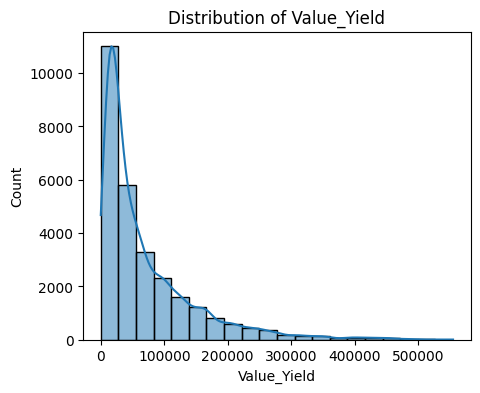

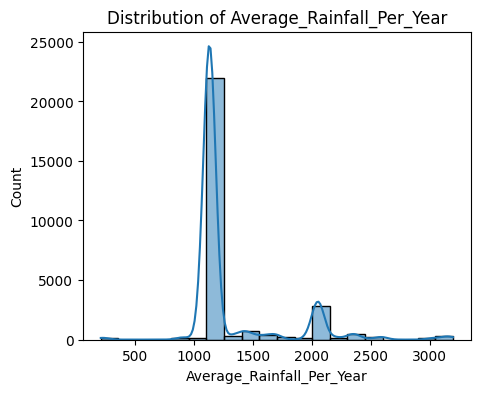

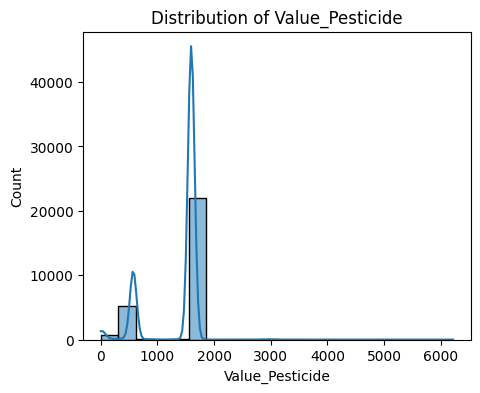

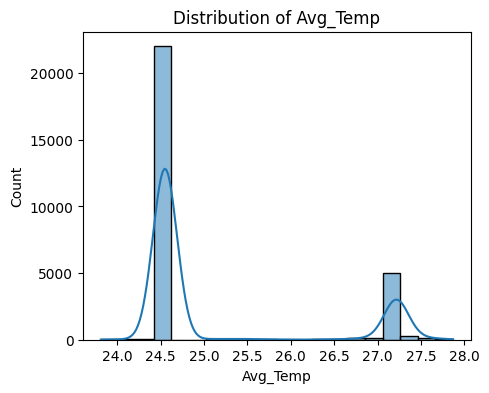

In [ ]:
for column in select_check:
    plt.figure(figsize=(5,4))
    sns.histplot(final_df[column], kde=True, bins=20)
    plt.title(f"Distribution of {column}")
    plt.show()

### Handling Outliers in Value_Yield
<a id="outlier-detection1"></a>

We will use IQR to detect outliers because it is resilient to skewed data and can handle long tails well. This is something we learned after referring to [this article](https://medium.com/@ayeshasidhikha188/unveiling-outliers-exploring-z-score-and-iqr-methods-for-boxplots-67b0f3086720#:~:text=Exponential%20distributions%20have%20a%20distinct,extreme%20values%20in%20the%20tail.).

IQR (Interquartile Range) = Q3 - Q1: Measures the spread of the middle 50% of the data. So, Q3 is the 75th percentile and Q1 is the 25th percentile.

In [ ]:
def iqr_detect_outliers(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)

    IQR = Q3 - Q1
    l_bound = Q1 - 1.5 * IQR
    u_bound = Q3 + 1.5 * IQR

    return (data < l_bound) | (data > u_bound)

In [ ]:
check_value_yields = iqr_detect_outliers(final_df['Value_Yield'])
print(f"There are", check_value_yields.sum(), "outliers in the Value_Yield column")

There are 1726 outliers in the Value_Yield column


We will use Winsorization because we want to keep outliers but cap the extreme values here because they are not errors, but rather extreme values that skew the model.

If a value greater than u_bound, it is replaced with u_bound. Otherwise, the orignal value is kept.

If a value less than l_bound, it is replaced with l_bound. Otherwise, the orignal value is kept.

In [ ]:
from scipy.stats.mstats import winsorize
final_df['Value_Yield_Winsorized'] = winsorize(final_df['Value_Yield'], limits=[0.1, 0.1])

After Winsorization, we have capped values at both ends.
- The extreme right tail (high outliers) was reduced, so the most extreme values were replaced with 168,033.
- The lowest values were raised to at least 9,890, so small extreme values were adjusted upward.

In [ ]:
print(f"Original Max: {final_df['Value_Yield'].max()}, Winsorized Max: {final_df['Value_Yield_Winsorized'].max()}")
print(f"Original Min: {final_df['Value_Yield'].min()}, Winsorized Min: {final_df['Value_Yield_Winsorized'].min()}")

Original Max: 554855, Winsorized Max: 168033
Original Min: 0, Winsorized Min: 9890


Checking Distribution After Winsorization:

<Axes: xlabel='Value_Yield_Winsorized', ylabel='Count'>

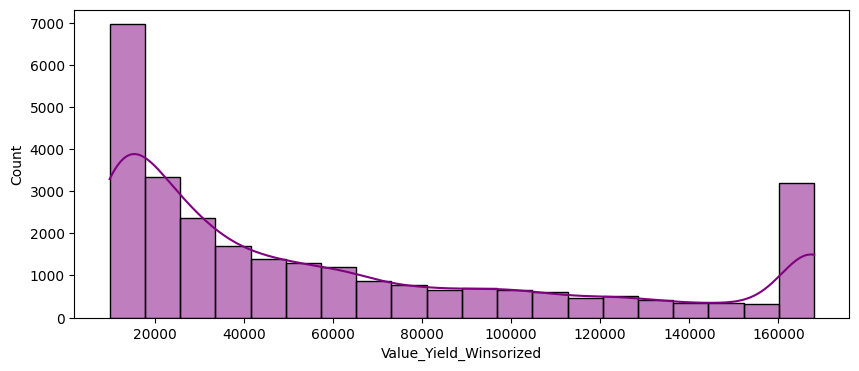

In [ ]:
plt.figure(figsize=(10,4))
sns.histplot(final_df['Value_Yield_Winsorized'], kde=True, color='purple', bins=20)

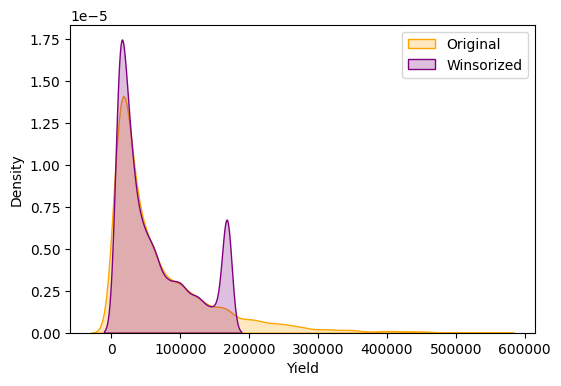

In [ ]:
plt.figure(figsize=(6,4))
sns.kdeplot(final_df['Value_Yield'], label='Original', color='orange', fill=True)
sns.kdeplot(final_df['Value_Yield_Winsorized'], label='Winsorized', color='purple', fill=True)
plt.xlabel('Yield')
plt.ylabel('Density')
plt.legend()

We are satisfied with the results of Winsorization because the distribution is more balanced and the extreme values are capped, but it may be worth comparing model performance with and without Winsorization. We will keep the original dataset for comparison.

In [ ]:
original_df = final_df.copy()
original_df.drop(columns=['Value_Yield_Winsorized'], inplace=True)
original_df.columns

Index(['Category_SIDS', 'Category_SIDS_LDC', 'Crop_Maize',
       'Crop_Plantains_Others', 'Crop_Potatoes', 'Crop_Rice_Paddy',
       'Crop_Sorghum', 'Crop_Soybeans', 'Crop_Sweet_Potatoes', 'Crop_Wheat',
       'Crop_Yams', 'Area', 'Year', 'Value_Yield', 'Average_Rainfall_Per_Year',
       'Value_Pesticide', 'Avg_Temp', 'Latitude', 'Longitude'],
      dtype='object')

In [ ]:
final_df.drop(columns=['Value_Yield'], inplace=True)
final_df.columns

Index(['Category_SIDS', 'Category_SIDS_LDC', 'Crop_Maize',
       'Crop_Plantains_Others', 'Crop_Potatoes', 'Crop_Rice_Paddy',
       'Crop_Sorghum', 'Crop_Soybeans', 'Crop_Sweet_Potatoes', 'Crop_Wheat',
       'Crop_Yams', 'Area', 'Year', 'Average_Rainfall_Per_Year',
       'Value_Pesticide', 'Avg_Temp', 'Latitude', 'Longitude',
       'Value_Yield_Winsorized'],
      dtype='object')

### Handling Outliers in Average_Rainfall_Per_Year
<a id="outlier-detection2"></a>

Given the distribution we saw earlier, we will use Isolation Forest because it is [robust to multi-modal distributions](https://cran.r-project.org/web/packages/isotree/vignettes/An_Introduction_to_Isolation_Forests.html).

In [ ]:
from sklearn.ensemble import IsolationForest

We will consider 10% of the data points as outliers because we want to be conservative in our approach.

In [ ]:
iso_forest = IsolationForest(contamination=0.1, random_state=42)
final_df['score'] = iso_forest.fit_predict(final_df[['Average_Rainfall_Per_Year']].values)

In [ ]:
rainfall_outliers = final_df[final_df['score'] == -1]
print(f"There are {rainfall_outliers.shape[0]} outliers in the Average_Rainfall_Per_Year")

There are 2805 outliers in the Average_Rainfall_Per_Year


In [ ]:
final_df["Rainfall_Winsorized"] = winsorize(final_df["Average_Rainfall_Per_Year"], limits=[0.005, 0.1])

Applying Winsorization to the Average_Rainfall_Per_Year column.
- We want to still reduce extreme values but don't want to overcorrect.
- It keeps more high values intact, which could be meaningful in later context.

In [ ]:
print(f"Original Max: {final_df['Average_Rainfall_Per_Year'].max()}, Winsorized Max: {final_df['Rainfall_Winsorized'].max()}")
print(f"Original Min: {final_df['Average_Rainfall_Per_Year'].min()}, Winsorized Min: {final_df['Rainfall_Winsorized'].min()}")

Original Max: 3200.0, Winsorized Max: 2051.0
Original Min: 206.0, Winsorized Min: 900.0


Checking Distribution After Winsorization:

<Axes: xlabel='Rainfall_Winsorized', ylabel='Count'>

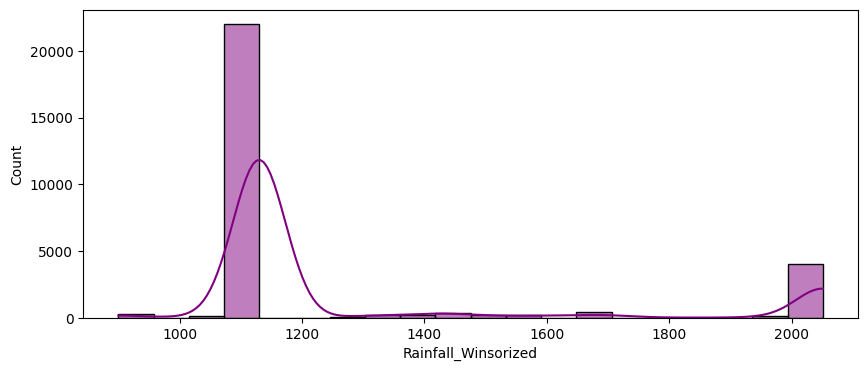

In [ ]:
plt.figure(figsize=(10,4))
sns.histplot(final_df['Rainfall_Winsorized'], kde=True, color='purple', bins=20)

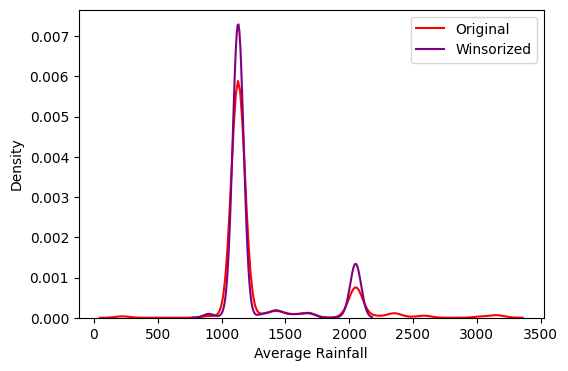

In [ ]:
plt.figure(figsize=(6,4))
sns.kdeplot(final_df['Average_Rainfall_Per_Year'], label='Original', color='red')
sns.kdeplot(final_df['Rainfall_Winsorized'], label='Winsorized', color='purple')
plt.xlabel('Average Rainfall')
plt.ylabel('Density')
plt.legend()

In [ ]:
final_df.drop(columns=['Average_Rainfall_Per_Year'], inplace=True)

### Handling Outliers in Value_Pesticide
<a id="outlier-detection3"></a>

Isolation Forest worked well for highly skewed data, so we will use it again for Value_Pesticide.

In [ ]:
iso_forest = IsolationForest(contamination=0.1, random_state=42)
final_df['score'] = iso_forest.fit_predict(final_df[['Value_Pesticide']].values)

In [ ]:
pesticide_outliers = final_df[final_df['score'] == -1]
print(f"There are {pesticide_outliers.shape[0]} outliers in Value_Pesticide")

There are 974 outliers in Value_Pesticide


In [ ]:
final_df['Pesticide_Winsorized'] = winsorize(final_df['Value_Pesticide'], limits=[0.01, 0.05])

In [ ]:
print(f"Original Max: {final_df['Value_Pesticide'].max()}, Winsorized Max: {final_df['Pesticide_Winsorized'].max()}")
print(f"Original Min: {final_df['Value_Pesticide'].min()}, Winsorized Min: {final_df['Pesticide_Winsorized'].min()}")

Original Max: 6218.11049180328, Winsorized Max: 1597.0
Original Min: 0.03, Winsorized Min: 1.78


<Axes: xlabel='Pesticide_Winsorized', ylabel='Count'>

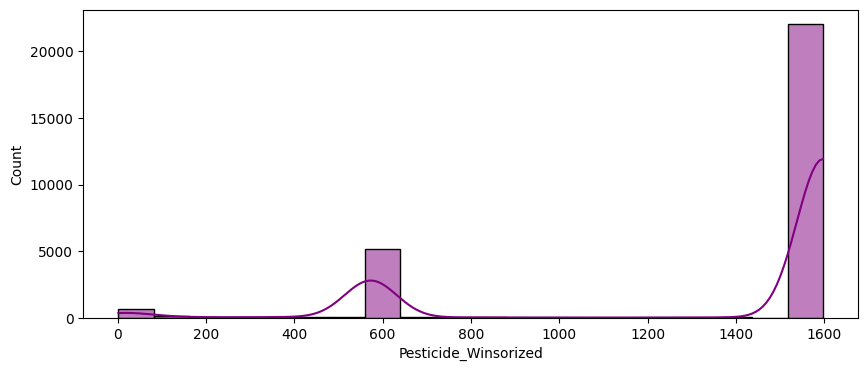

In [ ]:
plt.figure(figsize=(10,4))
sns.histplot(final_df['Pesticide_Winsorized'], kde=True, color='purple', bins=20)

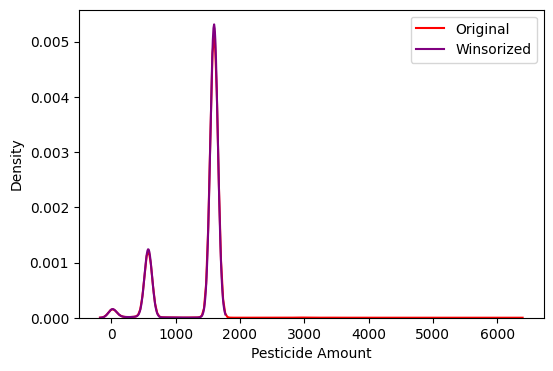

In [ ]:
plt.figure(figsize=(6,4))
sns.kdeplot(final_df['Value_Pesticide'], label='Original', color='red')
sns.kdeplot(final_df['Pesticide_Winsorized'], label='Winsorized', color='purple')
plt.xlabel('Pesticide Amount')
plt.ylabel('Density')
plt.legend()

### Handling Outliers in Avg_Temp
<a id="outlier-detection4"></a>

Since avg_temp exhibits a tightly clustered distribution with minor variations, LOF is well-suited to detect subtle anomalies in regions where temperature data should be consistent.

In [ ]:
from sklearn.neighbors import LocalOutlierFactor

In [ ]:
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)

In [ ]:
outliers = lof.fit_predict(final_df[['Avg_Temp']].values)
outlier_count = (outliers == -1).sum()

In [ ]:
print(f"There are {outlier_count} outliers in the Avg_Temp column")

There are 639 outliers in the Avg_Temp column


Because we have a bimodal distribution, we want to identify peaks in the distribution.
- If the second peak has a small count, then those values may be true outliers and removing them would not affect the model.
- If the second peak has a significant count, then the second peak represents a real subgroup, and Winsorization may be better instead of removal.

In [ ]:
from scipy.signal import find_peaks

<Axes: xlabel='Avg_Temp', ylabel='Density'>

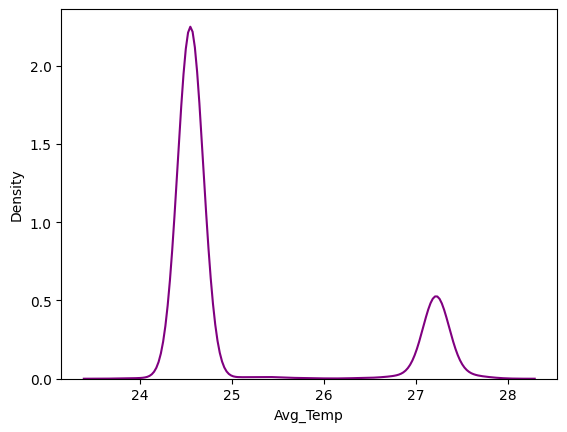

In [ ]:
sns.kdeplot(final_df['Avg_Temp'], color="purple", label="Density")

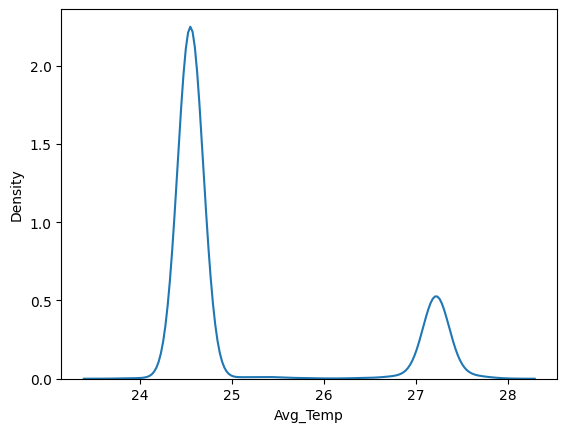

In [ ]:
kde_vals = sns.kdeplot(final_df['Avg_Temp']).get_lines()[0].get_data()
x_vals, y_vals = kde_vals[0], kde_vals[1]
peaks, _ = find_peaks(y_vals, prominence=0.01)

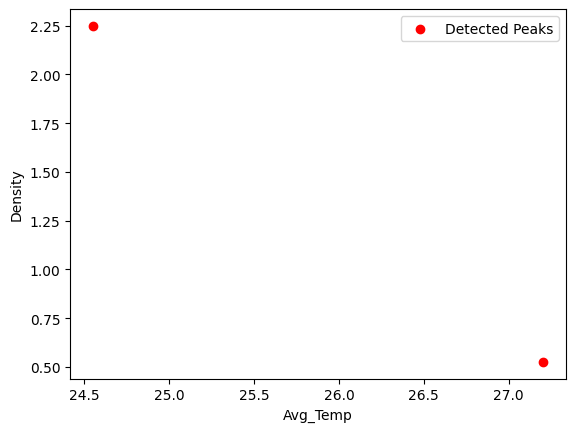

In [ ]:
plt.scatter(x_vals[peaks], y_vals[peaks], color='red', marker='o', label='Detected Peaks')
plt.xlabel(column)
plt.ylabel('Density')
plt.legend()

In [ ]:
low_peak_range = (final_df['Avg_Temp'] >= x_vals[peaks][0] - 0.2) & (final_df['Avg_Temp'] <= x_vals[peaks][0] + 0.2)
high_peak_range = (final_df['Avg_Temp'] >= x_vals[peaks][-1] - 0.2) & (final_df['Avg_Temp'] <= x_vals[peaks][-1] + 0.2)

low_peak_count = final_df[low_peak_range].shape[0]
high_peak_count = final_df[high_peak_range].shape[0]
print(f"There are {low_peak_count} data points in the low peak range")
print(f"There are {high_peak_count} data points in the high peak range")

There are 22030 data points in the low peak range
There are 5246 data points in the high peak range


The second peak (high peak) is not just a few extreme outliers—it consists of 5,258 values, which is a substantial part of the dataset. We will use Winsorization to cap the extreme values instead of removing them.

In [ ]:
final_df['Temp_Winsorized'] = winsorize(final_df['Avg_Temp'], limits=[0.01, 0.2])

In [ ]:
print(f"Original Max: {final_df['Avg_Temp'].max()}, Winsorized Max: {final_df['Temp_Winsorized'].max()}")
print(f"Original Min: {final_df['Avg_Temp'].min()}, Winsorized Min: {final_df['Temp_Winsorized'].min()}")

Original Max: 27.87, Winsorized Max: 26.85
Original Min: 23.81, Winsorized Min: 24.55


<Axes: xlabel='Temp_Winsorized', ylabel='Count'>

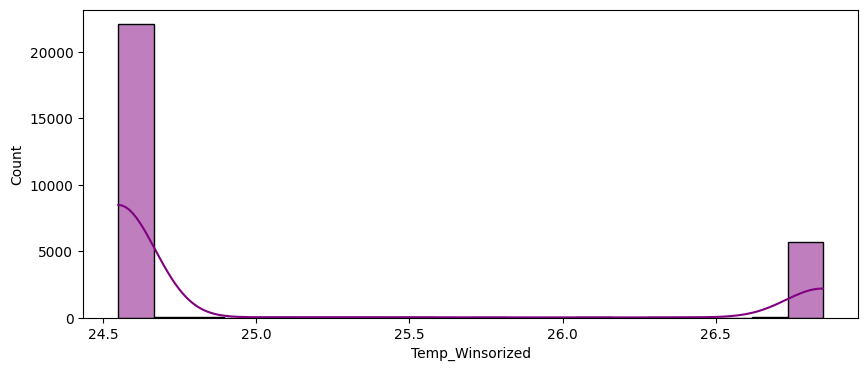

In [ ]:
plt.figure(figsize=(10,4))
sns.histplot(final_df['Temp_Winsorized'], kde=True, color='purple', bins=20)

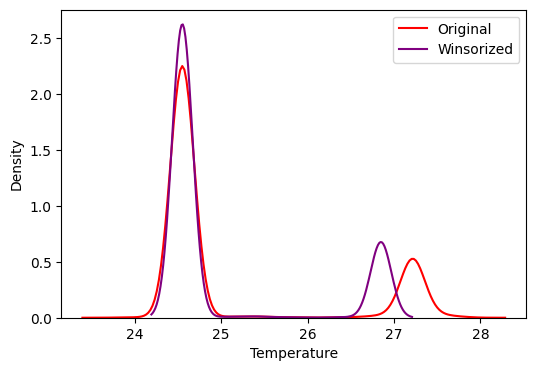

In [ ]:
plt.figure(figsize=(6,4))
sns.kdeplot(final_df['Avg_Temp'], label='Original', color='red')
sns.kdeplot(final_df['Temp_Winsorized'], label='Winsorized', color='purple')
plt.xlabel('Temperature')
plt.ylabel('Density')
plt.legend()

The winsorization adjusted it slightly but did not smooth it completely, but it is still better than the original distribution.

In [ ]:
final_df.drop(columns=['Value_Pesticide', 'Avg_Temp'], inplace=True)

In [ ]:
final_df.head()

,Category_SIDS,Category_SIDS_LDC,Crop_Maize,Crop_Plantains_Others,Crop_Potatoes,Crop_Rice_Paddy,Crop_Sorghum,Crop_Soybeans,Crop_Sweet_Potatoes,Crop_Wheat,Crop_Yams,Area,Year,Latitude,Longitude,Value_Yield_Winsorized,score,Rainfall_Winsorized,Pesticide_Winsorized,Temp_Winsorized
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1990,33.93911,67.709953,17582,1,1130.0,1597.0,24.55
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1991,33.93911,67.709953,16800,1,1130.0,1597.0,24.55
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1992,33.93911,67.709953,15000,1,1130.0,1597.0,24.55
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1993,33.93911,67.709953,16786,1,1130.0,1597.0,24.55
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1994,33.93911,67.709953,16667,1,1130.0,1597.0,24.55


In [ ]:
original_df.drop(columns=['Area'], inplace=True)

In [ ]:
original_df[original_df['Value_Yield'] == 0]

,Category_SIDS,Category_SIDS_LDC,Crop_Maize,Crop_Plantains_Others,Crop_Potatoes,Crop_Rice_Paddy,Crop_Sorghum,Crop_Soybeans,Crop_Sweet_Potatoes,Crop_Wheat,Crop_Yams,Year,Value_Yield,Average_Rainfall_Per_Year,Value_Pesticide,Avg_Temp,Latitude,Longitude
18617,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1999,0,1130.0,1597.0,24.55,31.952162,35.233154


In [ ]:
original_df.drop(original_df[original_df['Value_Yield'] == 0].index, inplace=True)

In [ ]:
original_df.head()

,Category_SIDS,Category_SIDS_LDC,Crop_Maize,Crop_Plantains_Others,Crop_Potatoes,Crop_Rice_Paddy,Crop_Sorghum,Crop_Soybeans,Crop_Sweet_Potatoes,Crop_Wheat,Crop_Yams,Year,Value_Yield,Average_Rainfall_Per_Year,Value_Pesticide,Avg_Temp,Latitude,Longitude
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1990,17582,1130.0,1597.0,24.55,33.93911,67.709953
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1991,16800,1130.0,1597.0,24.55,33.93911,67.709953
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1992,15000,1130.0,1597.0,24.55,33.93911,67.709953
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1993,16786,1130.0,1597.0,24.55,33.93911,67.709953
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1994,16667,1130.0,1597.0,24.55,33.93911,67.709953


## Data Visualization
<a id="data-visuals"></a>

### Central Question - What are the key factors that influence crop yield?
<a id="central-question"></a>

First, we will test for time trends in the data so that we can understand whether we should try a time series model or not.  

In [ ]:
new_df = original_df.copy()
new_df.set_index("Year", inplace=True)
new_grouped = new_df.groupby("Year")["Value_Yield"].mean()

We use average yield per year because we want to see a trend over time and using all the data points would be too noisy.

<b> Analysis of Trend Line </b>
- Yield has been increasing consistently from ~1990 to 2015.
- There are slight downward fluctuations around 2003-2004 and 2011-2012.
- SARIMA and other time series models when time series data shows strong seasonal patterns, meaning it has regular, predictable fluctuations that repeat over a fixed period.
    - This is true since yield shows a consistent increasing trend.

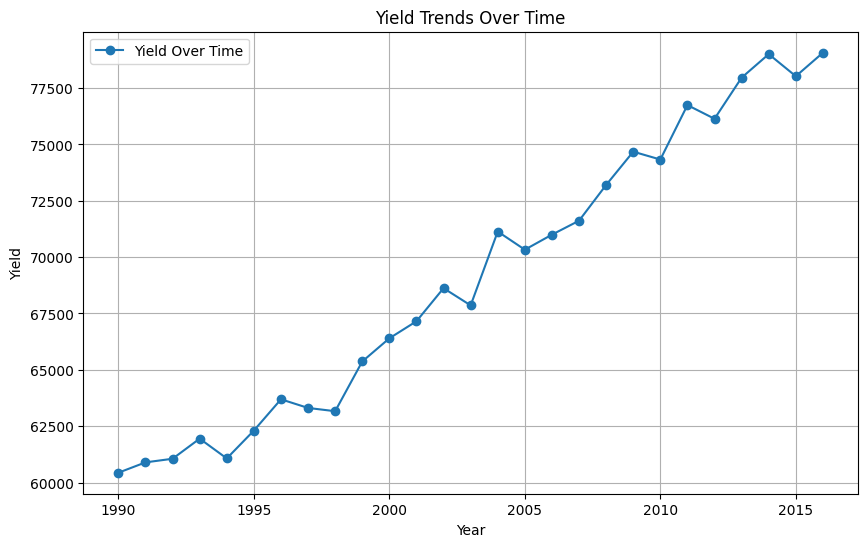

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(new_grouped.index, new_grouped, marker="o", linestyle="-", label="Yield Over Time")
plt.xlabel("Year")
plt.ylabel("Yield")
plt.title("Yield Trends Over Time")
plt.legend()
plt.grid(True)
plt.show()

<b> Confirmation of Seasonality </b>

The previous plot showed some ups and downs in yield over time, but these are likely irregular variations, not a true recurring seasonal pattern.

The decomposition model separates trend from seasonality, confirming that the ups and downs are long-term changes, not repeating yearly cycles.

<b> Interpretation: If there were monthly or quarterly data, we might have detected true seasonality. </b>

Source for Seasonal Decomposition Method: https://www.statsmodels.org/stable/generated/statsmodels.tsa.seasonal.seasonal_decompose.html

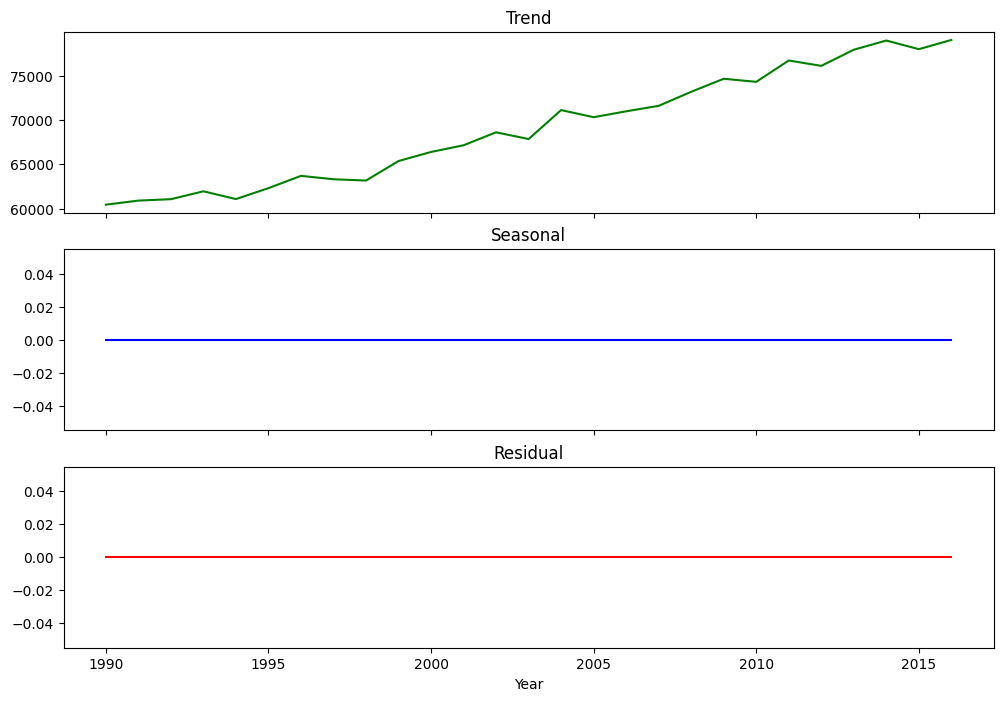

In [ ]:
new_grouped = new_grouped.astype(float)
decompose = sm.tsa.seasonal_decompose(new_grouped, model='additive', period=1)
figure, axes = plt.subplots(3, 1, figsize=(12, 8), sharex=True)
decompose.trend.plot(ax=axes[0], title="Trend", color='g')
decompose.seasonal.plot(ax=axes[1], title="Seasonal", color='b')
decompose.resid.plot(ax=axes[2], title="Residual", color='r')
plt.xlabel("Year")
plt.show()

#### How does adding environmental factors like rainfall and temperature affect the model's accuracy in predicting crop yield?
<a id="sub-question1"></a>

Prediction: Including environmental factors such as rainfall and temperature as features in the model will significantly improve its ability to predict crop yields compared to excluding them.

Before looking at temperature and rainfall separarely, lets check how all climate factors correlate with yield.

In [ ]:
pip install seaborn --upgrade

Note: you may need to restart the kernel to use updated packages.


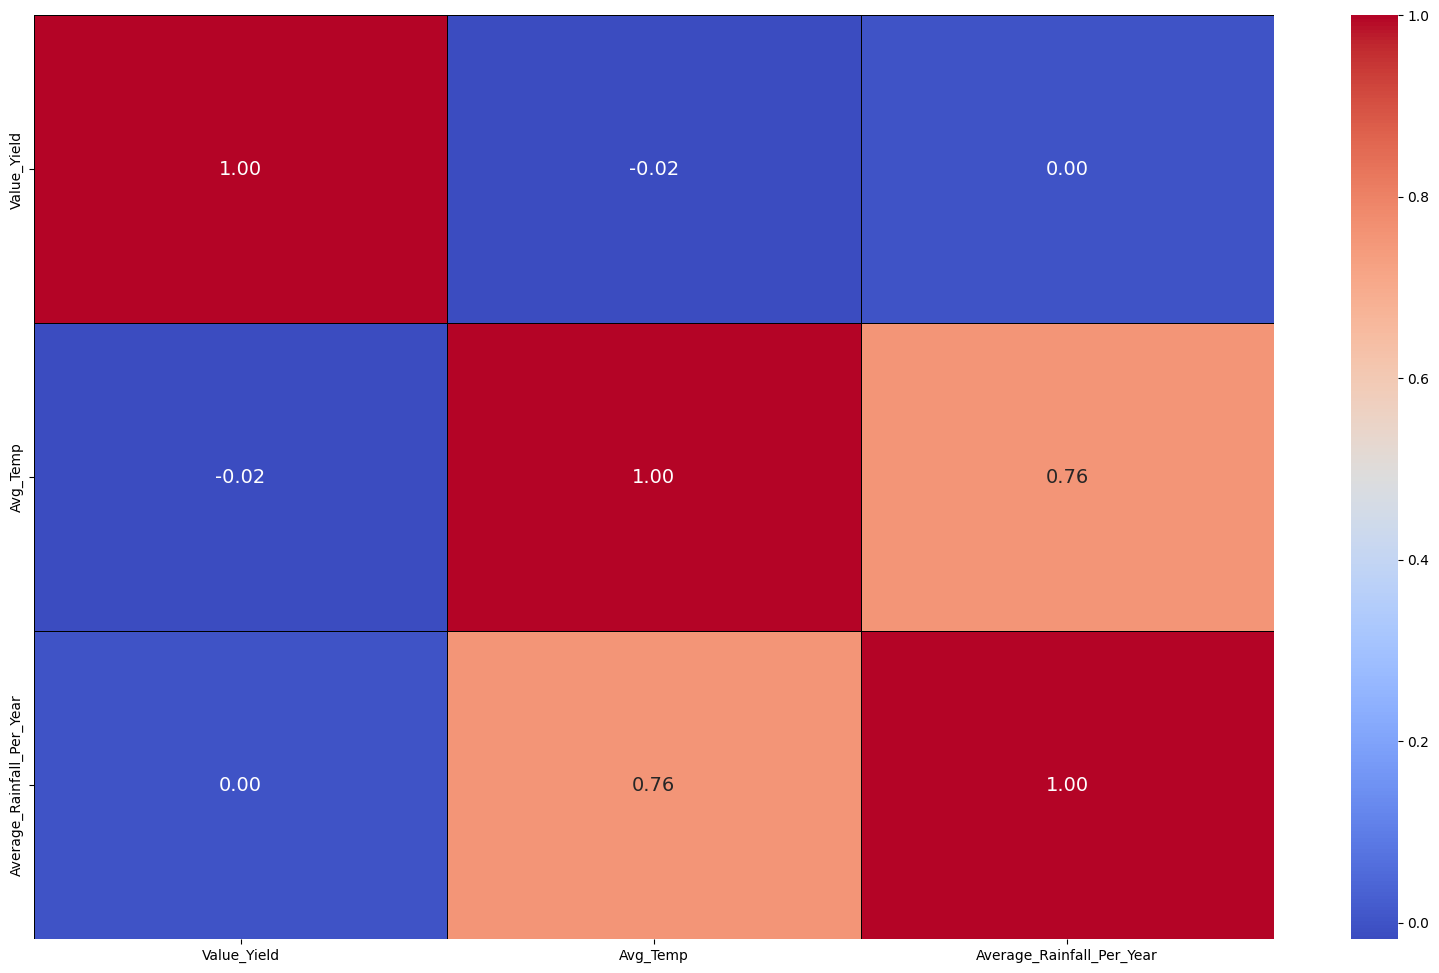

In [ ]:
plt.figure(figsize=(20, 12))
sns.heatmap(original_df[["Value_Yield", "Avg_Temp", "Average_Rainfall_Per_Year"]].corr(), annot=True,
            cmap="coolwarm", fmt=".2f", annot_kws={"size": 14}, linewidths=0.5, linecolor="black")
plt.show()

<b> Analysis of Heatmap: </b>
- Temperature and Rainfall Are Strongly Correlated: 0.76 indicates a high positive correlation, so regions with higher temperature also receive higher rainfall.
    - This is something we expect because tropical areas having both high temperatures and high rainfall.

- Yield vs. Temperature: -0.02 (almost zero correlation)

- Yield vs. Rainfall: 0.00 (no correlation)
    - This may not just mean no coorelation at this point because it could mean a non-linear relationship.

- Currently, Temeprature and rainfall alone do not strongly determine crop yield in this dataset.

Two Thing to Check:
1. Non-linear trends
2. Threshold Effects
    - Temperature or rainfall might affect crop yield only when they exceed (or fall below) a certain critical level.
    - Check this using a box plot where we expect to see  distinct changes in yield at certain temperature levels.

<b> Yield vs. Temperature </b>

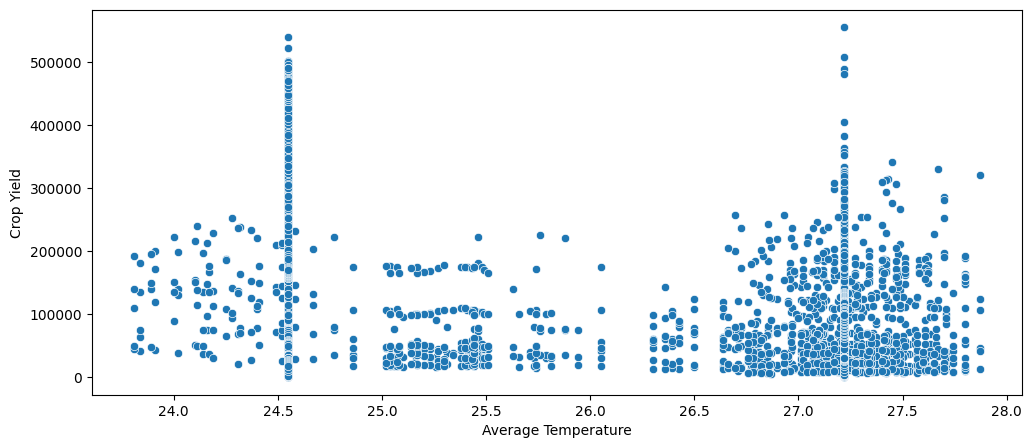

In [ ]:
plt.figure(figsize=(12, 5))
sns.scatterplot(x=original_df["Avg_Temp"], y=original_df["Value_Yield"])
plt.xlabel("Average Temperature")
plt.ylabel("Crop Yield")
plt.show()

We can notice that the scatter plot above does not show a clear trend because of a high variation. We will try a box plot.


- We separated into five different bins because in the previous scatter plot we saw a high variation so we wanted to clearly identify the median or spread of yield across different temperature ranges.
    - Avoid random variance
    - If yield drops or increases only beyond a certain temperature, binning allows us to visually check for this.

<b> Analysis of Box Plot: </b>
- The median yield does not highly increase or decrease across different temperature bins. Again, temperature alone does not strongly influence yield in a linear way as seen in the heatmap.
- Each temperature bin has a wide IQR, meaning that yield values are spread out rather than concentrated. This indicates that other factors play a bigger role in yield variation than temperature alone.
- The first temperature bin (23.8°C - 24.6°C) and the last bin (27°C - 27.9°C) have many extreme outliers. This was seen in the outlier detection section, so it is not surprising.
- The middle bins (24.6°C - 27.0°C) have slightly more compact distributions so this indicates that yield is more stable at moderate temperatures.  

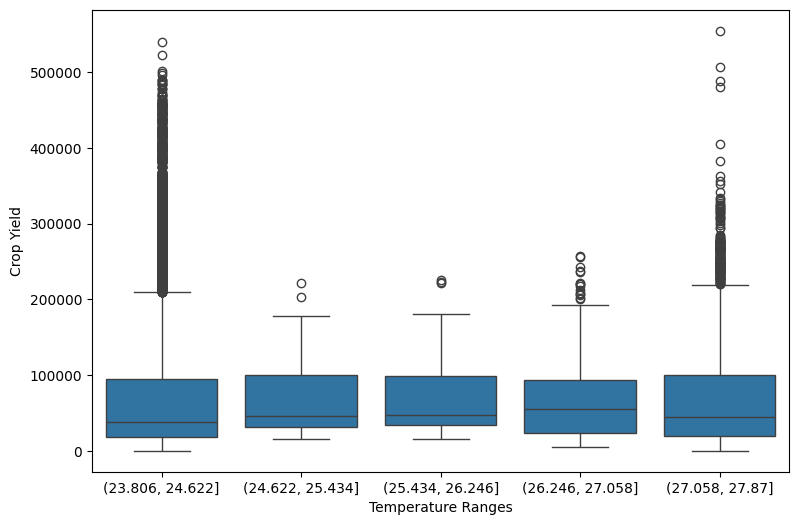

In [ ]:
plt.figure(figsize=(9,6))
sns.boxplot(x=pd.cut(original_df["Avg_Temp"], bins=5), y=original_df["Value_Yield"])
plt.xlabel("Temperature Ranges")
plt.ylabel("Crop Yield")
plt.show()

The boxplot does not fully capture potential non-linear trends or interaction effects with rainfall variable, so we will try a <b> Polynomial Curve </b> to detect non-linear trends and further confirm the threshold effect.

NOTE: We are not necessarily using this as an actual predictive model. This is something we will do later in this notebook. We are just exploring the temperature-yield relationship, so we don't necessarily need a full pipeline here.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [ ]:
X = original_df["Avg_Temp"].values.reshape(-1, 1)
y = original_df["Value_Yield"]

In [ ]:
pol_reg = PolynomialFeatures(degree=2)
X_poly = pol_reg.fit_transform(X)

In [ ]:
pol_model = LinearRegression()
pol_model.fit(X_poly, y)

LinearRegression()

In [ ]:
X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_pred = pol_model.predict(pol_reg.fit_transform(X_range))

<b> Analysis of Polynomial Fit: </b>
- The curve below is slightly U-shaped (or inverted quadratic), suggesting that crop yield decreases at moderate temperatures (24.5°C - 25.5°C) but increases again at higher temperatures (~27°C).
- There are dense clusters at 24.5°C and 27°C with high variance in crop yield
- Quadratic (U-shaped) Effect: Moderate temperatures (~25°C) may not be ideal for crops, but both lower (~24°C) and higher (~27°C) temperatures can still support high yields.

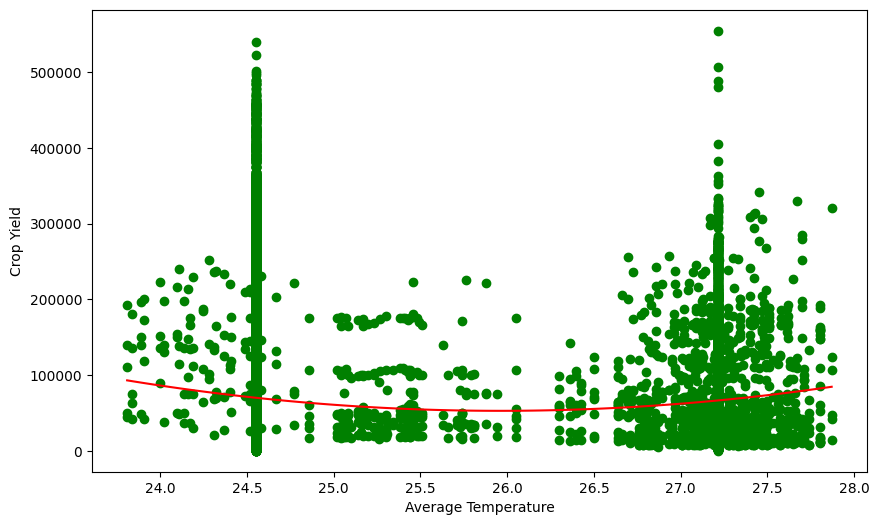

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(X, y, color='green')
plt.plot(X_range, y_pred, color='red')
plt.xlabel("Average Temperature")
plt.ylabel("Crop Yield")
plt.show()

<b> Yield vs. Rainfall </b>

From the previous correlation heatmap, we found that rainfall alone (0.00 correlation) did not seem to affect yield in a simple linear way.

We want to check whether too much or too little rainfall affects yield. We will use polynomial regression, similar to Yield vs. Temperature Analysis.

In [ ]:
X = original_df["Average_Rainfall_Per_Year"].values.reshape(-1, 1)
y = original_df["Value_Yield"]

In [ ]:
pol_reg = PolynomialFeatures(degree=2)
X_poly = pol_reg.fit_transform(X)

In [ ]:
pol_model = LinearRegression()
pol_model.fit(X_poly, y)

LinearRegression()

In [ ]:
X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_pred = pol_model.predict(pol_reg.fit_transform(X_range))

<b> Analysis of Polynomial Fit: </b>
- The Polynomial Curve below is almost flat, meaning that yield does not change significantly with rainfall.
- The polynomial curve remains constant, so there is no clear rainfall limit where yield highly drops or increases.
- Conclusion: Confirms that rainfall alone does not strongly affect crop yield, so it is not a strong predictor.

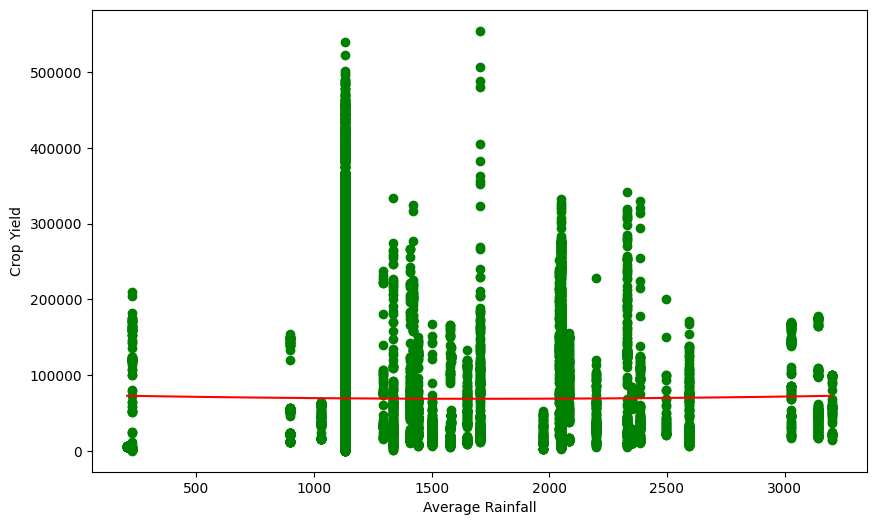

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(X, y, color='green')
plt.plot(X_range, y_pred, color='red')
plt.xlabel("Average Rainfall")
plt.ylabel("Crop Yield")
plt.show()

<b> Interaction Effects </b>
As seen in the coorelation heatmap, rainfall and temperature are strongly correlated (0.76 correlation), so this could mean that yield depends on a combination of rainfall and temperature rather than each one separately. We will check this using a 2D Heatmap  (Yield by Temperature & Rainfall).

We will bin the temperature and rainfall values to make the heatmap more interpretable.
The pivot table aggregates crop yield (Value_Yield) based on Temperature and Rainfall.

In [ ]:
original_df["Temperature_Bins"] = pd.cut(original_df["Avg_Temp"], bins=5)
original_df["Rainfall_Bins"] = pd.cut(original_df["Average_Rainfall_Per_Year"], bins=5)

In [ ]:
heatmap_data = original_df.pivot_table(index="Rainfall_Bins", columns="Temperature_Bins",
                                        values="Value_Yield", aggfunc="mean")

<b> Analysis of 2D Heatmap </b>
- The effect of temperature on yield depends on rainfall levels.
    - At 24.6°C, yield is high if rainfall is 2002 - 2601 mm, but much lower at 1400 mm rainfall.
- Rainfall moderates temperature effects—higher temperatures alone aren’t always harmful if enough rainfall is available. This is something we can logically expect as well.
- Multiple Linear Regression with Interaction Terms:
    - Yield = β0 + β1 × Temperature + β2 × Rainfall + β3 × Temperature × Rainfall + ϵ

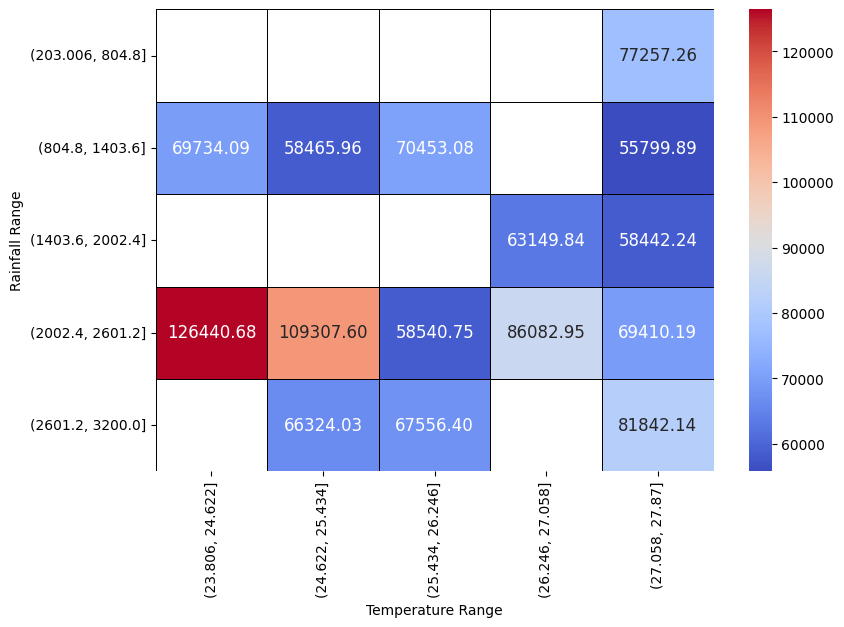

In [ ]:
plt.figure(figsize=(9, 6))
sns.heatmap(heatmap_data, cmap="coolwarm", annot=True, fmt=".2f", annot_kws={"size": 12}, linewidths=0.5, linecolor="black")
plt.xlabel("Temperature Range")
plt.ylabel("Rainfall Range")
plt.show()

There are some cells that are empty. We guess that this is because there are no data points that fall into those temperature and rainfall bins, but we will confirm by checking for missing values in the pivot table.

<b> Clarification: </b> Even if no data points exist for certain temperature-rainfall combinations, then there’s nothing to fill because it is not a "missing value" problem, but rather an absence of observations.

In [ ]:
heatmap_data.isnull().sum()

Temperature_Bins
(23.806, 24.622]    3
(24.622, 25.434]    2
(25.434, 26.246]    2
(26.246, 27.058]    3
(27.058, 27.87]     0
dtype: int64

Ordinary Least Squares (OLS) regression is used to check whether a quadratic trend exists in the relationship between temperature, rainfall, and crop yield before deciding on models.

<b> Analysis of OLS Regression: </b>
- We included Temperature² and Rainfall² to test if yield follows a U-shaped or inverted U-shaped trend with these variables.
    - Since Temperature² was significant (p < 0.05), we confirmed that temperature has a quadratic effect on yield.
- Rainfall and Rainfall² were not significant (p > 0.05), so rainfall alone does not strongly affect yield in a simple linear or quadratic form.

In [ ]:
import statsmodels.api as sm

original_df['Avg_Temp_Squared'] = original_df['Avg_Temp'] ** 2
original_df['Rainfall_Squared'] = original_df['Average_Rainfall_Per_Year'] ** 2

X = original_df[['Avg_Temp', 'Avg_Temp_Squared', 'Average_Rainfall_Per_Year', 'Rainfall_Squared']]
X = sm.add_constant(X)
y = original_df['Value_Yield']

model = sm.OLS(y, X).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:            Value_Yield   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     11.99
Date:                Sat, 15 Mar 2025   Prob (F-statistic):           9.84e-10
Time:                        16:24:28   Log-Likelihood:            -3.5581e+05
No. Observations:               28119   AIC:                         7.116e+05
Df Residuals:                   28114   BIC:                         7.117e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [ ]:
original_df.drop(columns=['Rainfall_Bins', 'Temperature_Bins'], inplace=True)

#### How does adding pesticide usage as a feature affect the model's accuracy in predicitng crop yield?

Prediciton: Including pesticide as features in the model will significantly improve its ability to predict crop yields compared to excluding it.

**Analysis of Scatterplot:**

Data suggests that pesticide usage alone may not be the sole factor influencing crop yield as similiar pesticide levels correspond to varying yields over a wide range.

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=training_years['Value_Pesticide'], y=training_years['Value_Yield'])
plt.title('Pesticides Usage vs Crop Yield (Training Data)')
plt.show()

NameError: name 'plt' is not defined

We can also see from this correlation heatmap that pesticides don't have that big of an effect or importance on the yield. However, let's see if any of our models corroborate this or slightly prove this wrong.

In [ ]:
plt.figure(figsize=(15, 11))
sns.heatmap(training_years.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap (Training Data)")
plt.show()

### Models Proposal for Sub-Questions #1 and #2
<a id="models-proposal"></a>

1. Baseline Model (M1) which only captures time trends and differences between crops.
    - Yield = β0 + β1 × Year + β2 × Crop Type + ϵ
2. Extend the model by adding Temperature & Rainfall (M2)
    - Yield = β0 + β1 × Year + β2 × Crop Type + β3 × Rainfall + β4 × Temperature + ϵ
3. Since Temperature² was significant in our earlier OLS test, we include it (M3)
    - Yield = β0 + β1 × Year + β2 × Crop Type + β3 × Rainfall + β4 × Temperature + β5 × Temperature² + ϵ
4. Interaction Terms Model (M4) to capture combined effects of Temperature & Rainfall
    - Yield = β0 + β1 × Year + β2 × Crop Type + β3 × Rainfall + β4 × Temperature + β5 × Temperature² + β6(Temperature × Rainfall) + ϵ
5. Decision Trees for Feature Importance (M5) - This will be a holistic model, which will include all features to see which ones are important.
    - Other sub-questions use this model as well.
6. Random Forest (M6)
    - If Decision Trees show that certain features are important, Random Forest can confirm this and provide better predicitons possibly.
7. XGBoost for Performance (M7)
    - If Random Forest shows that Decision Trees are effective, XGBoost can further improve performance.

# Modeling
<a id="h-1-model"></a>

## Central Question - What are the key factors that influence crop yield?
<a id="central-question-models"></a>


### Sub-Question #1: How does adding environmental factors like rainfall and temperature affect the model's accuracy in predicting crop yield?
<a id="sub-question1-test"></a>

NOTE: Readers may think that geopgraphical/spatial features (i.e. Latitude and Longitude) are not included in the models for this hypothesis. This is because we are mainly capturing crop differences and yearly trends and not focussing on geographic variations.

In [ ]:
original_df.drop(columns=['Rainfall_Squared'], inplace=True)

In [ ]:
original_df.head()

,Category_SIDS,Category_SIDS_LDC,Crop_Maize,Crop_Plantains_Others,Crop_Potatoes,Crop_Rice_Paddy,Crop_Sorghum,Crop_Soybeans,Crop_Sweet_Potatoes,Crop_Wheat,Crop_Yams,Year,Value_Yield,Average_Rainfall_Per_Year,Value_Pesticide,Avg_Temp,Latitude,Longitude,Avg_Temp_Squared
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1990,17582,1130.0,1597.0,24.55,33.93911,67.709953,602.7025
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1991,16800,1130.0,1597.0,24.55,33.93911,67.709953,602.7025
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1992,15000,1130.0,1597.0,24.55,33.93911,67.709953,602.7025
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1993,16786,1130.0,1597.0,24.55,33.93911,67.709953,602.7025
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1994,16667,1130.0,1597.0,24.55,33.93911,67.709953,602.7025


***

#### Baseline Model (M1)
<a id="baseline-model"></a>

Yield = β0 + β1 × Year + β2 × Crop Type + ϵ

In [ ]:
original_df['Year'].unique()

array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016])

In [ ]:
entries_per_year = original_df.groupby('Year').size()
entries_per_year

Year
1990     934
1991     932
1992    1010
1993    1030
1994    1034
1995    1040
1996    1039
1997    1042
1998    1041
1999    1041
2000    1049
2001    1049
2002    1047
2003    1049
2004    1052
2005    1052
2006    1056
2007    1058
2008    1060
2009    1059
2010    1062
2011    1062
2012    1066
2013    1065
2014    1063
2015    1062
2016    1065
dtype: int64

If we simply split the data into training and testing, it will mean data from any year (1990–2020) is mixed in both training and testing sets. That doesn't reflect a real-world scenario where we train on past years and predict future years.

We understand that time matters in crop yield prediction, so we want to create a time-aware training and testing set (i.e. close to a 80/20 split), where:
- Training = 1990-2010 (~77.4% of data)
- Testing =2011–2016 (~22.6%)


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
baseline_features = ["Year"] + [c for c in original_df.columns if "Crop_" in c]
target = "Value_Yield"

In [ ]:
train_years = (original_df['Year'] <= 2010)
test_years = (original_df['Year'] > 2010)

In [ ]:
X_train = original_df.loc[train_years, baseline_features]
y_train = original_df.loc[train_years, target]

X_test = original_df.loc[test_years, baseline_features]
y_test = original_df.loc[test_years, target]

In [ ]:
num_features = ['Year']
cat_features = [c for c in baseline_features if c not in num_features]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', 'passthrough', cat_features)
])

baseline_pipeline = Pipeline([
    ('Preprocessor', preprocessor),
    ('linearModel', LinearRegression())
])

baseline_pipeline.fit(X_train, y_train)

Pipeline(steps=[('Preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Year']),
                                                 ('cat', 'passthrough',
                                                  ['Crop_Maize',
                                                   'Crop_Plantains_Others',
                                                   'Crop_Potatoes',
                                                   'Crop_Rice_Paddy',
                                                   'Crop_Sorghum',
                                                   'Crop_Soybeans',
                                                   'Crop_Sweet_Potatoes',
                                                   'Crop_Wheat',
                                                   'Crop_Yams'])])),
                ('linearModel', LinearRegression())])

In [ ]:
train_score = baseline_pipeline.score(X_train, y_train)
test_score = baseline_pipeline.score(X_test, y_test)
print(f"Train R^2: {train_score:.4f}")
print(f"Test R^2: {test_score:.4f}")

Train R^2: 0.4887
Test R^2: 0.4967


<b> Analysis of Performance: </b>
- It is interesting that the model explains ~49% of the variance in yield using just time trends and crop type.
- The test score is close to the training score (with the training score being higher), so there is no overfitting.
- Since the model is very simple and does not include climatic factors (i.e. which we saw as good predictors), the model has lower performance.

There is no overfitting, as mentioned earlier, but we should still be careful and check for underfitting.

<b> Analysis of Model RMSE: </b>
Given the mean yield (~69k) and max yield (~554k), an RMSE of around 58k is quite large. Hence, there is underfitting.

In [ ]:
print(f"Min Yield: {original_df['Value_Yield'].min()}")
print(f"Max Yield: {original_df['Value_Yield'].max()}")
print(f"Mean Yield: {original_df['Value_Yield'].mean()}")

Min Yield: 50
Max Yield: 554855
Mean Yield: 69264.2704221345


In [ ]:
from sklearn.metrics import mean_squared_error as MSE

In [ ]:
train_preds = baseline_pipeline.predict(X_train[baseline_features])
train_rmse = np.sqrt(MSE(y_train, train_preds))
print(f"Training RMSE: {train_rmse:.4f}")

Training RMSE: 52458.9530


In [ ]:
test_preds = baseline_pipeline.predict(X_test[baseline_features])
test_rmse = np.sqrt(MSE(y_test, test_preds))
print(f"Testing RMSE: {test_rmse:.4f}")

Testing RMSE: 58841.7317


***

#### Baseline Model (M2)
<a id="baseline-model2"></a>

Yield = β0 + β1 × Year + β2 × Crop Type + β3 × Rainfall + β4 × Temperature + ϵ

<b> Analysis of Performance in M2: </b>
- Model M2 slightly improves over M1 (Baseline Model)
    - Small Improvement in Underfitting:
        - The test RMSE dropped from ~58,842 to ~58,437.
        - The train RMSE dropped from ~52,458 to ~52,193.
        - RMSE is still large relative to the mean yield (~69k).
 - Slight increase in R² indicates that adding temperature & rainfall has a minor positive impact. This was suspected preiously as well where we saw Rainfall having a lower effect on yield. Also, we saw in the OLS Regression that Temperature² was significant.
- Since the increase is minimal, it suggests nonlinear interactions are likely at play.
- The test score is close to the training score (with the training score being higher), so there is no overfitting.

In [ ]:
m2_features = ['Year', 'Average_Rainfall_Per_Year', 'Avg_Temp'] + [c for c in original_df.columns if "Crop_" in c]
# target is already defined

In [ ]:
train_years = (original_df['Year'] <= 2010)
test_years = (original_df['Year'] > 2010)

In [ ]:
X_train = original_df.loc[train_years, m2_features]
y_train = original_df.loc[train_years, target]

X_test = original_df.loc[test_years, m2_features]
y_test = original_df.loc[test_years, target]

In [ ]:
num_features = ['Year', 'Average_Rainfall_Per_Year', 'Avg_Temp']
cat_features = [c for c in m2_features if c not in num_features]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', 'passthrough', cat_features)
])

m2_pipeline = Pipeline([
    ('Preprocessor', preprocessor),
    ('linearModel', LinearRegression())
])

m2_pipeline.fit(X_train, y_train)

Pipeline(steps=[('Preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Year',
                                                   'Average_Rainfall_Per_Year',
                                                   'Avg_Temp']),
                                                 ('cat', 'passthrough',
                                                  ['Crop_Maize',
                                                   'Crop_Plantains_Others',
                                                   'Crop_Potatoes',
                                                   'Crop_Rice_Paddy',
                                                   'Crop_Sorghum',
                                                   'Crop_Soybeans',
                                                   'Crop_Sweet_Potatoes',
                                                   'Crop_Wheat',
                                                   'Crop_Yams'])])),
                ('linearModel', LinearRegression())])

In [ ]:
m2_train_score = m2_pipeline.score(X_train, y_train)
m2_test_score = m2_pipeline.score(X_test, y_test)

In [ ]:
print(f"Training R^2: {m2_train_score:.4f}")
print(f"Testing R^2: {m2_test_score:.4f}")

Training R^2: 0.4938
Testing R^2: 0.5036


In [ ]:
train_preds = m2_pipeline.predict(X_train)
train_rmse = np.sqrt(MSE(y_train, train_preds))
print(f"Training RMSE: {train_rmse:.4f}")

Training RMSE: 52194.2914


In [ ]:
test_preds = m2_pipeline.predict(X_test)
test_rmse = np.sqrt(MSE(y_test, test_preds))
print(f"Testing RMSE: {test_rmse:.4f}")

Testing RMSE: 58436.5841


***

#### Baseline Model 3 (M3)
<a id="baseline-model3"></a>

<b> Analysis of Performance in M3: </b>
- Adding Temperature² didn't significantly help.
    - Slightest improvement yet (just ~50 points better RMSE than M2).
- Conclusion: The quadratic effect of temperature isn't very strong in the dataset.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
m3_features = ['Year', 'Average_Rainfall_Per_Year', 'Avg_Temp', 'Avg_Temp_Squared'] + [c for c in original_df.columns if "Crop_" in c]
target = "Value_Yield"

In [ ]:
X_train = original_df.loc[train_years, m3_features]
y_train = original_df.loc[train_years, target]

X_test = original_df.loc[test_years, m3_features]
y_test = original_df.loc[test_years, target]

In [ ]:
num_features = ['Year', 'Average_Rainfall_Per_Year', 'Avg_Temp', 'Avg_Temp_Squared']
cat_features = [c for c in m3_features if c not in num_features]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', 'passthrough', cat_features)
])

m3_pipeline = Pipeline([
    ('Preprocessor', preprocessor),
    ('linearModel', LinearRegression())
])

m3_pipeline.fit(X_train, y_train)

Pipeline(steps=[('Preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Year',
                                                   'Average_Rainfall_Per_Year',
                                                   'Avg_Temp',
                                                   'Avg_Temp_Squared']),
                                                 ('cat', 'passthrough',
                                                  ['Crop_Maize',
                                                   'Crop_Plantains_Others',
                                                   'Crop_Potatoes',
                                                   'Crop_Rice_Paddy',
                                                   'Crop_Sorghum',
                                                   'Crop_Soybeans',
                                                   'Crop_Sweet_Potatoes',
                                                   'Crop_Wheat',
                                                   'Crop_Yams'])])),
                ('linearModel', LinearRegression())])

In [ ]:
m3_train_score = m3_pipeline.score(X_train, y_train)
m3_test_score = m3_pipeline.score(X_test, y_test)

In [ ]:
print(f"Training R^2: {m3_train_score:.4f}")
print(f"Testing R^2: {m3_test_score:.4f}")

Training R^2: 0.4948
Testing R^2: 0.5036


In [ ]:
train_preds = m3_pipeline.predict(X_train)
train_rmse = np.sqrt(MSE(y_train, train_preds))
print(f"Training RMSE: {train_rmse:.4f}")

Training RMSE: 52141.6028


In [ ]:
test_preds = m3_pipeline.predict(X_test)
test_rmse = np.sqrt(MSE(y_test, test_preds))
print(f"Testing RMSE: {test_rmse:.4f}")

Testing RMSE: 58433.6195


***

#### Interaction Term Model (M4)
<a id="interaction-term-model"></a>

Yield = β0 + β1 × Year + β2 × Crop Type + β3 × Rainfall + β4 × Temperature + β5 × Temperature² + β6(Temperature × Rainfall) + ϵ

<b> Analysis of Performance in M4: </b>
- This is the best model so far in terms of performance.
- R² improved from ~0.50 to ~0.52 (so ~2% better).
- Including interactions and polynomial terms helped capture more complexity.

<b> Improvement from M3 to M4: </b>
- Still some underfitting (since R² isn't super high), but progress is happening.
- RMSE decreased by around 1,200 points on the test set.
    - Improved generalization with no signs of overfitting (train and test RMSE are still close).
- Next Steps: To identify key drivers of yield, we will use Decision Trees to check feature importance.

In [ ]:
original_df['Temp_Rain_Interaction'] = original_df['Avg_Temp'] * original_df['Average_Rainfall_Per_Year']

In [ ]:
m4_features = [
    'Year', 'Average_Rainfall_Per_Year', 'Avg_Temp', 'Avg_Temp_Squared', 'Temp_Rain_Interaction'] + [col for col in original_df.columns if 'Crop_' in col]

In [ ]:
X_train = original_df.loc[train_years, m4_features]
y_train = original_df.loc[train_years, target]

X_test = original_df.loc[test_years, m4_features]
y_test = original_df.loc[test_years, target]

In [ ]:
num_features = ['Year', 'Average_Rainfall_Per_Year', 'Avg_Temp', 'Avg_Temp_Squared', 'Temp_Rain_Interaction']
cat_features = [c for c in m4_features if c not in num_features]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', 'passthrough', cat_features)
])

m4_pipeline = Pipeline([
    ('Preprocessor', preprocessor),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('linearModel', LinearRegression())
])

m4_pipeline.fit(X_train, y_train)

Pipeline(steps=[('Preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Year',
                                                   'Average_Rainfall_Per_Year',
                                                   'Avg_Temp',
                                                   'Avg_Temp_Squared',
                                                   'Temp_Rain_Interaction']),
                                                 ('cat', 'passthrough',
                                                  ['Crop_Maize',
                                                   'Crop_Plantains_Others',
                                                   'Crop_Potatoes',
                                                   'Crop_Rice_Paddy',
                                                   'Crop_Sorghum',
                                                   'Crop_Soybeans',
                                                   'Crop_Sweet_Potatoes',
                                                   'Crop_Wheat',
                                                   'Crop_Yams'])])),
                ('poly', PolynomialFeatures(include_bias=False)),
                ('linearModel', LinearRegression())])

In [ ]:
m4_train_score = m4_pipeline.score(X_train, y_train)
m4_test_score = m4_pipeline.score(X_test, y_test)

In [ ]:
print(f"Training R^2: {m4_train_score:.4f}")
print(f"Testing R^2: {m4_test_score:.4f}")

Training R^2: 0.5113
Testing R^2: 0.5238


In [ ]:
train_preds = m4_pipeline.predict(X_train)
train_rmse = np.sqrt(MSE(y_train, train_preds))
print(f"Training RMSE: {train_rmse:.4f}")

Training RMSE: 51287.2089


In [ ]:
test_preds = m4_pipeline.predict(X_test)
test_rmse = np.sqrt(MSE(y_test, test_preds))
print(f"Testing RMSE: {test_rmse:.4f}")

Testing RMSE: 57232.7094


***

### Sub-Question #2: How does adding pesticide usage as a feature affect the model's accuracy in predicitng crop yield?
<a id="sub-question2-test"></a>

#### Linear Regression Models
<a id="pesticides-linear"></a>

In [ ]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
#creating a new dataframe so it doesn't affect the dataframe from hypothesis 1
hypothesis_2 = original_df.copy()
hypothesis_2.head()

#being conscious about data leakage with mixing years, so doing 80/20 split
training_years = hypothesis_2[hypothesis_2['Year'] <= 2010]
testing_years = hypothesis_2[hypothesis_2['Year'] > 2010]

LinearRegression()

In [ ]:
#Starting with a baseline model: linear regression without pesticide usage

baseline_features = ['Avg_Temp', 'Average_Rainfall_Per_Year', 'Latitude', 'Longitude',
            'Crop_Maize', 'Crop_Plantains_Others', 'Crop_Potatoes', 'Crop_Rice_Paddy',
            'Crop_Sorghum', 'Crop_Soybeans', 'Crop_Sweet_Potatoes', 'Crop_Wheat', 'Crop_Yams']

#features without value_pesticide
X_train_base = training_years[baseline_features]
X_test_base = testing_years[baseline_features]


#features with value_pesticide
X_train_pest = training_years[features + ['Value_Pesticide']]
X_test_pest = testing_years[features + ['Value_Pesticide']]

#target variables
y_train = training_years['Value_Yield']
y_test = testing_years['Value_Yield']

R-squared: 0.5225
RMSE: 51817.1066
Model coefficients: [ 3.99233083e+04  3.19742129e+04 -7.00966600e+04 -1.12427334e+04
  6.46089650e+04 -7.11415638e+04 -8.72431039e+04 -9.49370132e+04
 -5.00000617e+03 -8.50163313e+04 -1.47510291e+04  7.92350818e+02
  6.20149119e+01  2.57795562e+01 -6.77733540e+05  5.14213560e+02
 -3.28532390e+01  1.29482155e+04 -2.13878671e+00]
Intercept: 7297897.154064167


In [ ]:
#initalizing and training the data with baseline model (w/o pesticides)
linreg_base = LinearRegression()
linreg_base.fit(X_train_base, y_train)


y_pred_base = linreg_base.predict(X_test_base)
mse_base = mean_squared_error(y_test, y_pred_base)
r2_base = r2_score(y_test, y_pred_base)
rmse_base = np.sqrt(mean_squared_error(y_test, y_pred_base))


#model with value_pesticide
linreg_pest = LinearRegression()
linreg_pest.fit(X_train_pest, y_train)
y_pred_pest = linreg_pest.predict(X_test_pest)


mse_pest = mean_squared_error(y_test, y_pred_pest)
r2_pest = r2_score(y_test, y_pred_pest)
rmse_pest = np.sqrt(mean_squared_error(y_test, y_pred_pest))



#results
print(f'Linear Regression MSE without Pesticide: {mse_base:.4f}')
print(f"Linear Regression RMSE without Pesticide: {rmse_base:.4f}")
print(f"Linear Regression R-squared without Pesticide: {r2_base:.4f}")
print()
print(f'Linear Regression MSE with Pesticide: {mse_pest:.4f}')
print(f"Linear Regression RMSE with Pesticide: {rmse_pest:.4f}")
print(f"Linear Regression R-squared with Pesticide: {r2_pest:.4f}")

In [ ]:
#visualization of linear regression
plt.figure(figsize=(12,5))

# Scatter plot for baseline model (without pesticide)
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=y_pred_base, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r', linestyle='--')  # Diagonal line
plt.xlabel("Actual Yield")
plt.ylabel("Predicted Yield")
plt.title("Linear Regression (Without Pesticide)")

# Scatter plot for model with pesticide
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_pred_pest, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r', linestyle='--')
plt.xlabel("Actual Yield")
plt.ylabel("Predicted Yield")
plt.title("Linear Regression (With Pesticide)")

plt.tight_layout()
plt.show()

From this metrics above, we can see that the inclusion of pesticide usage has poor predictive power. Without pesticide, R^2 could explain almost half of its variance. The inclusion of pesticide indicates that the model can't really explain its variance. However, this may not just be a linear relationship, so let's try polynominal.

In [ ]:
#first transforming features for baseline model
poly = PolynomialFeatures(degree=2)
X_train_poly_base = poly.fit_transform(X_train_base)
X_test_poly_base = poly.transform(X_test_base)

#transforming features for model including pesticides
X_train_poly_pest = poly.fit_transform(X_train_pest)
X_test_poly_pest = poly.transform(X_test_pest)

In [ ]:
#training poly regression (baseline)
poly_model_base = LinearRegression()
poly_model_base.fit(X_train_poly_base, y_train)
y_pred_poly_base = poly_model_base.predict(X_test_poly_base)

mse_poly_base = mean_squared_error(y_test, y_pred_poly_base)
r2_poly_base = r2_score(y_test, y_pred_poly_base)

# Train Polynomial Regression (With Pesticide)
poly_model_pest = LinearRegression()
poly_model_pest.fit(X_train_poly_pest, y_train)
y_pred_poly_pest = poly_model_pest.predict(X_test_poly_pest)

mse_poly_pest = mean_squared_error(y_test, y_pred_poly_pest)
r2_poly_pest = r2_score(y_test, y_pred_poly_pest)

print(f'Polynomial Regression MSE without Pesticides: {mse_poly_base:.4f}')
print(f'R2 without Pesticides: {r2_poly_base:.4f}')
print()
print(f'Polynomial Regression MSE with Pesticides: {mse_poly_pest:.4f}')
print(f'R2 with Pesticides: {r2_poly_pest:.4f}')

In [ ]:
def plot_poly_regression(y_true, y_pred, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(range(len(y_true)), y_true, color='blue', label='Actual', alpha=0.6)
    plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted', alpha=0.6)
    plt.plot(range(len(y_pred)), y_pred, color='red', alpha=0.6)  # Line connecting predicted values
    plt.title(title)
    plt.xlabel('Index')
    plt.ylabel('Value_Yield')
    plt.legend()
    plt.show()

# Plot for the baseline polynomial regression (without Value_Pesticide)
plot_poly_regression(y_test, y_pred_poly_base, 'Polynomial Regression (Without Value_Pesticide)')

# Plot for the polynomial regression (with Value_Pesticide)
plot_poly_regression(y_test, y_pred_poly_pest, 'Polynomial Regression (With Value_Pesticide)')

**Analysis of Results:** As expected, pesticides has seldom predictive power, though using a polynominal regression increased R^2 for the model with pesticides. This hints that we are seeing a non-linear relationship, and may be worth taking a look at Random Forest and XGBoost.

#### Advanced Models for Sub-Question #2
<a id="advanced-models"></a>

In [ ]:
#Random Forest Regression

#baseline model
rf_base = RandomForestRegressor(n_estimators=100, random_state=42)
rf_base.fit(X_train_base, y_train)
y_pred_rf_base = rf_base.predict(X_test_base)

#baseline metrics
mse_rf_base = mean_squared_error(y_test, y_pred_rf_base)
r2_rf_base = r2_score(y_test, y_pred_rf_base)


# Random Forest with pesticide
rf_pest = RandomForestRegressor(n_estimators=100, random_state=42)
rf_pest.fit(X_train_pest, y_train)
y_pred_rf_pest = rf_pest.predict(X_test_pest)

#model with pesticide metrics
mse_rf_pest = mean_squared_error(y_test, y_pred_rf_pest)
r2_rf_pest = r2_score(y_test, y_pred_rf_pest)

print(f'Random Forest MSE without Pesticide: {mse_rf_base:.4f}')
print(f'R2 without Pesticides: {r2_rf_base:.4f}')
print()
print(f'Random Forest MSE with Pesticide: {mse_rf_pest:.4f}')
print(f'R2 with Pesticides: {r2_rf_pest:.4f}')

In [ ]:
#XGBoost
from xgboost import XGBRegressor

#baseline model
xgb_base = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_base.fit(X_train_base.values, y_train.values)
y_pred_xgb_base = xgb_base.predict(X_test_base.values)

#metrics baseline
mse_xgb_base = mean_squared_error(y_test, y_pred_xgb_base)
r2_xgb_base = r2_score(y_test, y_pred_xgb_base)

#with pesticides
xgb_pest = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_pest.fit(X_train_pest.values, y_train.values)
y_pred_xgb_pest = xgb_pest.predict(X_test_pest.values)

#metrics with pesticides
mse_xgb_pest = mean_squared_error(y_test, y_pred_xgb_pest)
r2_xgb_pest = r2_score(y_test, y_pred_xgb_pest)  # Fixed this line

print(f'XGBoost MSE without Pesticide: {mse_xgb_base:.4f}')
print(f'R2 without Pesticides: {r2_xgb_base:.4f}')  # Fixed this line
print()
print(f'XGBoost MSE with Pesticide: {mse_xgb_pest:.4f}')
print(f'R2 with Pesticides: {r2_xgb_pest:.4f}')

Though both models are not performing as well, random forest has a higher R^2 than XGBoost, hinting that our data most likely has simple patterns. Let's take a look and see if hyperparameter tuning can give us better results for just the training data with pesticides.

In [ ]:
#for random forest
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [50, 100, 200],
              'max_depth': [None, 10, 20]}
grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(X_train_pest, y_train)

best_rf = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)

In [ ]:
#retraining rf model with best parameters
best_rf = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)
best_rf.fit(X_train_pest, y_train)

#predicting
y_pred_rf = best_rf.predict(X_test_pest)

#evaluating performance
print("MAE (Random Forest):", mean_absolute_error(y_test, y_pred_rf))
print("MSE (Random Forest):", mean_squared_error(y_test, y_pred_rf))
print("RMSE (Random Forest):", root_mean_squared_error(y_test, y_pred_rf))
print("R² Score:", r2_score(y_test, y_pred_rf))

In [ ]:
#for xgboost

param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [6, 10, 15],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

grid_search_xgb = GridSearchCV(xgb_model, param_grid_xgb, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
grid_search_xgb.fit(X_train_pest.values, y_train)

print("Best parameters for XGBoost:", grid_search_xgb.best_params_)

In [ ]:
#retraining xgb model with best parameters
best_xgb = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=grid_search_xgb.best_params_['n_estimators'],
    max_depth=grid_search_xgb.best_params_['max_depth'],
    learning_rate=grid_search_xgb.best_params_['learning_rate'],
    subsample=grid_search_xgb.best_params_['subsample'],
    random_state=42
)

best_xgb.fit(X_train_pest.values, y_train)
y_pred_xgb = best_xgb.predict(X_test_pest.values)

# Evaluate perbformance
print("XGBoost Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_xgb))
print("MSE:", mean_squared_error(y_test, y_pred_xgb))
print("R² Score:", r2_score(y_test, y_pred_xgb))

So even after the hyperparameter tuning, we can still see that the model is not performing so well. We've tested a basic linear regression and moved to more advanced models (Random Forest and XGBoost), but pesticides are not a strong predictor of crop yield in this dataset. Therefore, our hypothesis for this sub-question has been rejected.

We will move on to exploring a holistic tree-based model to see what the important features actually are.

***

### Decision Tree for Feature Importance and Performance
<a id="feature-importance-check"></a>

<b> Model Plan/Layout: </b>
- Since time matters in crop yield prediction, we will create a time-aware training and testing set (i.e. close to a 80/20 split), where:
    - Training: 1990-2010 (~77.4% of data)
    - Testing: 2011–2016 (~22.6%)
- Time Series Split is used here because we want to have a validation set, but it can be anything (i.e. not something that we strictly need to specify).
    - Example:
        - Training: 1990-1994
        - Validation: 1995–1997
        - Each validation set is always after its training set. In this way, the data stays in its chronological order so no shuffling happens.

Source: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html

In [ ]:
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.tree import DecisionTreeRegressor

In [ ]:
original_df.drop(columns=['Temp_Rain_Interaction'], inplace=True)

In [ ]:
training_validation_set = original_df[original_df['Year'] <= 2010]
testing_set = original_df[original_df['Year'] > 2010]

In [ ]:
X_train = training_validation_set.drop(columns=['Value_Yield'])
y_train = training_validation_set['Value_Yield']

X_test = testing_set.drop(columns=['Value_Yield'])
y_test = testing_set['Value_Yield']

In [ ]:
original_df.shape

(28119, 19)

For the parameter grid, we know that we have many rows, so we can afford deeper trees and smaller leaf sizes.

Source: https://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html#sphx-glr-auto-examples-tree-plot-tree-regression-py

In [ ]:
ts = TimeSeriesSplit(n_splits=5)

param_grid = {
    'max_depth': [7, 9, 11, 15],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 6, 8, 10]
}

In [ ]:
gs = GridSearchCV(
    estimator=DecisionTreeRegressor(random_state=42),
    param_grid=param_grid,
    cv=ts,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

gs.fit(X_train, y_train)

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [7, 9, 11, 15],
                         'min_samples_leaf': [1, 2, 4, 6, 8, 10],
                         'min_samples_split': [2, 5, 10, 15, 20]},
             scoring='neg_mean_squared_error')

In [ ]:
best_model = gs.best_estimator_
best_params = gs.best_params_
best_params

{'max_depth': 11, 'min_samples_leaf': 10, 'min_samples_split': 2}

In [ ]:
train_preds = best_model.predict(X_train)
train_rmse = np.sqrt(MSE(y_train, train_preds))
train_r2_score = best_model.score(X_train, y_train)
print(f"Training R^2: {train_r2_score:.4f}")
print(f"Training RMSE: {train_rmse:.4f}")

Training R^2: 0.8965
Training RMSE: 23601.8024


In [ ]:
test_preds = best_model.predict(X_test)
test_rmse = np.sqrt(MSE(y_test, test_preds))
test_r2_score = best_model.score(X_test, y_test)
print(f"Testing R^2: {test_r2_score:.4f}")
print(f"Testing RMSE: {test_rmse:.4f}")

Testing R^2: 0.8139
Testing RMSE: 35780.7585


<b> Analysis of Performance in M4: </b>
- Not very servere overfitting, but there is slight overfitting which is often expected in decision trees because they can learn the training data too closely, including noise and irrelevant patterns.
- Underfitting has completely disappeared because R² is above 0.5.
- Reduced RMSE from around 58k–60k down to ~35k.
    - Tuned Decision Tree is much better at minimizing prediction errors compared to the earlier linear models.
- R² increased from about 0.52 to 0.81, so the model explains 24% more variance in the yield.

NOTE: This model includes pesticide use and some other features which were not explored in the first sub-question or linear models.

<b> Feature Importance: </b>

In [ ]:
features = X_train.columns

imps = best_model.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': imps
}).sort_values('Importance', ascending=False)

feature_importance_df

,Feature,Importance
4,Crop_Potatoes,0.360653
15,Latitude,0.219539
16,Longitude,0.203866
8,Crop_Sweet_Potatoes,0.048825
5,Crop_Rice_Paddy,0.042686
10,Crop_Yams,0.022474
3,Crop_Plantains_Others,0.021570
11,Year,0.017138
2,Crop_Maize,0.012988
6,Crop_Sorghum,0.011804


<b> Analysis of Feature Importance: </b>
- Environmental factors like rainfall and temperature have very low feature importance, and this is obvious from the low correlation values and low R² in the linear models.
- <b> Answer to Central Question: </b> Crop type and location are the key factors that influence crop yield.
- <b> Answer to Sub-Question #1: </b> Environmental factors like rainfall and temperature does not significantly improve the crop yield prediction model.
- <b> Answer to Sub-Question #2: </b> Pesticide use dooes not significantly improve the crop yield prediction model.

***

- Crop_Potatoes is the most important feature, and the reason for this is not that potatoes themselves are affecting all yields, but rather that it's the yields of potato crops that are likely quite different compared to other crops in the dataset.

We checked the distribution of the crops to see if there were any imbalances in the data that could be causing this, but the distribution across crops is fairly balanced with potatoes being the most common crop with 3,105 rows (~11% of the dataset).

In [ ]:
crop_columns = [col for col in X_train.columns if 'Crop_' in col]
X_train[crop_columns].sum().sort_values(ascending=False)

Crop_Maize               3309.0
Crop_Potatoes            3105.0
Crop_Wheat               2544.0
Crop_Rice_Paddy          2426.0
Crop_Sweet_Potatoes      2241.0
Crop_Sorghum             2180.0
Crop_Soybeans            1882.0
Crop_Yams                1121.0
Crop_Plantains_Others     940.0
dtype: float64

<b> Question: Is the model giving high importance to Potatoes because their yields vary a lot (have high variance), making them naturally useful for the tree to split on? </b>

<b> Answer (Using the Code Below): </b> Potatoes have high variance, but Plantains and Sweet Potatoes have even higher variance. Since crops with higher yield variance create more prediction error, the decision tree model prioritizes splitting on them to reduce that error.

In [ ]:
train_data = X_train.copy()
train_data['Value_Yield'] = y_train

crop_cols = [col for col in train_data.columns if 'Crop_' in col]

for crop in crop_cols:
    crop_yield_variance = train_data.loc[train_data[crop] == 1, 'Value_Yield'].var()
    print(f"{crop} Yield Variance: {crop_yield_variance:.2f}")

Crop_Maize Yield Variance: 1304633970.97
Crop_Plantains_Others Yield Variance: 5264517493.37
Crop_Potatoes Yield Variance: 9404786031.26
Crop_Rice_Paddy Yield Variance: 348717035.52
Crop_Sorghum Yield Variance: 345680817.53
Crop_Soybeans Yield Variance: 56348024.20
Crop_Sweet_Potatoes Yield Variance: 5066609962.25
Crop_Wheat Yield Variance: 345359539.10
Crop_Yams Yield Variance: 2082524695.10


We discover that the Decision Tree model did not explicitly show interaction effects in its feature importance scores. This is because the model is not designed to capture interactions between features, but rather to find the best single feature to split on at each node.

In order to see interaction features and measure thier effect, we use SHAP (SHapley Additive exPlanations) values. We learned about this through a [PingPong Conversation](https://pingpong.hks.harvard.edu/group/207/thread/26902) supported by this [article](https://shap.readthedocs.io/en/latest/example_notebooks/api_examples/plots/decision_plot.html).

In [ ]:
%pip install shap

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import shap

In [ ]:
exp = shap.TreeExplainer(best_model)
interaction_vals = exp.shap_interaction_values(X_train)
interaction_matrix = np.abs(interaction_vals).mean(axis=0)
interaction_df = pd.DataFrame(interaction_matrix, columns=X_train.columns, index=X_train.columns)

<b> SHAP Interaction Framework Analysis </b>

We learn that we have self-interactions present (e.g. Crop_Potatoes interacting with itself) which is not very useful, but it is not wrong because, according to this [scholarly paper]('https://arxiv.org/pdf/1905.04610'), "SHAP interaction values... consist of a matrix of feature attributions (the main effects on the diagonal and the interaction effects on the off-diagonal)." Hence, the self-interactions represent the main effect of the features after accounting for interactions with all other features.

We will focus on cross-feature interactions:
1. Latitude and Crop_Potatoes: Potato yields are significantly influenced by geographic location.
    - As seen in feature importance table, geographic geography-driven variables dominate.
2. Latitude and Longitude: Shows that location-based factors (geography) jointly impact crop yields. This relates to sub-question #3 where we explore the impact of location on crop yield.
3. Temperature and Rainfall Interaction is not even part of the top ten interactions, so this proves that it is not a very strong predictor of crop yield as seen in the low performance increase in the M4 linear regression model previously.

In [ ]:
top_ten_interactions = interaction_df.abs().unstack().sort_values(ascending=False).drop_duplicates().head(10)
top_ten_interactions_df = top_ten_interactions.reset_index()
top_ten_interactions_df.columns = ['Feature 1', 'Feature 2', 'Interaction Value']
top_ten_interactions_df

,Feature 1,Feature 2,Interaction Value
0,Crop_Potatoes,Crop_Potatoes,29140.664261
1,Latitude,Latitude,16727.132915
2,Crop_Sweet_Potatoes,Crop_Sweet_Potatoes,9147.797447
3,Crop_Rice_Paddy,Crop_Rice_Paddy,8417.588464
4,Longitude,Longitude,6391.149827
5,Crop_Potatoes,Latitude,5451.723409
6,Latitude,Crop_Potatoes,5451.723409
7,Crop_Maize,Crop_Maize,5307.463215
8,Longitude,Latitude,5082.300443
9,Latitude,Longitude,5082.300443


#### Conclusion on Sub-Questions
<a id="dtree-conclusions"></a>

<b> Sub-Question #1: </b>
- Previous Prediction: Including environmental factors like rainfall and temperature as features in the model will significantly improve its ability to predict crop yields compared to excluding them.
- Actual Outcome: Environmental factors like rainfall and temperature do not significantly improve the crop yield prediction model.
    - This does not mean they are unimportant or should be removed, but ratther that other features (like location or crop type) explain more variance in the dataset.
- We will explore a Random Forest in order to confirm the importance of these features because Random Forest averages over many trees, reducing bias from single-tree splits. In addition, it's much less sensitive to noise or outliers than a single Decision Tree.

<b>  Sub-Question #2: </b>
- Previous Prediction: Pesticide use will significantly improve the crop yield prediction model.
- Actual Outcome: Pesticide use does not significantly improve the crop yield prediction model.
    - This is because pesticide use is not a strong predictor of crop yield in this dataset.
    - This was seen in the linear regression model as well.

<b> Next Steps for Sub-Question #1 and #2 (in terms of model building): </b>
- Rather than isolating pesticide or environmental effects in individual models, we will integrate all features into comprehensive models because they have a low standalone predictive power.
    - Models Yet To Use:
        - Random Forest Regressor: For Feature Importance Confirmation and Performance Analysis
        - XGBoost Regressor: Better control over tuning hyperparameters and subtle patterns.

***

### Random Forest for Feature Importance and Performance
<a id="random-forest"></a>

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
training_validation_set = original_df[original_df['Year'] <= 2010]
testing_set = original_df[original_df['Year'] > 2010]

X_train = training_validation_set.drop(columns=['Value_Yield'])
y_train = training_validation_set['Value_Yield']

X_test = testing_set.drop(columns=['Value_Yield'])
y_test = testing_set['Value_Yield']

In [ ]:
ts = TimeSeriesSplit(n_splits=6)

For the parameter grid, we wanted to control overfititng so we used max_depth and min_samples_leaf. Alongside, we wanted to control model capacity so we used n_estimators.

- Larger Dataset so we can afford deeper trees
- For max_depth, we will start with shallow and proceed to deep.
- For min_samples_leaf, we will start with a small value and increase it because 10+ can restrict splits to avoid tiny, overfitted branches.
- max_features was used for better generalization
    - log2 introduces more randomness
    - sqrt works well for datasets with a moderate number of features (as in our case)
Source: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5],
    'max_features': ['sqrt', 'log2']
}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestRegressor(random_state=42)

gs_rf = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=50,
    random_state=42,
    cv=ts,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=2,
)

gs_rf.fit(X_train, y_train)

Fitting 6 folds for each of 50 candidates, totalling 300 fits
[CV] END max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   0.4s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   0.6s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   0.9s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   1.1s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   1.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   1.5s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   1.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=20

RandomizedSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=6, test_size=None),
                   estimator=RandomForestRegressor(random_state=42), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 3, 4, 5],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200, 300]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [ ]:
best_rf = gs_rf.best_estimator_
best_rf_params = gs_rf.best_params_
best_rf_params

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 5,
 'max_features': 'log2',
 'max_depth': 30}

<b> Analysis of Performance in Random Forest </b>
- High R² scores on both training and testing sets, indicating that the model explains a good proportion of the variance.
    - Increase in R² from 0.81 to 0.85 on the test set, so performs better than Decision Tree.
- There is a noticeable increase in RMSE from training to testing:
    - Training RMSE: ~17k
    - Testing RMSE: ~31k

In [ ]:
train_preds = best_rf.predict(X_train)
train_rmse = np.sqrt(MSE(y_train, train_preds))
train_r2_score = best_rf.score(X_train, y_train)
print(f"Training R^2: {train_r2_score:.4f}")
print(f"Training RMSE: {train_rmse:.4f}")

Training R^2: 0.9412
Training RMSE: 17791.6605


In [ ]:
test_preds = best_rf.predict(X_test)
test_rmse = np.sqrt(MSE(y_test, test_preds))
test_r2_score = best_rf.score(X_test, y_test)
print(f"Testing R^2: {test_r2_score:.4f}")
print(f"Testing RMSE: {test_rmse:.4f}")

Testing R^2: 0.8549
Testing RMSE: 31589.2947


In [ ]:
features = X_train.columns
rf_importances = best_rf.feature_importances_

rf_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': rf_importances
}).sort_values('Importance', ascending=False)

rf_importance_df.reset_index(drop=True, inplace=True)
rf_importance_df

,Feature,Importance
0,Crop_Potatoes,0.273293
1,Latitude,0.207814
2,Longitude,0.174361
3,Crop_Soybeans,0.050693
4,Crop_Sorghum,0.050356
5,Crop_Wheat,0.048953
6,Crop_Maize,0.046149
7,Crop_Rice_Paddy,0.034901
8,Crop_Sweet_Potatoes,0.024873
9,Year,0.024718


<b> Question: Does the model struggle with higher or lower yields? </b>

We use a residual plot to interpret this and diagnose if log tranformation is necessary. We used [Codeacdemy's Log Tranformation WebPage](http://codecademy.com/article/data-transformations-for-multiple-linear-regression) to help understand the concept.

<b> Analysis of Residual Plot </b>
- As the actual yield increases, the residuals fan out, so there is heteroscedasticity (i.e. where the variance of the residuals increases with the value of the target variable).
- Higher error magnitude overall, with testing residuals (red) more spread out than training residuals (blue).

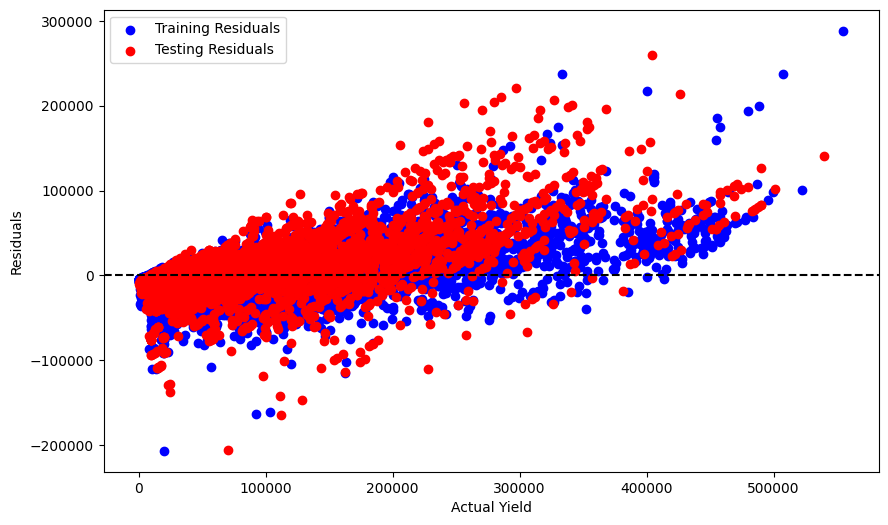

In [ ]:
train_residuals = y_train - train_preds
test_residuals = y_test - test_preds

plt.figure(figsize=(10, 6))
plt.scatter(y_train, train_residuals, color='blue', label='Training Residuals')
plt.scatter(y_test, test_residuals, color='red', label='Testing Residuals')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Actual Yield')
plt.ylabel('Residuals')
plt.legend()
plt.show()

### Random Forest: Log Tranformation on Yield
<a id="rf-log-transform"></a>

In order to test out the log transformation, we will use the log of the yield as the target variable and see if the model performs better.

In [ ]:
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

In [ ]:
rf = RandomForestRegressor(
    n_estimators=best_rf_params['n_estimators'],
    max_depth=best_rf_params['max_depth'],
    min_samples_split=best_rf_params['min_samples_split'],
    min_samples_leaf=best_rf_params['min_samples_leaf'],
    max_features=best_rf_params['max_features'],
    random_state=42
)

rf.fit(X_train, y_train_log)

RandomForestRegressor(max_depth=30, max_features='log2', min_samples_leaf=5,
                      min_samples_split=5, n_estimators=200, random_state=42)

<b> Analysis of Performance in Random Forest with Log Tranformation </b>
- Improvement from Original Random Forest:
    - There is a higher testing R² (~87%), so there is a slight improvement in variance explained on the test set.
    - There is reduced overfitting because the gap between train and test R² is smaller than before
- Tradeoff: Higher RMSE on both training and test sets because the model is penalized more for larger errors.
    - Reason for Increase: Extreme values (like large outliers) are compressed by the log, leading to larger errors when back-transformed (i.e. when we take the exponential of the log).

In [ ]:
train_preds_log = rf.predict(X_train)

train_preds_orig = np.expm1(train_preds_log)
y_train_orig = np.expm1(y_train_log)

train_rmse_orig = np.sqrt(MSE(y_train_orig, train_preds_orig))
train_r2_score_orig = rf.score(X_train, y_train_log)
print(f"Training R^2: {train_r2_score_orig:.4f}")
print(f"Training RMSE: {train_rmse_orig:.4f}")

Training R^2: 0.9429
Training RMSE: 21480.2396


In [ ]:
test_preds_log = rf.predict(X_test)

test_preds_orig = np.expm1(test_preds_log)
y_test_orig = np.expm1(y_test_log)

test_rmse_orig = np.sqrt(MSE(y_test_orig, test_preds_orig))
test_r2_score_orig = rf.score(X_test, y_test_log)
print(f"Testing R^2: {test_r2_score_orig:.4f}")
print(f"Testing RMSE: {test_rmse_orig:.4f}")

Testing R^2: 0.8788
Testing RMSE: 36667.8070


<b> Analysis of Residual Plot with Log Tranformation </b>
- Much tighter clustering of residuals, with values now mostly between -2 and +2.
- Actual yield is now on a smaller scale (roughly 4 to 12), suggesting that log transformation helped stabilize the variance of the residuals.
- There is still a mild case of heteroscedasticity because the model's errors grow larger for higher yield values.
- More residuals tend to be above zero as actual yield increases, so the model tends to underpredict higher yields.
- Log Transformation helped (even increased performance), but didn't fully the solve the problem of heteroscedasticity.
    - Even after log transformation, some data points can still behave like outliers because the log only reduces the scale of extremes, it doesn't remove or cap them.
- How to Improve:
    - Gradient Boosting algorithms can help because it is relatively robust to outliers because of its iterative correction method
    - Utilize the outlier-handled dataframe (i.e. called final_df) and see if the model performs better with that data.

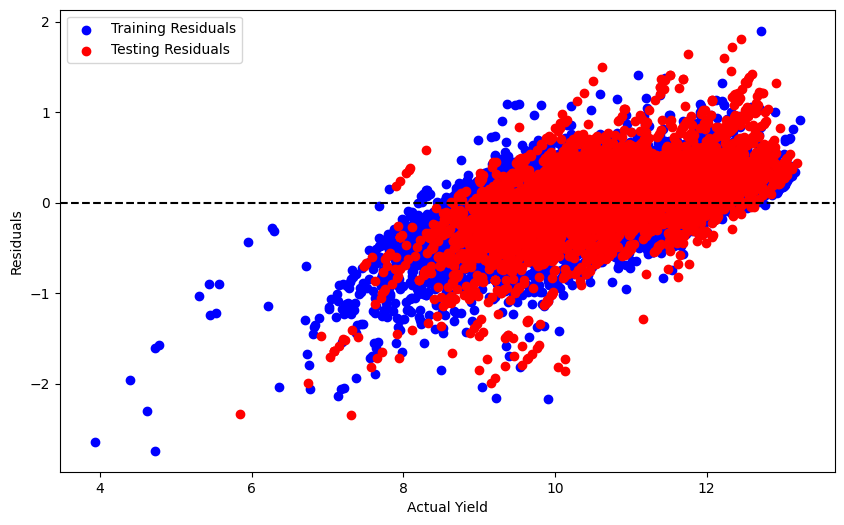

In [ ]:
train_residuals_log = y_train_log - train_preds_log
test_residuals_log = y_test_log - test_preds_log

plt.figure(figsize=(10, 6))
plt.scatter(y_train_log, train_residuals_log, color='blue', label='Training Residuals')
plt.scatter(y_test_log, test_residuals_log, color='red', label='Testing Residuals')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Actual Yield')
plt.ylabel('Residuals')
plt.legend()
plt.show()

***

### XGBoost
<a id="xgboost"></a>

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score

In [ ]:
xgb_train_valid_set = original_df[original_df['Year'] <= 2010]
xgb_test_set = original_df[original_df['Year'] > 2010]

In [ ]:
X_train_xgb = xgb_train_valid_set.drop(columns=['Value_Yield'])
X_test_xgb = xgb_test_set.drop(columns=['Value_Yield'])

y_train_log_xgb = np.log1p(xgb_train_valid_set['Value_Yield'])
y_test_log_xgb = np.log1p(xgb_test_set['Value_Yield'])


In [ ]:
ts = TimeSeriesSplit(n_splits=5)

In [ ]:
xgb_model = XGBRegressor(objective='reg:squarederror', n_estimators=100)

In [ ]:
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'reg_alpha': [0, 0.1, 1, 10],
    'reg_lambda': [0.1, 1, 10],
    'subsample': [0.7, 0.8, 1],
    'colsample_bytree': [0.7, 0.9, 1]

}

In [ ]:
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    cv=ts,
    scoring='r2',
    n_jobs=-1
)

grid_search.fit(X_train_xgb, y_train_log_xgb)

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, imp...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.7, 0.9, 1],
                         'learning_rate': [0.01, 0.05, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'reg_alpha': [0, 0.1, 1, 10],
                         'reg_lambda': [0.1, 1, 10],
                         'subsample': [0.7, 0.8, 1]},
             scoring='r2')

In [ ]:
best_xgb_model = grid_search.best_estimator_
best_xgb_param = grid_search.best_params_
best_xgb_param

{'colsample_bytree': 0.9,
 'learning_rate': 0.05,
 'max_depth': 7,
 'reg_alpha': 10,
 'reg_lambda': 10,
 'subsample': 0.7}

TimeSeriesSplit, which we performed earlier, ensures that the training data only contains past observations, avoiding any data leakage. However, boosting models like XGBoost optimize based on previous errors and may require additional fine-tuning beyond a simple TS-based split.

We are trying to select the best configuration for XGBoost so we perform cross-validation (CV) for XGBoost separately through the method in code below.

In [ ]:
import xgboost as xgb
from xgboost import DMatrix, cv

dtrain = DMatrix(X_train_xgb, label= y_train_log_xgb)

cv_result = cv(
    best_xgb_param,
    dtrain,
    num_boost_round=500,
    nfold=5,
    metrics="rmse",
    early_stopping_rounds=10,
    seed=42
)

best_n_estimators = cv_result.shape[0]
print(f"Best n_estimators: {best_n_estimators}")

best_xgb_model = xgb.XGBRegressor(**best_xgb_param, n_estimators=best_n_estimators)
best_xgb_model.fit(X_train_xgb, y_train_log_xgb)

Best n_estimators: 500


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

<b> Analysis of Performance in XGBoost </b>
- Random Forest (without log transformation) had a higher R² (0.9412) compared to XGBoost (0.8706), indicating that RF explained more variance in the training data.
- Random Forest (without log transformation) had a lower RMSE (17,791.66) than XGBoost (24,040.71), meaning its training predictions were more accurate.
- Why XGBoost Performed Worse:
    - XGBoost is more sensitive to outliers than Random Forest, so the presence of outliers in the dataset may have affected its performance.
    - It may have also been that hyperparameters were not tuned optimally for XGBoost, so Random Forest performed better.

In [ ]:
xgb_train_preds = best_xgb_model.predict(X_train_xgb)
xgb_train_r2 = best_xgb_model.score(X_train_xgb, y_train_log_xgb)
xgb_train_rmse = np.sqrt(MSE(np.expm1(y_train_log_xgb), np.expm1(xgb_train_preds)))

print(f"Training R-squared: {xgb_train_r2:.4f}")
print(f"Training RMSE: {xgb_train_rmse:.4f}")

Training R-squared: 0.9160
Training RMSE: 24040.7126


In [ ]:
xgb_test_preds = best_xgb_model.predict(X_test_xgb)
xgb_test_rmse = np.sqrt(MSE(np.expm1(y_test_log_xgb), np.expm1(xgb_test_preds)))
xgb_test_r2 = best_xgb_model.score(X_test_xgb, y_test_log_xgb)

print("XGBoost Performance:")
print(f"Training R-squared: {xgb_test_r2:.4f}")
print(f"Training RMSE: {xgb_test_rmse:.4f}")

XGBoost Performance:
Training R-squared: 0.8706
Training RMSE: 34683.0590


***

### Best Model Selection
<a id="best-model"></a>

Random Forest (without log transformation) achieved the best balance between training accuracy and generalization, making it the optimal model for crop yield prediction. Before we finalize the model, we will check whether performance is better with the outlier-handled dataframe (i.e. final_df) using the same Random Forest model.

In [ ]:
test_df = final_df.copy()
test_df.drop(columns=['score', 'Area'], inplace=True)
test_df.columns


Index(['Category_SIDS', 'Category_SIDS_LDC', 'Crop_Maize',
       'Crop_Plantains_Others', 'Crop_Potatoes', 'Crop_Rice_Paddy',
       'Crop_Sorghum', 'Crop_Soybeans', 'Crop_Sweet_Potatoes', 'Crop_Wheat',
       'Crop_Yams', 'Year', 'Latitude', 'Longitude', 'Value_Yield_Winsorized',
       'Rainfall_Winsorized', 'Pesticide_Winsorized', 'Temp_Winsorized'],
      dtype='object')

In [ ]:
training_validation_set = test_df[final_df['Year'] <= 2010]
testing_set = test_df[test_df['Year'] > 2010]

X_train = training_validation_set.drop(columns=['Value_Yield_Winsorized'])
y_train = training_validation_set['Value_Yield_Winsorized']

X_test = testing_set.drop(columns=['Value_Yield_Winsorized'])
y_test = testing_set['Value_Yield_Winsorized']

In [ ]:
ts = TimeSeriesSplit(n_splits=5)

winzorized_data_rf_model = RandomForestRegressor(
    n_estimators=best_rf_params['n_estimators'],
    max_depth=best_rf_params['max_depth'],
    min_samples_split=best_rf_params['min_samples_split'],
    min_samples_leaf=best_rf_params['min_samples_leaf'],
    max_features=best_rf_params['max_features'],
    random_state=42
)

winzorized_data_rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=30, max_features='log2', min_samples_leaf=5,
                      min_samples_split=5, n_estimators=200, random_state=42)

<b> Analysis of Performance in Random Forest with Outlier-Handled Data </b>
- Higher Testing R² (0.8867 vs. 0.8549): The model explains more variance in unseen data, showing better generalization.
- Lower Testing RMSE (18,724.30 vs. 31,589.29): The prediction errors have decreased significantly, meaning more accurate yield estimates.
- Conclusion: Removing extreme outliers prevented the model from being skewed by extreme values, allowing it to generalize better.
    - Random Forest remains the best model overall. Using winzorized data made it even better by improving accuracy and reducing prediction errors.

In [ ]:
winzorized_train_preds = winzorized_data_rf_model.predict(X_train)
winzorized_train_rmse = np.sqrt(MSE(y_train, winzorized_train_preds))
winzorized_train_r2_score = winzorized_data_rf_model.score(X_train, y_train)
print(f"Training R^2: {winzorized_train_r2_score:.4f}")
print(f"Training RMSE: {winzorized_train_rmse:.4f}")

Training R^2: 0.9537
Training RMSE: 11239.0975


In [ ]:
winzorized_test_preds = winzorized_data_rf_model.predict(X_test)
winzorized_test_rmse = np.sqrt(MSE(y_test, winzorized_test_preds))
winzorized_test_r2_score = winzorized_data_rf_model.score(X_test, y_test)
print(f"Testing R^2: {winzorized_test_r2_score:.4f}")
print(f"Testing RMSE: {winzorized_test_rmse:.4f}")

Testing R^2: 0.8867
Testing RMSE: 18724.2956


***

### Sub-Question #3: Does training separate models for different clusters (regional models) lead to better predictive performance than a single global model?
<a id="sub-question3"></a>

The idea behind this sub-question is that treating all regions uniformly in a global model may overgeneralize important patterns and reduce predictive accuracy. We hope to compare a global model, which we believe will have lower performance, to clusered variable models because different models (representing clusters) will specialize in the characteristics of those similar regions/climates, leading to potentially higher predictive accuracy.

#### K-Means Clustering
<a id="k-means"></a>

By using K-Means Clustering, we can group countries based on their crop yield, temperature, and rainfall. This will help us understand how countries with similar environmental conditions have similar crop yields.

We create a new feature called Cluster in our dataset which represents the cluster each observation belongs to and can provide valuable information to your subsequent analysis on this sub-question.

Once we have the observations and cluster labels in our dataset, we use supervised learning techniques (linear regression and random forest), to build a predictive model. This is valid because the cluster information which we hope captures some inherent structure in our data that is useful for making predictions on crop yield.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
features_cluster = test_df[['Latitude', 'Longitude', 'Temp_Winsorized', 'Rainfall_Winsorized', 'Pesticide_Winsorized']
+ [c for c in original_df.columns if "Crop_" in c]]
num_features = ['Temp_Winsorized', 'Rainfall_Winsorized', 'Value_Pesticide']
cat_features = [c for c in features_cluster.columns if c not in num_features]

columnTransformer = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), features_cluster.columns),
        ('cat', 'passthrough', cat_features)
    ])

features_cluster = columnTransformer.fit_transform(features_cluster)

In [ ]:
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(features_cluster)
    score = silhouette_score(features_cluster, kmeans.labels_)
    silhouette_scores.append(score)

<b> Analysis of Silhouette Score (Elbow Diagram): </b>
- From the silhouette score graph, the recommended k value is k = 3 because the score drops significantly for k ≥ 4, meaning clustering quality deteriorates.

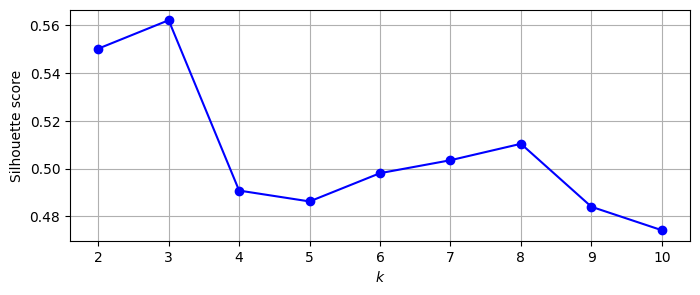

In [ ]:
plt.figure(figsize=(8, 3))
plt.plot(k_range, silhouette_scores, 'bo-')
plt.xlabel("$k$")
plt.ylabel("Silhouette score")
plt.grid()
plt.show()

In [ ]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
test_df['Cluster'] = kmeans.fit_predict(features_cluster)

In [ ]:
test_df['Cluster'].value_counts()

0    15248
2     6896
1     5976
Name: Cluster, dtype: int64

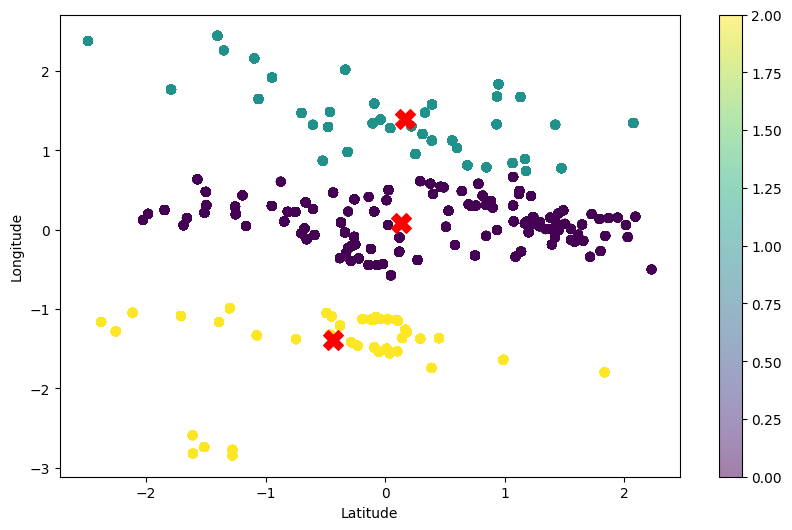

In [ ]:
labels = test_df['Cluster']

centroids = kmeans.cluster_centers_

plt.figure(figsize=(10, 6))
scatter = plt.scatter(features_cluster[:, 0], features_cluster[:, 1], c=labels, cmap='viridis', alpha=0.5)

plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')

plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.colorbar(scatter)
plt.show()

#### Supervised Learning Models
<a id="supervised-learning"></a>

Since we had assumed in this sub-question that clustering helps in increasing performance, we will use supervised learning models (linear regression and random forest) to build predictive models for each cluster and see if they perform better than a single global model. This is a technique we learned from the extended lecture slides in the Clustering module.

***

##### Linear Regression
<a id="linear-regression"></a>

This served as a baseline comparison. By including the clustered variable in a single model, we hoped to check whether regional differences (captured by clusters) had a significant effect on crop yield.

In [ ]:
X = test_df[['Cluster', 'Latitude', 'Longitude', 'Temp_Winsorized', 'Rainfall_Winsorized', 'Pesticide_Winsorized'] + [c for c in test_df.columns if "Crop_" in c]]
target = test_df['Value_Yield_Winsorized']

In [ ]:
train_years = (test_df['Year'] <= 2010)
test_years = (test_df['Year'] > 2010)

X_train = X.loc[train_years]
y_train = target.loc[train_years]

X_test = X.loc[test_years]
y_test = target.loc[test_years]

In [ ]:
num_features = ['Latitude', 'Longitude', 'Temp_Winsorized', 'Rainfall_Winsorized', 'Pesticide_Winsorized']
cat_features = ['Cluster'] + [c for c in X.columns if c not in num_features]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', 'passthrough', cat_features)
])

pipeline = Pipeline([
    ('Preprocessor', preprocessor),
    ('linearModel', LinearRegression())
])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('Preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Latitude', 'Longitude',
                                                   'Temp_Winsorized',
                                                   'Rainfall_Winsorized',
                                                   'Pesticide_Winsorized']),
                                                 ('cat', 'passthrough',
                                                  ['Cluster', 'Cluster',
                                                   'Crop_Maize',
                                                   'Crop_Plantains_Others',
                                                   'Crop_Potatoes',
                                                   'Crop_Rice_Paddy',
                                                   'Crop_Sorghum',
                                                   'Crop_Soybeans',
                                                   'Crop_Sweet_Potatoes',
                                                   'Crop_Wheat',
                                                   'Crop_Yams'])])),
                ('linearModel', LinearRegression())])

<b> Analysis of Linear Regression Results: </b>
- The test R² is higher than the train R², which is unusual but possible. This suggests the model is generalizing well but not overfitting.
- The R² is still logically nice because we only included certain features in the model, so it is not expected to be very high.

In [ ]:
trian_score = pipeline.score(X_train, y_train)
test_score = pipeline.score(X_test, y_test)
print(f"Train R^2: {train_score:.4f}")
print(f"Test R^2: {test_score:.4f}")

Train R^2: 0.4887
Test R^2: 0.5986


In [ ]:
train_preds = pipeline.predict(X_train)
train_rmse = np.sqrt(MSE(y_train, train_preds))
test_preds = pipeline.predict(X_test)
test_rmse = np.sqrt(MSE(y_test, test_preds))
print(f"Train RMSE: {train_rmse:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")

Train RMSE: 32802.7383
Test RMSE: 35244.7854


##### Random Forest Models
<a id="random-forest2"></a>

We tested a Random Forest as well because there are non-linearities that the linear regression may have not captured. In addition, Random Forest was the best performing model in the previous sections.

##### Global Model
<a id="global-model"></a>

The global model treats all data uniformly here, which, we predict, may overgeneralize patterns and fail to capture region-specific influences.

In [ ]:
X = test_df[['Cluster', 'Latitude', 'Longitude', 'Temp_Winsorized', 'Rainfall_Winsorized', 'Pesticide_Winsorized'] + [c for c in test_df.columns if 'Crop_' in c]]
y = test_df['Value_Yield_Winsorized']

In [ ]:
training_validation_set = test_df[test_df['Year'] <= 2010]
testing_set = test_df[test_df['Year'] > 2010]

X_train = training_validation_set[X.columns]
y_train = training_validation_set['Value_Yield_Winsorized']
X_test = testing_set[X.columns]
y_test = testing_set['Value_Yield_Winsorized']

y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

In [ ]:
ts = TimeSeriesSplit(n_splits=5)

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5],
    'max_features': ['sqrt', 'log2']
}

rf_cluster = RandomForestRegressor(random_state=42)

random_search_rf_cluster = GridSearchCV(
    estimator=rf_cluster,
    param_grid=param_grid,
    cv=ts,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=2
)

random_search_rf_cluster.fit(X_train, y_train_log)

Fitting 5 folds for each of 180 candidates, totalling 900 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50; to

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100]},
             scoring='neg_mean_squared_error', verbose=2)

In [ ]:
best_rf_cluster = random_search_rf_cluster.best_estimator_
best_rf_params_cluster = random_search_rf_cluster.best_params_
best_rf_params_cluster

{'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 100}

In [ ]:
train_preds_log = best_rf_cluster.predict(X_train)
train_preds_orig = np.expm1(train_preds_log)
y_train_orig = np.expm1(y_train_log)

train_rmse_orig = np.sqrt(MSE(y_train_orig, train_preds_orig))
train_r2_score_orig = best_rf_cluster.score(X_train, y_train_log)
print(f"Training R^2: {train_r2_score_orig:.4f}")
print(f"Training RMSE: {train_rmse_orig:.4f}")

Training R^2: 0.9453
Training RMSE: 13390.3424


In [ ]:
test_preds_log = best_rf_cluster.predict(X_test)
test_preds_orig = np.expm1(test_preds_log)
y_test_orig = np.expm1(y_test_log)

test_rmse_orig = np.sqrt(MSE(y_test_orig, test_preds_orig))
test_r2_score_orig = best_rf_cluster.score(X_test, y_test_log)
print(f"Testing R^2: {test_r2_score_orig:.4f}")
print(f"Testing RMSE: {test_rmse_orig:.4f}")

Testing R^2: 0.8726
Testing RMSE: 22097.1461


##### Local Cluster Models
<a id="local-cluster-model"></a>

After testing a global Random Forest model, we trained separate models for each cluster to see if specialized models could improve accuracy. This would confirm or reject our hypothesis that regional models outperform a global model.

In [ ]:
clusters = test_df['Cluster'].unique()

results_for_cluster = {}

for cluster in clusters:
    print(f"\nTraining model for Cluster {cluster}...")

    cluster_data = test_df[test_df['Cluster'] == cluster]

    X = cluster_data[['Latitude', 'Longitude', 'Temp_Winsorized', 'Rainfall_Winsorized', 'Pesticide_Winsorized'] + [c for c in cluster_data.columns if 'Crop_' in c]]
    y = cluster_data['Value_Yield_Winsorized']

    y_log = np.log1p(y)

    train_mask = cluster_data['Year'] <= 2010
    test_mask = cluster_data['Year'] > 2010

    X_train, X_test = X[train_mask], X[test_mask]
    y_train, y_test = y_log[train_mask], y_log[test_mask]

    rf_model = RandomForestRegressor(
        n_estimators=100,
        max_depth=20,
        min_samples_split=5,
        min_samples_leaf=2,
        random_state=42)

    rf_model.fit(X_train, y_train)

    train_preds_log = rf_model.predict(X_train)
    train_preds_orig = np.expm1(train_preds_log)
    y_train_orig = np.expm1(y_train)

    train_rmse = np.sqrt(MSE(y_train_orig, train_preds_orig))
    train_r2 = rf_model.score(X_train, y_train)

    test_preds_log = rf_model.predict(X_test)
    test_preds_orig = np.expm1(test_preds_log)
    y_test_orig = np.expm1(y_test)

    test_rmse = np.sqrt(MSE(y_test_orig, test_preds_orig))
    test_r2 = rf_model.score(X_test, y_test)

    results_for_cluster[cluster] = {
        'Model': rf_model,
        'Train RMSE': train_rmse,
        'Train R^2': train_r2,
        'Test RMSE': test_rmse,
        'Test R^2': test_r2
    }

results_df = pd.DataFrame(results_for_cluster).T
results_df


Training model for Cluster 1...

Training model for Cluster 0...

Training model for Cluster 2...


,Model,Train RMSE,Train R^2,Test RMSE,Test R^2
1,"(DecisionTreeRegressor(max_depth=20, max_featu...",12147.448819,0.945455,22089.415587,0.83114
0,"(DecisionTreeRegressor(max_depth=20, max_featu...",12259.912003,0.951193,21136.034851,0.881829
2,"(DecisionTreeRegressor(max_depth=20, max_featu...",12974.814513,0.943504,20971.111047,0.88069


<b> Analysis on Local Cluster Models: </b>
- The global model had a lower Test R² (~0.85) and a higher Test RMSE (~31,589.29), whereas the cluster-based models achieved higher R² values (~0.88 - 0.89) and lower RMSE (~20,971 - 22,089).
- Why did this happen?
    -  The global model treated all regions as if they followed the same patterns, but the local cluster models each model focused on learning patterns specific to a region, reducing noise.
- Some clusters performed better than other cluster.
    - Cluster 2 had the highest R² and lowest RMSE, indicating that it had the most distinct patterns that the model could learn from.
    - The difference may exist due to well-defined patterns in some clusters and noise in others.

We also tested the feature importance once again to see if there were any major differences in the importance of features between the global models, seen earlier, and this one.

<b> Analysis of Feature Importance: </b>
- Across all three clusters, Crop_Potatoes has the highest importance score so this continues to be influential.
- Features such as Latitude and Longitude consistently rank high, so this continues to be influential.
- While the general ranking remains similar, there are slight differences in feature importance scores between clusters, which reinforces the idea that training models separately for different regions allows for more specialized predictions.

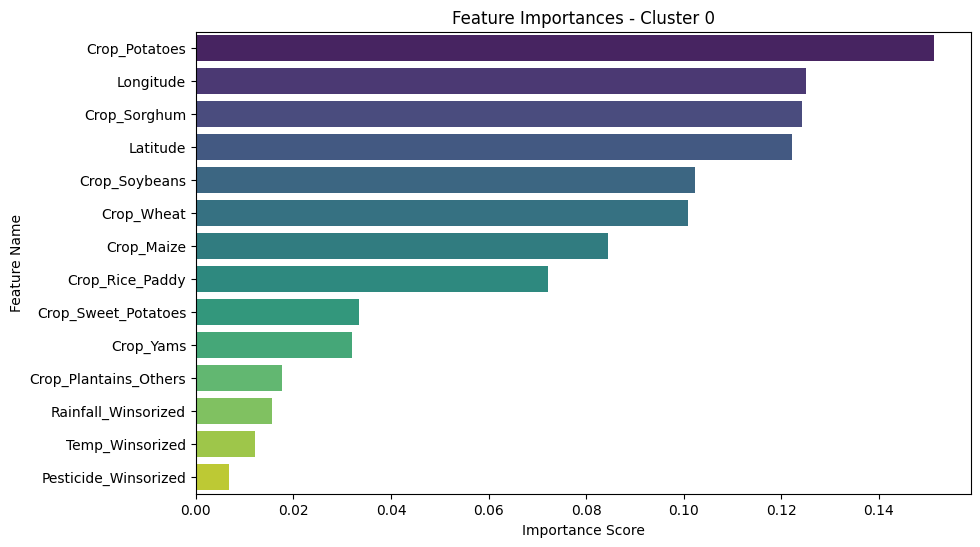

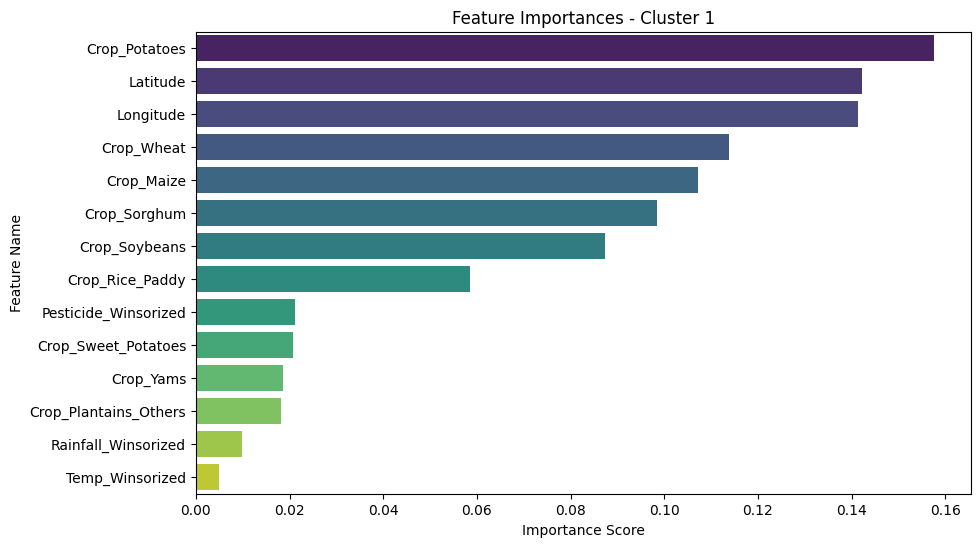

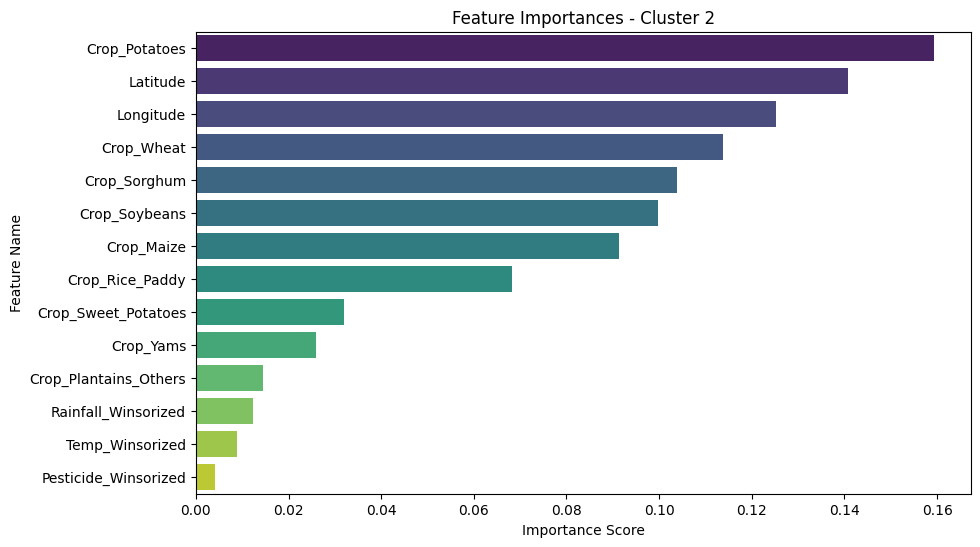

In [ ]:
clusters = [0, 1, 2]

for c in clusters:
    model = rf_model[c]
    feature_importances = pd.Series(model.feature_importances_, index=X_train.columns)

    feature_importances = feature_importances.sort_values(ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x=feature_importances.values, y=feature_importances.index, palette="viridis", hue=feature_importances.index)
    plt.title(f"Feature Importances - Cluster {c}")
    plt.xlabel("Importance Score")
    plt.ylabel("Feature Name")
    plt.show()

****

# Recommendation System
<a id="recommendation-system"></a>

After clustering and observing the results from sub-question #3, the next logical step for us was to dervie actionable insights from the data. Since different climate clusters have different yield patterns and feature importance, a generalized recommendation wouldn’t work.

The idea is to find similar crops based on the factors mentioned above and recommend them to regions where they have not been cultivated before but may be suitable. We predict the yield and recommend crops based on expected performance.

We will use a Content-Based Filtering technique because we are trying to give the recommendation according to environmental fit and not necessarily the farmer behavior over time. We will combine this with supervised learning because this will be used as the extra layer of yield prediction.

We used the following sources for this part of the project:

1. ["A Complete Guide To Recommender System Tutorial"](https://towardsdatascience.com/a-complete-guide-to-recommender-system-tutorial-with-sklearn-surprise-keras-recommender-5e52e8ceace1/)

2. ["Recommender Systems – A Complete Guide to Machine Learning Models"](https://towardsdatascience.com/recommender-systems-a-complete-guide-to-machine-learning-models-96d3f94ea748/)

***

### Content-Based Filtering
<a id="content-based"></a>

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.exceptions import NotFittedError

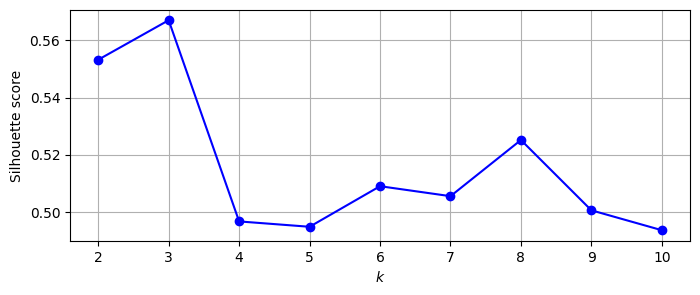

In [ ]:
geo_features = ['Latitude', 'Longitude']
env_features = ['Temp_Winsorized', 'Rainfall_Winsorized', 'Pesticide_Winsorized']
crop_type_features = [c for c in test_df.columns if "Crop_" in c]

features_cluster = test_df[geo_features + env_features]

columnTransformer = ColumnTransformer(
    transformers=[
        ('env', StandardScaler(), env_features),
        ('geo', 'passthrough', geo_features)
    ])

features_cluster = columnTransformer.fit_transform(features_cluster)

silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans2 = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans2.fit(features_cluster)
    score = silhouette_score(features_cluster, kmeans2.labels_)
    silhouette_scores.append(score)

plt.figure(figsize=(8, 3))
plt.plot(k_range, silhouette_scores, 'bo-')
plt.xlabel("$k$")
plt.ylabel("Silhouette score")
plt.grid()
plt.show()

We ran a PCA, below, because when we have a lot of features, it is hard to visualize them. PCA helps us reduce the dimensionality of the data while preserving as much variance as possible, so we used it as a data visaul tool.

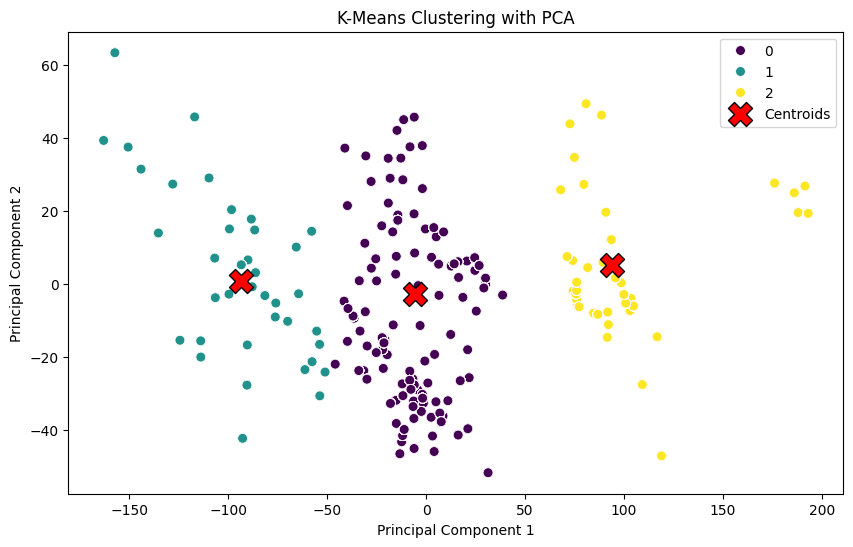

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(features_cluster)

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
test_df['Cluster'] = kmeans.fit_predict(X_pca)

centroids = kmeans.cluster_centers_
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=test_df['Cluster'], palette="viridis", s=50, edgecolor="white")

plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=300, color='red', edgecolor='black', label="Centroids")

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("K-Means Clustering with PCA")
plt.legend()
plt.show()

We wanted to understand what the best crops were for each cluster was because this may help in interpretation of results in the recommender system, so we used the groupby() method.  

In [ ]:
best_crops_per_region = test_df.loc[test_df.groupby("Cluster")["Value_Yield_Winsorized"].idxmax(), ["Cluster", "Latitude", "Longitude", "Value_Yield_Winsorized"] + crop_type_features]
best_crops_per_region

,Cluster,Latitude,Longitude,Value_Yield_Winsorized,Crop_Maize,Crop_Plantains_Others,Crop_Potatoes,Crop_Rice_Paddy,Crop_Sorghum,Crop_Soybeans,Crop_Sweet_Potatoes,Crop_Wheat,Crop_Yams
151,0,41.153332,20.168331,168033,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
27,1,33.939110,67.709953,168033,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
715,2,-38.416097,-63.616672,168033,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
geographical_features = ['Latitude', 'Longitude']
environmental_features = ['Temp_Winsorized', 'Rainfall_Winsorized', 'Pesticide_Winsorized']

recommendations_features = geographical_features + environmental_features

scaler = StandardScaler()
test_df[environmental_features] = scaler.fit_transform(test_df[environmental_features])

similarity_matrix = cosine_similarity(test_df[recommendations_features])
similarity_df = pd.DataFrame(similarity_matrix, columns=test_df.index, index=test_df.index)
similarity_df.head()

,0,1,2,3,4,5,6,7,8,9,...,28110,28111,28112,28113,28114,28115,28116,28117,28118,28119
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.504091,0.504091,0.504091,0.504091,0.504091,0.504091,0.504091,0.504091,0.504091,0.504091
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.504091,0.504091,0.504091,0.504091,0.504091,0.504091,0.504091,0.504091,0.504091,0.504091
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.504091,0.504091,0.504091,0.504091,0.504091,0.504091,0.504091,0.504091,0.504091,0.504091
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.504091,0.504091,0.504091,0.504091,0.504091,0.504091,0.504091,0.504091,0.504091,0.504091
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.504091,0.504091,0.504091,0.504091,0.504091,0.504091,0.504091,0.504091,0.504091,0.504091


In [ ]:
def crop_recommeder(test_features, top_k=5):
    feature_names = ['Latitude', 'Longitude', 'Temp_Winsorized', 'Rainfall_Winsorized', 'Pesticide_Winsorized']
    environmental_features = ['Temp_Winsorized', 'Rainfall_Winsorized', 'Pesticide_Winsorized']

    test_features_df = pd.DataFrame([test_features], columns=feature_names)

    lat_lon = test_features_df[['Latitude', 'Longitude']].values
    env_features = test_features_df[environmental_features]

    try:
        env_features_scaled = scaler.transform(env_features)
    except NotFittedError:
        print("Scaler not fitted. Will fit now...")
        train_df = original_df.copy()
        scaler2 = StandardScaler()
        scaler2.fit(train_df[environmental_features])
        env_features_scaled = scaler2.transform(env_features)

    test_features_scaled = np.hstack([lat_lon, env_features_scaled])

    test_features_pca = pca.transform(test_features_scaled.reshape(1, -1))

    test_cluster = kmeans.predict(test_features_pca)[0]

    rf_model = results_for_cluster[test_cluster]['Model']
    cluster_df = test_df[test_df['Cluster'] == test_cluster]
    best_crop = cluster_df[crop_type_features].sum().idxmax().replace("Crop_", "")

    test_data = np.append(test_features_scaled, np.zeros(len(crop_type_features)))
    crop_idx = crop_type_features.index(f"Crop_{best_crop}")
    test_data[len(test_features_scaled) + crop_idx] = 1

    all_features = feature_names + crop_type_features

    test_data_df = pd.DataFrame([test_data], columns=all_features)

    predicted_yield_log = rf_model.predict(test_data_df)[0]
    predicted_yield = np.expm1(predicted_yield_log)

    recommendations_features = [c for c in test_df.columns if "Crop_" in c]
    similarity_matrix_cluster = cosine_similarity(cluster_df[recommendations_features])
    similarity_cluster_df = pd.DataFrame(similarity_matrix_cluster, index=cluster_df.index, columns=cluster_df.index)

    top_similar_regions = similarity_cluster_df.iloc[-1].nlargest(top_k + 1).index[1:]

    sim_crops = cluster_df.loc[top_similar_regions, crop_type_features].sum(axis=0)
    recommended_crops = sim_crops[sim_crops > 0].index.tolist()
    recommended_crops = [crop.replace("Crop_", "") for crop in recommended_crops]

    crop_yield_predictions = {}
    for crop in recommended_crops:
        crop_data = np.append(test_features_scaled, np.zeros(len(crop_type_features)))
        crop_idx = crop_type_features.index(f"Crop_{crop}")
        crop_data[len(test_features_scaled) + crop_idx] = 1

        crop_data_df = pd.DataFrame([crop_data], columns=all_features)

        predicted_yield_log = rf_model.predict(crop_data_df)[0]
        crop_yield_predictions[crop] = np.expm1(predicted_yield_log)

    return best_crop, predicted_yield, crop_yield_predictions

In [ ]:
test_sample = [37.7749, -122.4194, 26, 1200, 50]
recommended_crop, estimated_yield, additional_crops_yield = crop_recommeder(test_sample)

print(f"Recommended Crop: {recommended_crop}")
print(f"Estimated Yield: {estimated_yield:.2f} hg/ha")
additional_crops_yield = {crop: f"{yield_value:.2f} hg/ha" for crop, yield_value in additional_crops_yield.items()}
print(f"Additional Crop Suggestions and Estimated Yields: {additional_crops_yield}")

Recommended Crop: Potatoes
Estimated Yield: 118687.13 hg/ha
Additional Crop Suggestions and Estimated Yields: {'Wheat': '48917.87 hg/ha'}


As we can see Potatoes was the best crop in terms of value yield from our previous insights, and this is what shows up here, so this seems to be an accurate prediction by teh recommender.

***

# Final Thoughts
<a id="final-thoughts"></a>

Although our work is not complete in this project, we gained a lot of new skills, including research skills, data cleaning, data visualization, and model building. We also learned how to use different models and techniques to answer different questions.

We hope to continue to explore this dataset a little more a gather further relevant information (e.g. farmer insights, etc.) that can increase our model's abilities.